# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

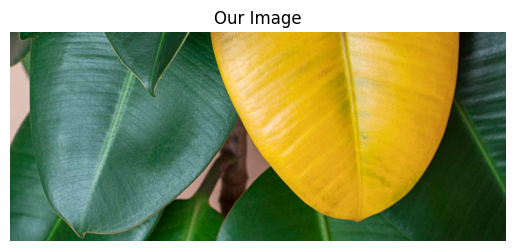

In [69]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

(np.float64(-0.5), np.float64(274.5), np.float64(361.5), np.float64(-0.5))

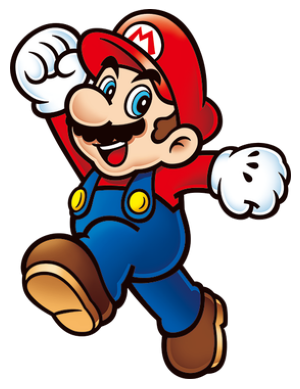

In [70]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0KGgoAAAANSUhEUgAAARMAAAFqCAYAAAA5hL6xAAEAAElEQVR4nOyddZwk1fX2v/feqmqZHpd1XxZb3CW4uzvBLYEkaBIkuAcPQZIgQRIgOASX4AR3Z13Hp72q7r3vH1XdM7sssGh+yTvn8+lpme7q6pKnznnOc84RDNr/uglAAhYwA//RAsOEwwRr5HAh7HIIlgBasDSAaBSCRgspQGApAD0C220F3UA7lo9AvieEnumFfDQTuhb6bif+TsOg/c+b+E+vwKD9YCbj++qJ3AzDlWJpg9hYCrGytSyFoFVAeuEDwX7Fgge+N35fFst8K+w7IF6ywjxmAz7phOyAtzqA/ppFD9p/sQ2Cyf+eSaL9qgEaod6Rcich7dYg1hYw7AufEMICRghEfEhUjov4Pjr/rY0eWGsrgGAr37cwwFjL22CfUkLdPDcMX6cf1FT8eBBU/sdsEEz+t8wBQoBWlxUwYl+E+KmEVqievUYIrBASKYWwxgqttQi1JYzfY1nwTK+gkwIcCVJKlJLR+4zFROAy8GOygkoWAmvta9aKv7jG3DMHOgas66Cn8j9kg2Dyv2GKfk9ktOOokwV2dwl1sTtghRBaSqmsMSIINb6FItEZnfE86tIpGuoyuK4iXVtLIpEADFobcr29+H5ArlCit+BTKBYpGI0DJABXSRwJQkqMscSOS4UrcSoHmbVMsdibrbZXdcCchdd90P67bRBM/vutejK2OPKXCn4rYEgMIqGUQgkhRbkckAc8oLk+w9LLLsMaKyzDUsssQduQNoa1NTOstZmUq/DcOBIxGrTGLxUplct0dHQxe247nV3dzJg+i7c/m83bn85g2pRpZMs+IVADJDwHG8dEtt9rMSLCLqxllhVcQWiubIcci+B3Bu2/zwbB5L/XKlka3eayHFZcKhAbxTGDllJKrBWFQFMCRrc0sdH6a7HRRj9hg7VWoqmxAbe2BqyBcgnKZbRfxmiNDQOs0VitQYdIa8EGOETxS/TNAl0skc/nmd3ey1Nvf8ZLb3zAC+99zox57ThAjRIopdCmihEGsAKUAIy1HwsrTp1nzN/j/1fDtEH777NBMPnvtEqq17ZIeaCUXCKikEZLIaSUQuTKIRpYcekl2Gv3bdl6s/UZu8Q4CAMolghLRXRQxoQhWI3QGqyJ7mOPxJowuq88NhpjTPTcWpQA5Tg4UuIkHEDw6ax2nn7zM25/4hVe/WAqxaBMnSNQUqJNlR6peCoKwBr+IY05bi5MG/jbfvzNOmjfxQbB5L/PJNEV3m1zxUXCiqMq3oiSUpXDkLyBVZadxFEH7cmOW21Ioi4D+RzFbBahQwQmApUqWISgw+jemBhIBoKKjl63BmtM9BiIzneBtRZDlNJJJ5I4nqIcGp59bxp/feINHnjpPcrlIvWuxCIw1WRQv6diYY4xHN1hzG0L/c5B+y+xQTD57zIJmHpo8Bxxk0RsY6OwQCopZa8f0tjYwPGH7smhP92RVCZN2N1NUCpGIGLCKIQJfQg1VgdYHWK1AR15KOjISxkIIBgTPbfErw3MDItqYtgisAKQEiEktekEFnjmw1mcf/fzPP3OFFJokp4a6KUA6KqXIuwfUoE9fhqUGCRn/6tsEEz+e0wBeii0GiXukUKsrUErIZQFugLNluusyvknHsFSS40j6OrCL+SRJkSEASYI0KGPCAOEiQBD6gCpA5Q1WG0IwwCjNTo0GGMwRiOsRVgDJo48ql6JoBqJiJhIEQKkQEgJQqKFQCqHTNLF14abX/qYc+9/jbnt7TS4MnJL+jHFxEuVFvuoCO2+82A+g4DyX2P/DWAivuQxLBhX/y/H2ArQzaSGS1V+SAqWNxAqKZww1BSN4PjDduekI/bA0SH5nm6UDrGhj/F9dODj6oCUIyAMKBXLlIOA7nyZzr4CvfkSEkNjQtHoCuqlxdUBCUdRDjRFbRFSICpAMlDXZgcASnwTSoFSsYciMFIipaK+xuOj+Xl+c+dLPPDWJzSqiEsZEPZYIi/FsZYPkWq3+UHwDoPE7H+F/V8EE0l/qvCbiJoquir436oHkYAZBi1ayYeFYBUD2pFSlUKNk0xy8W8OYZ/t16fY0YUpFZDaR5fLmMAnhcWVho7eAm9+Nps3pnfw8vQups2aS3dvlkALfK1BgKcknjC0tTSz1LBm1ml2WKm1hmUyLsYa8sKJVsjafsdEsBCQCJAKhIzAxIlAxQqBUQ7phIs1mitenMIFj76Nzmep8RThIsIeA/PB7Nge8gKDHsr/efu/ACYVgeUXCtFiU42QcSBlQHrJSKvglwhlRCEWu6MakEV9trLs/1b5tgRsM2SUEv+UQqyrIXSkcIqBJlWT4S+nHc6W665ArqMDGfhYv0RYLpEIfRJo3pvVxa2vfMa/3pvOh3N7yOezUYqX/tyyJEr5WiFASgyCQBvK1jKitZk1WtP8dGIz69U74DjkHYWKPx/ligEVhTYV/kTIGFRUDCpSguNglUI6kjpX8fhnHRx57+vMbO+m0RWEC+4hHROzfcKK7edp/TSDgPJ/2v5TYFJVK7Cg++oNcd1JBr2awC5trRwFthUYBTQL8Cy48QICCz7QCcwAMV9YM8NK8a4V5qUOn09ZEED+22pCBCBXATnDkX+XsJOOQ5tyoEnU1nLDb/Zj8zWWJtvdhwzLmHIZG5SpMz6fz+vhymc+5PZ/f0xXb5YAiwKSRBsiWZOmpq4OIQVBEJDviVSuIdEOSQCZpEs50OSMwHFdtpjQxq/G1rFKrUM26WERiIqXUvVOIiVsBC4VHkWCo/rDHyUxSlHvCKZ05DjyqSk88+E0mpTBIAbuoAqgdFvktu1h+DyDgPJ/1v4TYLLAwdAMwx0p1zXCbooQmwItEmoG0HvAlyPAwoRKTBNmgTlYe69BPlWj9VNxdqDy/f8NoKIA3arEpVKIX1oIpRBOaAzWTfHnY3dnhzWXorc3h2M02i+hgjJeqcBNr07lvEffYXp7B4oIsZdddmlWW2ttVlx1VVZcaWWGDB9GOpkCEaVqs729zJk9i7fefJP3336L1/79Cu+8/Q4WqFWgHJf2ckBjUzNHT2jg0AYHW+MRuAppbBU8Io8k3isyBhM1MORRCBWBTSgkNRIKRZ8TXp3LLa9+SrPSUVaofzvoeFt0WWE2ag94i0FA+T9pPxaYVNWa8XPZCmvhiANBbKJg9MBkI0IYEd0qZazCWisWXqKIa8kGGEQH2oJVrJa3ENzphub6WTAzfvn7OiDFgNuibOBPW1wAU4BukXI3JbnNxieUwJIXCS47bFsOXG8perMllNWEvo9rAsJslpMf+5Abnn0fE5TwgLXXX4+DjzySDTbZhMaGxsX+Udlcjn+/8Dx//ct1PHL//fQWi7QmXcqhpt0odp84lPMbE9Q1SIpJD8fafnlsBUQq5X5S9vMpMTGLoxAyImcdwDGG09+cx2X/nkKz1CAXyPRUPJSpTmjWmw0zGASU/3P2Y4DJQEWjGOLKXbEcYmGTagEYhAghIvWmRGstyoEmIBZR0M/I0v+ZSChFFPd4AtyEB9ZijLEDakKoahigG2v/YrS9OC40+zZqy4XB45sc0A5fBJeFv1sCZghMto78l4BGCyghRGdgOGmPTfjdtqvQ01dAmRAdhrihT743y4F3vcnj709HmYAJ48Zy6nnns/Nuu1UXHIZhFHloi/RcivffjWxpxFtz/UhLIiIBmrUWx3Gqn3vl3y9z4Vlnc//991OrBEklmRsK1p0wiqtSMKRJUEp5yNBGW1rKCM1jEKmCSyzDR8UcipSgBEZJpJTUGMOFH3VxzqszaNAlEF8MeYzlRa3NFl1RTc+gUvb/kP2QYFI54QxAq1I7gf2tFKwKYCuSaiGEUkoGvk/JQJmotdeYsWNoaW1l+KhRTFhqKRobG/ESCaSQBEFAoVhg5rRpfP7RR3R3dDBz5kzm9vahiOL9pKsQETBBf1ij4lBoLoJT5gfmz/G6Ls5VrpItWiBFWQ8NSWi0LrXCOsn4dLIStBFh2UryokxuflR6v6jvqGClHvi8TYmnhRBrW9COFKrT12y96jLcctgmBL7G+D42DFA6JMhm2e+ed3j0val4GLbafnuuuPpq2oYOjdSpxiClrPYEQAoKf/8zPXv/jPorz6Lm8BNA68hriK3yOSEEUkZQfs0VV/C7k07Cz2Wp8xzmhrDWmBHcANQOkwSeQlQ6nABCyOixiu8R1XRxtDVjbkUKrCOxSlFvNZd+1sfpr8+iPiwuDCihAMdgb20P7T70q2QHAeX/gP1QYFI9OZsVG0vE76QQ60E/iCilFNbi+yFZoCGZYLkVVmDzbbdjzXXWYcKSk2hrbVvgCvll1tvby6xZM3nn9Td45umnePqRR5gxcxYhUO85CCEqoFLVMQBYa28ravvzbETifpl8e4EQrRUy1mFlYcXGQrCStWIigiagVkT8ZjWtbSNszAM5rG1H8DGWz4QUH9vAvCxh7rzo/xVzgLDVkSdION9GtTaqGBrGjR3NPYdvRGtCUi4HiDCAMMAtFjn8ySnc8eqneMZn/0MP4ZKrrkZJSRiG/dvPmCohmr34FLInXAraJ3PukdT95qIvgEnVrMWEIUJF4PziC8+z3267MW/WbOo9xTwj2GbUMP5oNAxxsUL0gwVx6FNpnyRlNQgVQkTQ7qj4PRKciJhtNJrfT89z+mszabblyGPqX6NQgmPgd/NDcyaDGpT/M/Z9g0k1chkKY4wSZyDET2NvQANRHAPk/KgQbVhzEzvtuRe77L03a6y55hcWaIzG2liAGVuF44tSk188AXr7ennk/ge4+cYbeeqxxyIS0YsiDBMtyAJGgtLWvmO03bUTPuKLHkoVYFphqHDkYdayuxAsXd1w8Y/7qg0Z80ALkAAWfGvtxwJeFVI8R2CemAdTmz2WUka+AtQIgTXayLKT4o7DNmHjsQ305MpIHWCsJVMucs7r7Vz4zIcov8B+hxzMH679UzVUqXgUGBNpPXSRnmN+TvHymxCyGWt7SR2+I41/vHURYBKrXYWKf5whyOVwM3W8+/Zb7LzV1sybPYs6RzFTKE4cPpTf9pXpGeWgquJ4EEJgq2AiEJIIROIQB0cilMQqifAkSIVxJLWh5swpWS56exatMkT3b+FqSwNtzaadmqf58gvBoP2I9n2CSfVEbHPlwdZyloQhNjqFjJLRWZ/1o4vImmuszl4HHsTW223HkKFD40VEJ3uoDYGBQmAoh5aytvihJjQQ2ug9UgikhBpP0ZBUpBxJjVfROUQ/SxvNc/96hovOPIMnnno6Cn+SHjqsXsjCWG35mdZm64UApXLvtTryl8DxAzqWWSmwwlgbGitCKdFCiMjfjnUW2ChesVhlDAprZURCCkukUh+48Sx0Wey/hGVIHN5YKRC9VnHc5qtw0tqj6Sv4ODpAG6gTmn9+1s0BD71PKZ9l4w3X597Hn0TG6CYqQBJqcBSmu53u/fandP8jSKcFsNgwh7f6KrS8+AQIlyhGEQsBi6b89BP0nXYa6QN3J7nPUSgpefnFF9hhk00JgzLKWMLGJm5KpVhLlymkJdKKfh9toHeioufCiTwRnAGg4iisK7FuRNKmygEnzChxw3szaCZE99PqRkTb8HOhzdrzoJ0BIfWg/Wfs+wCTahgQX72vlLBTHMiGUghHSUm+HOADG6y/Pkcddyybb70NMj44jNGAwAqJHxpKgSEwlkBbtLFoawmMJdSWwBj80FIONb62hMaibXQ8NqVdhmQ8htV5OMJGIqrYbv3rjZz+m98wc85cGhIuoa46IHEczofaNZt2FZlFzI0MSTDOaPEXidgw9ilCCRJrZU6Dn05EHcrKRZoSaRoyGby4naEfavryRXpKWfKeR1a4lP0yJlckaS0JJVBYI8BYKaS1/RyzBauEENlAs+ZSY3lwtxXB9+n1NTbUeNaQy5fZ5V8zeWfKTEYMaePBp59iiUlLorVGVYBAh6Acwilv073rgQSvvY1wmqNqYMAaHzWmjZbXHkY1j48qiaUTK9gCSg/dQ+7Cq/GffglDgdrjjqT+wisISiXcZJIb//wnDj/kUFqSLp2lkLUnjOTm9gArQ6wnEA4xCRuBVKSOjbeukuDKKEhxVOSVOBJcBa7ExMI4ippDZwc88uE0mqQZGM/EKll7W3to92Awu/Mft+8KJlWStVWxmUBcLYQYF1eyKiWlCLWmV1uWW3opjjvpZPbYe+/okzbyHETUkBQbuzCVQMBY0CYCCz/Q+NoQmn7wCGIg8XXlpikFhrI2pF2HsU1JxjclcSRobVBKMXXqFH518MH884knaUl6aB1WvjCU4Gjs/e2h3RHQQ1yWtVbcJRCTLASAUsbKnJCEySSrNWfYtGRZri7DUvkCdR0hyoj+OA/QWArNknmZJFNwmdWb59NUwDvpDFPmdtLnh1gsXqlMSgorlbDGxkyDEITa0NLcyKZLjWLb4SnWqZUYC44OuXJqgZOf+QjXBFz6xys56IifLQgkQQCuS/DuC3Tt8lP0R3MQTi1og7UFBIloBzY7NL14D974NaITHCg9dC+5K/6A/9BzgEB4Ddiwm9R229F4921YbdDW4DgOB+21J7f+7e+0eIrOZJrLm5rZY0YfPSkZgYFDfxYnvhcOUTNHJeI0nARPIjyFrQCKI9COQ9JoenKa3WaV+XjqLGrdiIyKLQIUwX7tgfkrg4DyH7XvAib9DXoceaKEMwXIiibCcRx6Sz6pmjS/PPY4fnHMMdTV1wOgtY6yC0JUuZAqZ8dAULEYRLWJaACUNBRKhlxcrKYRhFZE4BIDTjEwZANNSkkmD61hTGMSHYYox0FrzbFHHckfr7qaZs/B9HcB0xKUMextjbkPJd+WgnE29lwwlh4vyQq1NfzKcVk/a2gohPhG4yOrMX3cwL2igUECDgYXi4MkzLh0SEWX9XltZC0v9BR5F59Pyppyd5aUFCSNRiqJFeCHlj5rqc/Uss6oZn42uoaVa1y2em0+b06bzborrcQ/n3+eRCKBECKK8rQBpSg9cQ/dex+CnecjVDJyeUyW1K92JnjyHfTb07CqQPMT95FYf3PKzzxC7pxLKT/yDGARojYOT6KQKLHJOjQ9dh+CFMZopFR8/vlnbLzaahR6eyhYwSpjhnFLl0HlShhXIiqnthPT3hX/y60QsAKREODJ+BZ5JlZF/9euorYQ8GqfYc/ZvZjuHhxHVuinijpgrhea1WbC7Moh9B2O60H7lvZtwUQCZiIkepX4ixRi73jvmYhgFXT6AeutvRYXXvEHVlp5ZYAFswtfY9ZahBAUCgXu+PutJJMpWlvbaGxtY+josWTq6sGB7r6QXKEUeS0I/MAQmAhUCr4m62tGN6RYfWQtjqpwkYKzTj2Fs844i6ZE7KHEcbixfCQE0wVsZqPXpLXQ6yU4bFgzv54TUlf0yQEBAikEAht58ov6HfEWtggMFmltFVgUFgeYMzTNu+WA55pdHs0WmVb2KedK1OiQpIq6wfta06sFmXSaVYfX89asLgplnz/deAO77r03WhscpaLLtiMp3HAtPUceA3kXIV2QAhN2kdp6KxofuJWuDbam/K/XAEP60F0hrchfehMCB0FN5B2EOkJ2KbDGx1lxFC3PPobMDANrMDZat7NOOZkzzzqbNtehJ5Xkr40NbDS9SK5Cm1S2jQCrABXX7jhEIiFHIhISEhG4WE/FnosEAWFS0TCvzE0myQnz2qnN9mFUVdVWCXf+1h7avRj0Tv5j9m3ARAKmDYZYR9wiERvHYYCjpBRBEFKycMQvf8Hp555LKpVGhyFSqSgduJhWAZMgCLj68su4+557+PdzzxMAy4wfx0prrsUqa63DxtvtyIjRw+jNGXr7cmghKYUWPzQENvJWOgshaU+x3rh6GpKKMD7xjj7icK68+hpakx5hPylbSdBYAcIaSzZZw6mtGX4+PyRX1IRCIr8mgwPRArTtl+Mu6v3WgoshjcC4iu4ayUtNCR4NA54OQ+Z0ZXGCgIw1OErgW8iHlqSwpNMpHn3lVZZaehnAoo1ASchecAbZX5+FoK6akrU6h7vqMjQ/+iCysY3OTbag/MS/EE49NiwAPkLWVVWsNizG3lVMzFoQwyQtrzyLM2JJMCburiaYO2cOG6yyMl3z5pN3PQ4YN5xzP+ojyxfFhhCJcCI1LDGYVIBFIDyBdWX0mpRRJkgKjAN18wOOSib42+czaRWGsF85YwBhrNmmQ/MQg4DyH7FvCiYK0E0wwlHyLilY3UT8iKMch3zJp6amhouu+iN77vtTgAXj+O9gWmtefvEFrrr0Mu65805yQC0wcvhwttpzLw444khGTxjD3PZiRM5aKPqaUmgw1tJXjgjbjSY0MCTjobXGGM0uW23FE48/QV3CQWsD/alHqayly01wwogmfjPTp9s3CFciAvu1jrQFkljqEIREM2kMlgBBSHSkGyH627LbiirOUoNFpz1mKHiszeOuUpk3+oqQy1MnLY6S+NZiLTS3tnHY0Udz8JG/JJNy6P7N0eTPvwal6uMrtwBTRk5sounx+3DHLAfW0n3QQRSuvwnpNIE2CMeJOq6ZMoYs7qQlsaUQM72diOQQWLdA6ytP4S6/WjXdbLRGKsUJvziKK6/4A0nPZXRtmnucGhLzStFkry/bVi5RqBN7K1HYQxQCVTgVGWlMjCNwQ0NXXrG7Y5k+ey4pWU3fVDzIN1LarD0t0vcMhjo/sn0TMJGAaUox0vHlfUKwUky0Oo5S9JYDRowcwY233caaa6+D0RpRUTt+R1s4PHrhuec478wzeOLRx3CJ3KJhw4dx9Mm/Y99DDydbCOnOFQmsoBhoioHBGEsu0BQCw+aTmmhJRyfI7Nmz2Gi11Zk7ZzZJ14l6nBId291GsN3EkVw1q0wp70dXTohcjvDLj1VDpOJ9blSCv3TlGZWqYVgmwbCUZMneAqM6NRkl8ArR+ImAiOuQ8SJ1nPdMEKl5s40ej9c5/FVoXurMQq5AnTRYKSkHhhywxvobcMKE4fzkujsIqacUn4tgoAmaH70Lb6X1seUSIpGk76KTyB1/AcJpBaOxugiUUBNHk95/D9KHH0zvocdSuutBhFMfuWq6l+YHbyOx1fYxLyOrKtk3XnudLddbB1Mq4wxt4a9uHatN7yIvnChOXJRV8oCVtveVTI9DVZdiK70SgFAJGrtC7h1Wy2GdHdT25bCq6vtU6neOmR+aSxj0Tn50W5QX+mXvM0OgTfni3gWAxHHoKQcsv/xyPPTUU6y59jrfKqz5KnOcaA5LOdCUA83a667LfY88yu8vu5RMUyMJAdn58zjmZ0dw2E7bowtdtDVm8ISlxo00KFIK0q4i6Qie+LSbbDnqazp8+AhOPvMMjFTVK6gQ4GtDS2s9x+RCyEcqTFFt1fQ1MY6AQEBdaKmpdXm6NcHvclkOmtvFNl3d7DbE5bcjPe4emiLflqQBS8paNLbaXVki8BH0IhDdPjtOK3Brh+ba5kZWG9VGdzJDMYx+X2vC5a1/Pc2e193KLycMZ3abSwMWayza5Gi46iK8ldYHHSJcFwB3qUkIUYMNshjdg7PGEtRfex6tr79A7UlnoZrHYLNxoDKwQKZn7oI/NVazTl5+OSZPnkxgoTdb4t1iDlc5VUJ6kRalvCI/IoiPKL9ys1C2ULSQN5A3OL2aHinYenaevZpa6HE9VD9QRQkBy7GtMJQI0xf3+B6078EWZ2NLwA6DtHHk36UQKw8Eku6SzyqrrsJ9jz/B+IlLVLMmX2ZRb1ETqTSNQWtNGIYDsyqLNiFwVNSxK1cK0MZwxC9+yX2PPsrYJZagEBqGpJPcfd997LP11nTPncmQplpcYUknFElXooQg4zlg4V9TerBCYYxhnwMPYqXlJpMLIhCUxpL3EuxUk2bZTp9CzJEsblmZjEmkpeb4XNuruH9OkXuTHodlkoyoTfPK/C6u/XgWPytl2YkiF0ys4fMmjwZXkbQRF2FEfzGQFRGohLmQbabm+VsP/L65nuGtzcwVkiAIqfccMp7D36fPYQfH55YRaRKJIs2nHU1il/1jIVolTwvOqKWwpoC7xmQab7uSlqceo+aQY5C1bXH6OB/pVAY2dkBg5s1c4LdWShU8z2O9zTcnAESxzPtNLmVPRf1OFsdCYkCxEZBUACWIN6YPlEAEoEshRxZCRrQ0UtZVXBc22lQjhBK/WLw9NWjfp30dmFR0JFYrdYOCDRcIbUo+q622Gv948EFaWlsjfuRrsjVSympaWEiJUgrHcYhmRtmYy1g0sAghUDJqUpzzLcWyz8qrrMqDTz/NmmuvRUehxJBMmldfe5UDdtiGfOdsWhrSJIQg7TqkYkBpSCl6iiFvzu5DSklHRwd9PT1xabElNFCbdNkBiV8OF1CToVmsZpLKQqAEc0MLec3K7SGndxpu8Wq4rLmBzUe34fkh73ZmOX/KXHZ2A45tU7zfmqLWFSStrX6NsHFJC4I+IbB9PvtNL3FfWXJMUzM0NdIVggo1rTagZ143v+js5NCGNPP33DNSFMaFe8TKWDVyIo3/uIHWl54mvdvByFQThPGoizhTYqtg0m/BlM+/9DdPXn4FEoBjDVNEgiIxGH71puo3Qwwq9AOJbyMW20Q36VuKUjJ+fpHD0gmyycRA7wQLBiEObUwyOv7qQe/kR7Kvi0McIBziyN8KOMcMAJJsOWD8hPE89MyzDBs+fLGIVmstf73uOl579RX6OjppbGpk9JgxjBw3nmWXX55lll22+t6FQyVLrMu3FmOhHFpKoaHGsaQTLvPnz2PXrbbi1ddep7kmxfx8kS023pgbH3iQvpIgVw4ohoa8bygFmrI2dBV89lxlOC8+9SQ7bLopXhSmk9WwzsTRXD+tAOUvnlCLa1ZAqCShA1oKQiFwQksqoSi6kjfqHG7TAc/2Zcn25LGuoqEmxba1tRxeMizZ4VOwFh/BwC1bSV94WGqU5LU2l3McwZPt3dT5JVISQgS9VjCkpZXzfn8Bu++zb7RdF7WftO5vF2Cj9JMNe+nccEv8595GqHT0vTpLYof1ab774SpnAlSrkv/94otsv/56FMKQCSOGc+e8kHQQ1dV824DXQnXzV4AVQGIJ6jx2b5C8M3MutbJKkMStCuzF7doey2Ddzo9mX4XaEgiHKLWthbNMPIRaSkEx1NTX1XLjHXdEQBKGiwUkQgiWX3EFGpubmfL551x97Z845qST2Xevvdhug/XZcLVVuezii5gxfRrKWaDaN3KRBLGuA1wpcBX0lC2FUkBb2xCuv/12xo0dQ65YpjWd5KEnnuCaSy9haIOHJyHhKFKuxHMkCUfiCMsHffDZRx+Q1Sb6TqBsLMuqgLQQ/UdhtenpNzAL0likibojeybKSvRYS7msWaXd57yi4A8NjWw6Zig1yQT53jy3zJnHjsLnrDFJ+poSNGKxWMyAFLMCQiHo1pbl5pS5qTPk3LZGUs1NdGiJtJYmBb3z5nLgvj/l8IMPoquzA6UURsf6kcq9Uv3564ppjQ0HAKmNDgnzaTdYPwaSWKAXf3bM2LGkazMIC735PMWUjWuFvr1Vk78VmioO/0IhaOjzOVI4kMlUiXNiHlsIcUDsnVSEbYP2A9uXgUk1c2OFvY5KmZYQGCuwUvHnW29lhZVWXqzQBvoPuJVWWZXTzzqbf732Gs+8/BLH/fIXtNSkmNbRyeuvvsZvjz2O9VdbjTNOPolcNhvNqtUaG5fQVdqKIsCREldK2guGYjlg/PgJXHj55QQxF1PnOlxxztl8/OHHNDWkIkBRkoSSOFJSn3SZ0xvy2juf4BEfs9riZFIs1Rmi/BArBSTFYvMlC/xmonxlBCjR/BlpLK6JRmvmFOTLmuW7Ai4sKi5qaWb5oY0o5dA3v5PL53SwfSLk5pFJkgmHlDULRFiV8KcgBGEh5PDpZe7CYaMRrbQn05R9TdpV1Hku1/3lOjZeay3+9eSTSKUiD6+6MQdarD3WIYQ+/YeIBRQ2l8NkO+OXFgSTptZWGlvbsEDJL1NIi2obk+/FBmx/ZaPenJvNL/OTljr6rIyzVwgi76TR0eLQ+O2Doc6PYIvayBWeRKmyuFxAC/3tA+gNQk4/52w233obwsXwSBY2bQxBqAm1ZrXV1+DCSy/j0Zf/zf5774USUUo139XFmWefw/prrMHTTz6BUgo7oAeBoL/Uw1FRODG/oNFas+W227Hr7rvRVQ5IuQ4d2RzX/fEK6l0ZqbUdScKVuErgORJrDPM6OqthRGgsdXU1jHZShEYjamV/19gvsa/CmEj5Fl0uhYnuKzfXWBSCgoRsOWSNnpA/2BTHjWijpa0ZVxtmz2nn6J4+Dhjq8OGwNI0i6pBqBpyg0kYK225gQrvPjV2W37U1YJsa6dUgjaYt6THlk0/ZcbNNueCMM6LP9TeP+qIFAbZcjrZ2BTRwsKUspqd9kR+RUuIlvCgMs5bwh/AHBkh8rBB4JZ8DtMKpz2DC6k4SgBVG/HQ4NDPonfwotigwiSqApdxHSrFjTLgqx1F0lwO233pLfnHc8ZhvKUZTUuI4UaOdkh9SDjTLLDuZP918C3978EHGLjGBbKgZVpPk0w8+YIfNt+CKi37ff+DbOB1JHPIISDqSnB8pXQGOOekkmmszlHyftBQ8fOedzJg1m5q0h7QaZQ0OGmUt0pQpZ3tidzqamZsQUKNAJ2MgKX21SzIw3zHQKlnkCEgs0kZ9B5Xp91aUtbgWHCHIYgnKml37DFel69hieAs2k6Eml+PJmfPZ0S9w8ZgkssYjHXspA9dBAUUh8QsBR88o8neVZumRbbRbifZ9ahIujhD87tRT2W2H7Zk1Y0bV81vYbBhiy+V+tsNawMF0d6PnzIpeqwB8pVBGa0qlUrRvJLhfr+37dhY7itJCzgo2mF9iraZ6ckJWelnLOLMzKnTkLgwSsT+KLbyBJWBa0gwTkvPiY0FJKSn4IeNHjuCSa/9EfEZ/Jx2JQOA4Kkr1lkP8MGTzLbfi0RdfZo899qA9XyKT8kgKyzHHHc+ZvzslOvBN5OhXQh0ZC748JZibC/FDzeTllmf9jTYiHxpSSY8ps+fw3BNP0JJyaGnKMHRIHUOHNjF0WCsNjbUEQXmBal9lDK60UUVrcfHOiGraaxGvQ8UbifgTGQOKMlRBRRqLFwNlt7U09vmcUnY4fVgrDa2NETfa2c1Z7b3s3QAfDEvSSCSsGOg0RTJ/QXcoWK29yO05w54jWumuqcP3A1xhaUp6PHD/A2y09to8/sjDVR7FDizb1iHWHxDmWEBITLmImdMVv2ar/wLoaJ9Pb0cHAkgn0tTk43X7vhHF9m9YKwSJos8BgUTWRVXRAzl7LIeOjBzeAZ8atB/CFgYTAVhZFieKfuGPAIFvLaecey7Dh4+oVv1+W6sSaQIcGY2ILIaCQjmkubmZ6/72N3570kl0F32ElLSmPM448ywuOf88HKUw2lRP3srh4UpBKdTMz/oYY9hht93joyd6w1OPPMT7H7zPM48+ysN33s29N97Afddfw/P33EG2u7vqmVQXaYF8nJ78hrmAhb2UitZCWBDYqqeirEVZUNbi2KgIUBlLwoIvoDu0rN8T8Md0HZuMHk4xnaKpkOel2fPZ2Qb8ZXiKVI3ExaIXOk0UkBWCVE/AFbMDzm9uwjbWkw0sIgxoTnrMmzmT3bbamksvvLCaOauk5a02UaHfQHMADPrjWQP3JPFUAKZOmUK+L4sV0JDJkCyLrxatfQ8mgAKCn2R9VmpIk0NVDomKd7JSWfETBr2TH9wGMqeSqI/HZGvFofEpJB2l6CoH7LbzTuy+9z5xavGLhKvRGhNnbAbevsyifJ1ACIsjBRZBOTTockjGlfzurLNIJxOccsrvaEx6NCdcTv3tiSy5zDJste12lEONjdWZlQuqAuZlS4xsTLHpVlsyvKWFno4O6lzFw/fewxMPP0xfdzdhHLtZIrm65wg8JTE2AqlQykjirg04AxvKf719wTuJr4fC2phAAWTElWhT6YgUScmljSTw1lqUiF7rBtI5w4lph2WGtvCnrhyJbB9mXgfHpmt4aUg9Z3ZBa0+RXuQCO1TJKCWdlYaDZ2ZZoi3F0UNcZnT10uD7pBMO2liOP+EEPnzvXS656qqoMNOYqFu9XohqiEMd3RlX+sfNpypgMnPGDPxQY6RiaMYj4QQY/4dzByp8VCgE9b0ldhxSz78TLsIvV1jhWAUr9gX7KIMp4h/UvoDUxqqTBVFyQwghfG1obqjnhNNO/2pwiMVnSqn+XiVxVuXLRWgAAimiJltJR1AOIRcYjNEcd/IpHHvsMXSXfBwZsfW/OPhgZsyYjqsWJA9DrXGUwKlvZNrMWVx+/vn4fjka+AT4xSLZrm5cR1GTcGlIejSlEqQSLtV8Y/Qoqukx8Uv6m19Zq15TxWz/AxGHOqIS5lTDn5hLsTG3EqeVXQtlBT2lgB1ykgtbmhk1pJm8chhayHPXrE52ThheGuLRIKNiQlshUER0Tkkh6UoK1u0JuKfsst6o4XQ4HgQaCbQmPK678a9sv/HGTPv886gZddmPtCRQ9diwFoGLmT0VMHFHtv7t89qLL+IDoVIsXciSiSuLfxAbsFukhaIVbNodMKa5nqKuJqmicichtmpNp4cyGOr8oFYBEwXYoQ6rCeyOFa9ESUk21Ozz05+y7OTJXylMe/6ZZ/j7LTfzwnPP8vnnn9HXF6lLK+BSkdEPtIGp3qhSXpByJYXAkvctxmhOv+BCttt2G7qKZWqTCWbMb+f0X/+aShZQYwnDkFRNDU7S49bfn8UGyy/HeeedTyGXRcloFoxyXZLpZLWtQaHkkyuWKZaDASdLdDXPF8u0l8o4iO/PSbcLHsUR4MQpYxMDCvG9jUHH9hOrQgrahWVMNuDcZA0bDGmhK5WmOSjzeft89ghK3DAuQ50TaUxMpUBORjfHEfQ2KNpEwPXZgJ+ObGO+42G1xpqQ1oTH8y++xDabbcrbH3xIsrGZsJLNqf6GyDMJPpuCNUGc6LEopSgUCzz/9FMoINVYyyrlJJSCaH7xd9tsX/t/QSSaHdXts00iScnzKsWFgqhxeBN+aZf4I9+9hH3QFmkDRQTWIg4d6JWU/ZDhTY0cefwJ0ZsXwZNUAOKjDz/gvFNPZc/tt2fViUuwwUorsvOWm3P1Hy7ns08/qcroq0RfbJFzIvoHaMeA0leOmkkrKTn3kksY2tpCoezTnHC58/Y7ePaZZ6hJKIpFn7rGFFM+epcjttiAK886hWx3N40JFzeW6QMUygHzCiXyfkgqXcOIEcMZP24sI0ePRCinmnJUSlLsy/FZOkC4zgJX3m9qXziNbKzgtFEzpQqIqDjTI2NvpcKlSGwVXKSNKvbzwiLzmhNkmgNGDiWfyZDC4nb3ckJnD78dlkJkJInAolXscXmAG32+3OIimy0X+ZpThzSRq2skCA3GhNQnXaZ/9jmbr7se995yM03JGjQ6nm+jQCgEDubDdkxHlB62cZ3Vqy++yHvvf4hyFMOlYBVrKPADkxQD/QwhMUHAFoGgti5FENqKJ11BlW3j1dGL2jWD9t2tcg6bxmRylEXsGp86UkpJzlr2O/xwRo4cWS01/8ICZNRA+cBDD+PNTz/jviee4KjjjmP+vLnc9fCjHH3UL1lvhRU4cM89ee2Vf3+B6IOKhyKqw9+UFCQcSVfJEIaa8RMm8qsTTqAvbmrka82l551LoC2tjWmeeeQJ9t9iY15/5SXqkh6OFylZwyCkqxygLay6xuqcc+YZ3HL3Xdz79L946vXXeebNt3j69TfZYY89IgWsUhFLZyyz6zP4jvzOJ8MXQh4GAApUQczG/UkqHkkl8xOBClVvxSHqI9nra3YvwHHDWrE1NQRS0tzby1Xz29mvQdDRliRT1oQeUX8QV0JCIh2BzbgUhrocnxD8YVgDqqWVUhARrjWeQ7mrnZ/+8tfcUJ+k3lWYMI/R3VjdjcXHhhbT0d8hUQjB9ddcQxiGlB2XTepqaZtTIER+eS+T79FsvH0KKJbrKrBCOkXJcRDWQLQJLbBem8uyDIY6P5gJFjH4SQihQq1J1WR44pVXWGLSkhhjvlJXoo3FWIsbcxTz58/jit//nuuuuZbevj4skPFcDvvVr/jNqaeSTtcsEDYZG51QGgjjZtG9pRBPCtoyDj3dPWy61pp8+smnpByFby1Pv/k23d3d7LrFZgT5AsmEG10pge5AM7Shnh132529DzqIFVdaCTcuv69YEGpcR3HdVX/ksJ/9nLZkAqsDshrWGj+aG6cWouK37+HY+4IGRcR9SwwkhEBKQSihIAXFuAdqKASBFIRSEAhBKEALgRZR7U0I1DuSDzzDxdkC7T3d1JuQ+dZh6VFt/KGoWKErT3erg+MKRI2EpINwJdZTmIxLUy7gcetx5CeddM5vp9aVWCEJtaVQk+bU1iaOHDKM0pixOKtPxFtmGbzl10O2DsEgkErxwnPPsuPmm2OKZVRrE7c7CZabXaSA+M5gvFhYFBOxhqhh1rVL1XHy57NoMkGlN2/c2pHftofmPAZ7nfwgJgG9DHjCsn31RSkpGth4iy2YtORSEMfFX7kgKRBSUPI15SCkrW0IZ15wIQ8+9SRrrbVmnMQwnH/Bhey45ZbMmD69v05kgFW9FAQpR5H1NYWyprGpid322YeytVGzZa057dfHc+Ree1KKgQSgFGiKoeGQQw/liZf/zaXXXMNqq6+O47pkSwEd2TIze4p83lnkk/Y8U7IWb8REmlxFGAQYBAksH7R3MHuogwvY7+E6NnARsWNCvTEkaz0+rxf8a4zi1SGKIOXQbGxM/EbpY2kr9xHPUuFRHAHdoWFSUXBOXQOThg+lSzi0iZBPp89lLy/kyaY0TTmN9gR4CuEKSChk2sVxHXpG1LPxUI9bVh/ByLZmegMTfZ+0ZPJ5Tp05m0s2W5+mW/9G5ldnktxsT+TQEaCcWOlqOPPE31IqFMklEuxcU8OK830K4kfMw1YQR0CI4SddPm1tjfihXaBaQFi2oV/PPOidfM8mAdsNkxGsVqENrDFIYLd9o0pTuxi8QcT1CRxHopEU/KhPyYorr8IDTz3NgYcdSm+gaa1J8uwzz7LVhhvy6SefIJWKUpGLWl4c9nQUokTuznvuRWt9JL7yHMUTD/6T2TNmkHIVWEu2HDB0zGhuu/9+/nDNNUycNIlQh5QCTbasKRtBiAQhkULiOA5lP2TUEkvR0tJKoKNQzrGWXgRvpVN4C4nCvqsZAQ6WjCt5aFiSg1okOzsh+81oZ5/ObvZsENzapKjzBE5gq1J8iUVho+6G8XNBBCi9WOrzPicl0qw2eihdwqVBWfpmz2V/W+IfdQka8xajBNZViISDSDqIZAQofU11rDyqjtu2XIqJQ1voCjRKRKRvXRhy1mnnc+ZJJ0fxcBhgtCYMApRSnPO73/Hss8/jOC7j2pr4WT6kHIZ8+zrhb24VXY8ESgjG+4YVlKCoVIWIjbM6rDDUY8kBbx+079EkgHHk5iLi54yUklKgmThuLGuuu270rm/AyAsiIZq2UAgFYahJJBJcfvU1nHjKKXTnSzSnknz++efsueMOdHR0oKREx+GJjf9Y4jJ7WSFjYfyECUxeYQVKJorTU56D40bZoj4/ZLnll+P+Rx9ji623RmuN1gYhHVRc3Jd2JSlPknKjZkkpV6FMwPDhIxm11LKEsaxWKoFfKPFiKYeocb8TCTvQjIC0NWRbPH4+3OGgYoHHps7B7+ql1lqSQcDn02ZzQncPZzcIalIKoWNPYUBdT4VrEbY/Ts1KgdNX5mgnzXojW+nApUaC6uzkZ9ks13iS2m4TjZFIKHAdSHiIdBI3lSRXX8cSo1u4c49VWXn8CLp8EwOKpN5TnHPO2Zx7+mlIx8UYg+O63HLD9Vxw1tnUKIdyXQ1nBZJR8wuUxY/DlVSsOsTRRn11Uz0lNkqmsalEpaZLEIU6GRPKdRj0Sn4Qq0wiWLv6gpQUgbU33JDGhsYoDBFysWJXEed6I3l7NDCqx7eEJmqRePIZZ/DrE0+ko1iipSbFu++9z8F77UmpHMnZTUxCVhWk1iKlwFjLvL4SAKuusQZ+vJ7GGKSIepUst9xy/OOhhyJvJL5qKiXjyZOienOlwFECV0UkryshlZKss9mWaBu5xVYIEkHAa67DHM8lUdFufAfTAmqsYWpbhr0ykttmdlDf10ejEyVL4gmIpBzBkGKRP8/s5o/10CJFVNdDJcsThz1Usj39gFKSgqDP5wi3hq2GNdIlXDwpyOTy/La9l0uVIjM/BCWxXuSZiHQSUZPCTSQppDOMHDOMfxy0AWstM4EOX0cziyw0eC6nn3Y6F517Do7rct3VV3PkIYeSUg49ySS/q0uyaXuBPiFRPyKQVMwIUa3XKSH5SbZEo+cRioWaIEi7efSLBgVs37fJ5hTDgRXj/S+M0XjAOhusH/UTsREZau3XC6MrupFKAZ7nRArV+bmQ0EYZnFPOPptdd92Z+fkibTUp/vnY41x+4fk4ShKGcctCGxVVRDG5xZGS3mKAEIIVV189cqF01JCnrA3NLS389R93VKX+zkJEayVkUlVAkbhK4sioclhqy+obbEpzfR1hqLEI0krwyfxe3q0TeMjv5JwYASlrmTEkwwEZyzvT5jFUhOjYgxu4aGMj1WpLUOQvvSVea0xSH5gIWGPPpD9tHHWzl7E3JwGtoJALOMCrY/u2RnodDyUtjeUiZ8/u4EIrSOVChKsizyThIbwEIp3CTacpJtI0D2vjbz/fgg2WX5JOX8el/ZaMklx8xhkcuPtuHH/EEQRhSF86yWltGQ6fp8mG9scXcQyUwcSZ8BDL8G7Dsm0NFLWpFP/FzpJYYzzU8wPVIP7/bBKfSTYeyA1ChKGmPp1irXWiEMciYzBZdGXswlbxOCMhmiXhRFeGudmgmvq84PIrmDh2DNliiUbP5dILf8+br79OynMIgkiHYsyAWFhAPow4ycfuuy9iz5QACyVjOPnMM6I5u1/REqGadhaVedkCpQSeo7C+z5KTl2alNdemoG3cVR/CUpkHXRkFgN/SrIgmo+eaHI5Kh3w8ZQ7NyhB8hadtAceRlLt6uNIWkRkXNzARZ2JtFUAG6tIU0bZVMRuQLQbs7dWy+5A2cskaBNBYLnLu5/M4v8+QDg0i4UWAkkwgUilEMo2XqqHk1dA0bBh//80erLfSMnT6GklU9hCGAX+7/Q6Uq5gwdAjX1NRy5MyQbDHup/afOkUFUe8ZolKJOqNZK1ck8NxKbVRlg4/MKrVG/HiQN/keTUopx8qoRMVIKURgYMT48YwYNRqAwMRXS0t1HvBXWdU7IfJQpICkKwm0ZX4+xFrL0KHDOPXc8ygbi6ck3X1ZLjrrTAxRnw5tozSzNRGoGKNxEkne/fATHrzrTmrigyYbhKy/7rrsd/AhUfHh12ScBFHWSYnK3GyBqyRKWDJpl4133BWFjQZMCUkqDHk6l2Nqa5oEeoEeIotrxlrSUnJxY4rnZ3bSLL8aSCoWWshgeCVX5jVXUBdv+8gzsQuFPLZf9Ee1kxW9fsiOwmP31lbyqRoAmsMSv39zBhfPLJERFut6kEiC6yGSKURNBqemlpJKUNvcws0n78fqy0yg29eoeLu3JD2yCA7PSPadG9AV2OoQ+v+EVQ5JI2LvREhMOWBFUUOmsS4WsEW8Sdxocr34I4Ng8j2aFMauHD+2iEi7MGrUKNy4e5oeEOJUAp3FC3dEVdEqBWQSiu5iSJ8f8Sfb7bwTG6y/Hj1FnwbP4eH7H+CFZ5+nJlnxTuI+wkCoDV7S48F/Pkxvvhi1LjDR2hxy1FHVmTqL0xIhCnkEjozCHlcKEo4iLGrW3Wwbxo4ZRVkbEIKkhNnZMo8nJEmpvvFFVwuoFfDomBTXdfXSqgMCufgnnZKCUk8fj9Z7pK0lUdY4gaESG1UrkCsZn4GPiVomdgch21rF7q2tFNIRoDTZMme/8DGXvtdOnSexrodIJBGpNCTTiEQCN1VDWTg0DxnC7ef9guUnjKa7HEYDwMKAGm04syPPE20uDZgfRLSx2NtbRB6RlQIrBNJaikiW1yWGmxBfVglhawEhxGq7xp0vGSRjvzeTVjA6fiyEEATAEpOWrKpU4ziz6pUs7g6u1twQeygSEo5gbjbAWPBcj4N+/nMMFuU4ZMOQW6//c/w9Am2iSXyhNmgLgbG88dIL0YQ4qfD9kPFjRrPBJptGP+QbtESI1q3ioQhcpSAMGD66jS323I+yia60Vgq8fIHbbEBnnYfzDYkTaS1+2uFaaxA9vdF83W+wiMowr+fnd/H58BpMc5JEk0erkrQGhsYQaqxF6ajKN9rethr+VLZ9V6DZxjjs3NJCLpFCCGgg4NRH3ua6N2fTkHYxbhLhJRGui3AS4Ho4iSSlwDB0aBu3/v5Yxg1toa8c4iiFKy3ZbIFjPcWchnR1RMePagvBgAW0EjFvImia67NsYzOBUpUqq0rCYZnnoeFHXtv/eZPCVviSuCoKaGmLXjLxCb3AGfANTqgKTyGFQCJIOopioOkpRYfdxpttzlITxlMolclIwTNPPM7MOe04CZdQR8PHA20w0qG3u4dZH70fycylIA+suvrq1DfUY79E6v+VP5xovZQkyu44El0K2WLP/RjR1oofhFghSSt4Z343D7QmqJF8oW/Il5kRggyGp9pqeLQ7h/4WehVLNIe4vTfL/uUCB8kSh5Z6OEmV+MfoWl4d4tDnCWprXNo8RX1o8AzVeLQyUF0J6ApDthYe27e1kHUSKAR10nD8nS9z19uzqG/IoKVCOB54XlSvpBycVIpiaBk/cRx/u+wkhra2kC+HCKWoQ/Px3Lmc0CII6x2k+O5Zr29qlaOx8r1a9hdnSmBtgrjwW0Dc40TCSN9hcvy2Qc/kezJpoaGSyam8WFNbCxCPlqhoP745t9ZPxPZneFwlmZ8PMMZQX1/PFjvsQM5YkkmP6TNm8fKzT+MmBIE2BNpGRWhCksv1RVXA8YppYPykSUghFyl6W6z1q3hOgOc46JLP+CUnssVe+1GKvROkwCuU+ItfpqM+hWvN4p0wccq2L+FwQGOG3ZsaKLvOAkOppBRR+lopHKVQi/KuhEBYQ+fMeUyZ0c477Vke6OnjgikzOWbKbI4o5TgtafiLKfBBawqVljRJSaOQeJURpjYC9d5ywA5Oks1aG+mxCk9KnKDEkdc/zosfz6K2LoMWCiEVOC7C9UAqlHIo5gosv9wSXHf+MaRqaykHGqMUTVbzz+nzuawpSZ0V1U6OP7oNAJMKt2WMZsXOkMaWBsL+VhLRAyNXWPCTg/ZdTQpE/cIvOp5XfWytjTUQ/Rmd/tafX37kxNm4hYr4BJ4S5H1NyY8AYL1NNqEu7p5mheC5p5/CAEFo8LWhFEagUi77BIFf0SahgIbm5u/046shWAx4nqsIiyHb7H84w9ta8UONFZIaBR/M6+HPLQ41sX7m60xiyaHYcmo3f+iyiNoGAm2rJDBAwdd0l0M6ywHzywF9frhIIrOiwSkbgzCGVNknnc+TMZp8Nsdzn8zgxvZuTp4zj+N6u/lTneANT2MbkrQoSQaBsBG53VMK2CVVx09GttBjopGp+b5eDr30Tj6d3UkqncQIhVAuhogz0xZQDvneAj9ZdxWuPO1IjHKiDvdS0hwGXN1X4JGxtdQKi/4xyNjKVwiBFZEnCBHDGqqoQNMHRjuKCSlJ0dpKijiKd4Rd6Ydfyf+/rFLZvoDpIGrMXAGOSkVr5TUBi3VCiQG3ynNHCkJj6Qsiym7ppZehrjZDGIRIa/norTfpy4cEiGhYVhgBSln3VygLIdBA57x51eV+G4sqly1CRpMCHaUwfokxEyew7YFHUI77iRopqCmX+EtvnteHZ6jBVA/erzINNJQ0F7d53DC/ndowCg9KvqasLcssOZ5fHboXV57xS+679nR2225T+gIdcSuxSSkoacuKKy3DwfvvysqrTKahqR6RSNHha3r8ANcYGtCovj5m5/Lc+8l0zm7v4JTeTq6XZT6rlSQTLk2Og7KCXN5nj3QDq4weSq+GOk/x6YzZHHbejeRKPirhYawl6XmkamtI1deRqq+lpiFDOVdgp+034syj96cn0BHRrgSmq4uTgjyzmz2Si+u9fVuLl73wIWhFRMBWeJMASUt3iUlFS+B5C6SILWLlVWLVN4Peyfdii+xJWCzkgVihbMEasKq/QE2IKMMzUGZfAZkvmOgPd+LmJVgLhSDyTIaPHMmo8eN56/U3cIC+7i7aO3qQiTTFQONrg69DApXE9RLVlXWB999+K1LBfosu+ZUpdJWVlxCL2BT5fImtDjiCJ267ielTp+C5Dp4y9LZ3c9a4JDfXOMh8yFeNmDJCkLKad1szXJMt0FDIIxMOfeWQSRPGcPapP2fj1Sfj1qRASpCSLbdaj+aWRv543e3Ueypq6yglOatZZ9VlOfP3xxPMbaezJ8/nM+fx2hvv88GHU/n32x/zycefRakJHVAjwQ0Ec+d1MiPh8ahUTGqsZfVkihWSHpmSJezz2bO+jp4Rlmmz5tCScHjm7Y849ap/cMnvDicsh3w4bQ5T53ZQLvsI5dBQm2GZ8cNJJDyOPGof3vvwc/583xO0JlwyKuTz+b2cO2Y4l+c15VIEND+G7sQOuBdAGA/QQYD1NSvXN3BHvoDN+9AP1C2zYRgwnbhG7Ydf0/9tc0Q0y2jIwBcL+RhMZNQQWBPpPqSJBCTaRgOwYKD0vV9gVnkdWFDsZm3cZ9VSjuN5RymWnDyZ115/g5SEXG8v7V3dNA7JUA4NZW2Znc2z1oShLDlpIh98+ilpY8hIwQvPv8CUzz9n/IQJC4LDV1jkZUUn6by5c/ASCeobGokz45F3UizR2jaUfU46h3MO2ROISv/rpeGZuV38YfgwTpjaS09o+tsXDzQBwhpEyuXceuj4vIsWT9FXDhk3bgy33XgOE5cYRdCVxc/mY77UolzFhacdztTps3ng8edojCuhFdCXK2L68lhtGdpcz9ChTay9zooQGro7uvh86iyeeOFtnn76Jd75YApzs1lqgLRfRrkuH8xp571kgrZUgjVqa1k16TG2pNk3meGSTIZSLkuLI7np7scpBJbPp07n4ykzyRd9dBiCECQ8h5a6GiYvtxQH77oFV11wPLM7+3j0+VdoSrg0BT63z5nH+kOa2X1qkR6+57Zmi9jUAwlYK6LjLVQRbxKFOoLJYZGECTFRz1oRebe0aIfhhExf9JIH7ZuatNjeyvlv45qPeXPmRP+UEkskp4/mRhssAq1Dbr35JrLZvqgobwB3UvFeKidI9LlIgBZnMDEWQlOpRoHm5mYMoJQin+1j5rxOusuW+TmfjmLIki0pJjc7rL/lVlH9uDE4rkNXX5bzTjt1gX6zi7JIURv9XwiBlJLHH32Unbfeiq6ODqSI6n+kiJwEL+FS7utlja12Yd0tt6PghyglI0ApFri0s4MHRyepFyxy0JQGMhJub03x6LxemoSmZCzJmhquu/TXTBw3guL8nuq6KBXNEjJhtIHO+M2BDGlpwg/7p/Qa0y8MC4IQP1+m1NGD35elsSbNKistzQm/3It/3n4p/7z9Yi4+6QhWXGEZtHJpLwe41lAX+PT15bh31hwu7mzn1iBLs5LsNbIV43oYCw6Gm+95hJfe/IB8XxalfRLSkhAaUy4xa14n9z/+PNscdgrHnXUV15z5c5YYM5K+coByFclCid+Hmukt3vdS0/SVFvMlNnaAKi0itRBoKRA22hcj5wYMaWggiIhoAYQSPGPkMj/g2v1/Z1IKOge+4ALTpk2Lrt6xFkObSr0MhGFIwnW5+9ZbuejMs6KeqqFG23geru0vWtNUh9cT2kjZOmCgffWy4sWErxACbTSeNLRmFEu1ptlsYgM/GVMHCFZeddWop2QMDnWu4rZbbuX3555TbWYdVQv338IwjEnPKGsydeoUjv35EWy6+eaMGTOWCUtMik7auNO6iglZKSyEITv/+lyamlvwA4OQEulIVHcfvymW+bQ5Ra3VC6SLrYCENcxqSXOxKZDIZhGOIhcaTj5mf1ZdfTKl7j5c94sd/pWSlHJFlp68BAfvsz05bZBxqlMN4FFE3EzJcaKK6SAM8fNFyj05/EKR5ZYex1E/34Mn7ryYe269iCP33YH6lmY6Ak0QhDRIKPVleWheOxd3zOfDYgnH6KoHWe85ZDxVHZZmBVHbBqVIuIp6z6Ep4XDRzfdyynl/4rqTDyRVm6GsIaMEn89p55I6heepHyy7Uz18BhJyRDobROSdRHoTqLOSZetTlEz/2yPvxE74Ydbu/0+TFubFj/s9k7lzCcKIhHWVxNeR3sTY/p6vy62yKldeeSXTp03DU4pyqAlNzP6byJvR8fNQG0IdZWdCE92rSl4WKBQKMStmQTos35pi5VaXlUbWM6wuiVAO/37pJX5x8CHVOMrG7k/aczj1xJM44oADmDLl87hauP/mOA4IwYcfvM9JJ5zA5muvzcV/vJqJQ4Zw3qWXYUx/AWPlXiCQyqFcyDJ0/JKccsll+FpH8n4bVfZ2zO/miBpFR30k2NKin5hOOpIrGhymz89S60k6yyFbbrAWPz9kJ/yebHU2s7WRx2FMv3enlMTmixy4xxaMGtJG2Y/E966jQC664HCghyNl1D6h3J3FhoZ1Vp/MxecfzTP3Xcm5Jx7BiJHD6CyHOFJQa0Jmd3Xz9JTZoHWVAtPGVNepMpir8thaizYGrQ0jky5/fvR5Hnv5Xc47fBd6Q4ORgkajuaMnz5ND09RhFlubs7gWgcjAhcbHRMXFFoIw7vhngJQ1jC3kCMUAzIn+jo0XMFhB/D2YtIh3Kk+stTgCZk2bSmfcMNhVESAExkStGeP9sPyKK9JVKHD2ySdFXdaspRjEQrMYTIIYQMraRvxHaOPnhqTbn+f57JOPUYAfaJqbm5kwaRIgKPs+7779Nif84ih22HQT3n/vPTwlqyePkBKMoc5zuP6GG9hkjTU47Kf78uerr+LO2/7O326+iTNPOZntN96Yzddck8suvJBpc+YyfthQbrzjdkaNHo2OuZZFXUCFcij3dnHgvntx8GGHktMm6r0C1KF5a9ZsjhqSoNSQImENvhRkhOHZYRlu68xSH5YpGktrUyOn//ZgZOUENRYdex1e0sVLulEYpQ3WQlD2GT5qKLvtsDH5MGpUVVOTBLl4Q60qwALg5wuUu7MMb2vi6CN25bnH/sKpR+9PPjQgJK6AjCMWOjkXzwKtGeo5nP3XB5gwtIHd11uJTl/jeoqwt5fL0GRrI+Xwdw53FpXBEWARGBlncqrvs/hVElYgSyHjiy5uXQ0mGt9RQZ+lWcRiB+3bmWOteM9GnXeltdY6jhR9vVneeuMNhg0bTkJG6lU/tDiyWgbBpCWXYmgyyU0338J6G2/M3vsfQFfeJxsKEkpisGhtCQ34WlMKDL6OAMdYGJLxsNYyc8YM3nrpZTwRXWGLhTx/uOACuru7ePP113nj3y+TDTQZCZmEAwiK5aBaVJFJuFhraU669LZ3cONNN3PrTTdHszuIByUTpa00sNrKK3PV9dcxefkVCMJoMuHCTEt8PBJoS8aLgHKfQw7h5uuvR+sQISUh0GQ1T30+k6PGD+cKa0n3FinUJbkwoSnN6KI5oZhfDvn1wbuy3IqTKLf3gAQvlQTPodCTY/qM+Vhg1NBGMo114IcUcwUIAnbcen1uuOle2gsFmlua+TbHfIWULhZKpFSaUrHI+59Mj7QuQiyQ9v+mZm0UDmrf55K/PcZZ+2/BU29/TrGvl3opeKG9k78Pa+HQbECv/WZk7KJWqfqaEF/6nso/QiWq2R3fGsanktQJn7A3S1VdLxjeDLWdURJCfNUiB+3rTSqpp9locJwAkFJRAl57+d9AlO5RCspB7JlYQSEwjF9ySSYttyxCCE4+7ng++fhjmmqiOSxdhYCCH+lDiqGmGBhK2lAONfNzPqMbkmScCDweuOdu5vb04rkOSgm6u7o45YwzuPSKP/DS8y8gsLSkkyQSCbQ2zCsHLLvcZO566J9ssPFGzCsH5P2QwA/wEg6t6SR1SY+U55B0BAmimSrNw4dx4qmn8vAz/6oCiVKymoliocZMQkBoLM1pFwu8/8679PkBynGqIUkoBM025KEpszl8SAJVn+L+lhQvzeuh0RH0+CErLb0Eh+2/HWFPFiEFiYY6PvxkOsefdhUb73QU2+1xDNvtfjQb7/ALfnHi5bz/0VRSjbX4+SIrTx7PKqsuhwba2prBWL5NO0StNammet7+cCqb7nw0f3/gSVJKfulwtG9ixkKdEjz9zmcU81l+veM69JqoH3CmVOIa32daW5oE35P2ZCCQCL6wTENUYKqFwMj+Op1hBNRqPwq5bBU1amWCtu9hrQYNkCMDPhaWjyoKZIhSai8+/RRl30coScaVlOKQRRtL2Q9Jug4bbroZ1lp6ujo5YI/dmT9/HkPrk6QcS2fepyPv010I6C4GdOQC5ucDxjYmWaolgVAOn3/2GReccUZ0YEf1nAhraUt6tKYSpD2FDgxdhRLzi2VwXA47+GBu++c/2XSLLbnjn//kz1dfzWprrYmTSFIoh3QWSvSUfMp+iOMlWX61VTjn3HN57LnnOOW006ipyaAX6rRvB97ioyw0Uap4VGMKIQQvP/cssEBlsgFsKARNJuTxKbPYu1ZwbU8viUIh6vwlJL/+xb7U1tYQhhqvNs2V1/yDTfc4lkv/dBsvfTSFqR2dzOzs4t+fTuWKG+9iiz2P4+77n8HLpJGuy2brr0pKCCaOHwV+8I1rkHSoSTTW8cLzb7DNXscxdcp0WpNuvL2p/qbKXCO10O3rrDqEq1zi3hc/4tCfTGKNSWPo9TU1SjC9vZfr6z0SavG69S2OLUC80p/NqfzPEgkNtRRICyGS5u4yjRpC2Z/MF+BK7bT0Px2072LOaxC0SvuysGJtiNK4KSl47513mDN7NmPHjiXlRg2SyqFFCYuVUfiy4x57cc1ll2GCgDffeJM9tt+em+74ByNGjqQuZZjZnScb9xJtqVEMqUkwtD4NwJw5czhwrz1p7+yizouk2X6gydTXUiqW8H0fL+HQNHQISy69NMutsAK77bcfK64YqaC11iS8BAccdhj7H3YYH7z3Lu+89Rbz585FKsWIkSNZetnJLDFpUtXVrwxcl0JGqPklR7cQ4GtDQ8qhMe2RzWZ5+rHHSNNPQItKk2KwWgjRZEKenTsPF0uNEnT7mq02WpvttlwbP5cnWV/DSWf/hYuvugUDjG1uYptddmaJZZYlmUoxd+ZMHr73Xp5/620OPe4CGupr2XCzNVltxaUY2tbK2KFN2FB/I2pDh5pEQy0vvvAGOx94MsVcjrqEg465HyEFRhv8QBMSoWPFV6mECBlnoIa54hiIhUopLB7w/rwsbrnA8Rsvw77T5hLqEhm/xO25HLs1p5g4P0+Jr59F9JUhzoAX7MKAMuC5AUIFXhg9ruk1LDGxmXezRbDVzgMu1lYKXQfB5DtalFYw9hErxK8AYY3Bcx3mdffw2D//ySE/+xlpN2rGnC+HuNJBCkl3wWe55Saz6z77cNU11zKkJsUrL73M5muvxWkXXsgOO+/MkkNqv/CFpXKZh++7j98ddxyfT59OnecgpCRX8llttVW59pZbsNpQLBZIpWuoyWQYOnRo/3wdE1HASqlqilgpxTLLTmaZZSd/4fuAqr5k4Iyeii0grqs0ZYr5kvGNHgJ4+MEHmDp9BhlXYYyxgDCWdxEMl9BkQWshVAYLQhAYSyaV4sSjf4qwFq8mzXmX3MLFV92CAnbdZRfOuOACxo4bt8B6/urXv+HkY4/hkquv4fTz/8JaayzLyOFt/PoX+9JQW4MJ9WJ7JkYbEnVpPvhwCnsefgalQp66dIKyH0R1T0AZSAJDWpppqEuTTrjUNdRRW1+L63kU8wX+9eyrCBOxSoKoZspYSMUK3cq2U0B7Tx+d3Xm2GJlh6+XGcu9rH9GsBO2dPfx5xDAuchQlbb4Ym3ydVV2J/opgWwG1qlciKgLr6v9DKRHxAD8hYFhSYaL3CaJeStIIO2ahbxm0b2kOgNa86Cg+EYJJkcbMSgXce/ttHHzEEQgpaEi5fFYoknSjxkGegHxgOfrEk3j0nw8xe8YMGtJJZs2Yyf577Mk6667DhptvzqqrrUYqlaK7u5vX/v1vnnvqaV588UUcoC7hIoQgW/Kpr6vlir9cxxJLTFrkioZhWHXFK7YAQMRjKitXzGhgt0DE+pKKDVTjVp/H2pgKyBQDTV1CMawugTaam/70p7hVpIIwjCgVYQ61ICzyUQE1Nqo6EEoI+gLNwbtuworLL4GQgrvuf4azL7sRARxy+OFc/Mc/Rvoc30fIaORGEOtizr3scnzf5+rrrufOe59m7z235JA9tyD0w8XeqcZYVMKhoyfHIUdfQFdHFy4wr1CmRgiGDmtj+RWWYa0VlmCJJcYwftxI2pobyKSTeAk3akNnLSQTHHbEOdz4jwdpTjiUfM2wIa0oR/HBzLk0OQIhogyTEoLu7l5Kvb3UJRW/XGEIT300i3IhS30YcFdvD7sNy7DajBJ5vq8WZxX/KRb20Q82AuJGVP1EbJsNB3ymGi01fC+rMmg4gOqCvlbsgwIxiVhvkpKSf7/0Mq+99iqrrLIqTUnJNCnIlXV0kjqKnnyZEaNG88ebbma3rbYkVyiQSSfRWvP8c8/zzHPPkyZSxmljKRCJ4uoSbpRFCUO6As24cWO54aabmLzcclXQGGhCiGo3tS+zb9IcqWIV8tVWCFiiMM8PDaPrXRyluOcf/+DJJ5+iznPQYWhE1PPoOaF5ez7k2xy5qbXmjwhWEALray1a6+s44oAdkVIwa3Y7p5/3F4phyL6778bFV12FNYYwDHFjsd7f/3wtt914PS+98jrjRgxl0+23p8ZxuPfBZ9hjx43RpXJcabx4F08JqGSSY395Ac+/8wH1wIQlJ7Dxuiuz/k9WZe2VJlFbm0GkEhGClsvYUKONwc+XogpxY3HKAacevx/PvvQGc2fPRoqoSPO6Azfm7y98yLVPv0siLJN0FQZLKpXEKZXIB5IVPMOey47gjy99xBAP+nrz3NhYy6pJCaVvQPx+xU+2AxWwi9g8lYxOxZrKJaytfnd8TbFNi78yg/ZV1l/gJJ0bbVS1HaWIPUW2XObGq69BiKhXalvGpbccxpoRjRWC9r4SG6y/HjfecTu1DQ20F0qEYUh90qMlnSSZ9HA9l1TSq2ZaAj+gq1gmF2p2221Xnn7hRdZYZ12M1jjxsPGBt29KOn6VLao3iyVqDanDkLxvGFafpqU2SXt7O7874XjcfqASBkoCcco8yA+D9PwwfBHBjQKEktLktGWf3bZi2WXGgrWcd8nNvDN9BsuOG8OFf7gy8q+1xnVdpk2fwY6rrcivzrmYtzc6mNorH2fuL6/ib69/SsZq3v7wczrmd+F53mKnb7U2OHU1/P3Ox7n38efZf7uNufOvF/Dw7Rdx7tm/YIuNV6MmlcQvlCi0d1Ps6qVUKFP2Q8JYuKZkJO/XJZ/ho4dw9OG7UzKClKv4fH4ntzz/IRdvtRTX7Lo6Tk0tvo7Uz231NTiFIqZQxC/67D8kwfDWJgqBpc5qHuvL825LkjR6saquB+6fBZ4P4EfsAASpZnjor9GpdKzHWlq7NV4yUd2WAhCCxi/5mkH7hiaJS7Dbg+AtgX24Ek9qbahVkrv+/jc+eP89EILhtS5KCPrKUQl9KW5cNLevxJZbbc0jzz/PnnvvjZdMkSv5dBRKdJR8Okt+dF8okSv5ZBrq2WnXXbj7oYf46223M2ToUMxiNIT+rtaftYmOG2MhDA2h1qTTLjV1SZpqkziFDl5+6UV+ccjBfDplKilXYozRsTLjX0brV4dBeg4U6iM3+UghBCVfixFNjRyy7zagFM+++C633fsEGSk4++JLaGlpIQgCHNfl008/Za8N1+WlEatSf+NrpLfYixFLLUfjautTOvMO6tfYkHmz5jBjTie4arGmKkIkuw99n0zC5ZG/XcT115zKxhuuRmM6SaG9i2JPDikEiYYM6dZGUo21JOszJJvrSdZnBojnojGsuq/AnjttwkrLTqLPD2l0BHe89hkvfTyfvcdl+ONmS0IiSdnC6JQkWSpjcgWK5YBJoc+uoxrIKYeEhN7eArclJNJxo6Dwm9gALyR+YUECtnJvozYEUZgjozafRGNDh2iPxsa6eHJj9XhILbSIQfuWVokdIlCx8jIr7NbEdL3jKNGVL3DZBRdw1Q034knB2MYk788vREpUK3FEVO3anvOZuMwyXH/zzXw+ZSovPfcM06ZOZfaMGeS6u2kaMoShI0YwZuxY1vnJeowYORKgOmj8hwYSYIF4OrQWoy3phMIAb7z9Lg/d/yBvv/gMr7/0In29ffihpt5V6Eg1qaKDT/wER8zTlhkt2LskNAiYIKQwOWvlz3ffivHjhuMXylx1/T20Fwvstd22bLPDjugwxHEcunv7OGSrzflk7V2oOeYihnXPIU+aacIj6fs4qVq8jXYi8eKT9OSK30ydKgS27LPNVj8Bayl39QERqZyuzYCrmD+nkzdfeIv33/uE7lwRa6Ahk2T55Sex2opLU99cj8kXCMOotinTWMcBe2/LL078iDoJ7X05/v72LCav2MY2jS6/Xmk0J7zTwTquwS2WyYcWYQxFP+SnxnJ3axNdc+dRZ3zuzxc4uDHBiPYCAV8TuC30T/tlrw/cPgMeahFdKSvDhVOuJONAH/0HPtFkhsriB4Vr38Eq21QDap7W/2pz5CMCtrKgtdGq3nW47ZZb2efAg1h3vfUY3eAxo69MbynATbuUdFRpm3QkfXkfx5GMHTeW8ePGfuUXD8zE/Bg0ej8/YtFa47kOQsELz7/AFb+/kOeefpqOnh4U0dHlqGj86MLCLgFpACFY0kH8Nq4TsWVfy3EjhnLUITtDJsXzDz3PI0++SJPjcNRvfgNEVddKOJxz9JF83DKJ5iPPp7lrLjPdGpJvP0vjq48hHY/2bY6gqW1UpOQMF594ra6jkPi5YuVX43kuIpPm3Tc/4k+3PMjTz73G9Omz6TELan+bHI9xY4ez125bcPhPtyOdTlLKFTH5ErtstQ5/+NPtzJg6g1qpuf/TDg4ckmBcUrBbg+KNCQ0s7wmKuWg6I2VN2VrG+WV2qk9xWVeS1qDE/N4c945Mc2y3oKz52ul/A/Uj/dzpAA8l5lIrcvqBizMiauPomKhbYFJY0sJWuiGJWNmU+OLSB+3b2MKspdahOdVGWUOBxUopCMOQ3x13LPl8HixMbktTCg35QOOHUd1NVAwoMAZypZBsKSBfDij5AX4QEgQhQRiidTRka2Am5sewqJ+tjaueHWbNnMnB++zL1uuuw7333EOpt4fGpEdtwsXznCrIRT1aF7pJaYWUxgoRF0NboaQg193H7865lmmfzuSO+5+lyy+x2Rabs8Zaa6PDENf1eOqfD3LbI0/hnvwnGspZpliH9B+PJ3vUNsy94TJm//lC2i44hCZTJgS8RVQXL45JGWlBEpkUfYUyJ512FZvt8iuuuPke3ps6A0dYJo8awTYbbcAma6/JhOZGwtDn7U+n8ttzrmaHfX7LZzPmkaxLUy6WaGhrZsetNyBrLSnXYVZnF3dNzyJ78njCcl6dYYgJCQohZH0ohohiSFkbdi0aWmuT+ELiFUs8UC7R3pBcZD/dRWLLQp6HZcHWAwuV71VRwQhRrR42QNJa0lYvUNVno5zAIIh8DyYWeiwB3aLElUqIn9nYY1FK0VkO+N0pp3DSGWeANXze7fPu3BzDahMkYx1KwlF4SuIqcOLxmyoiGqK6jLgX7H9iz1Xm/zhK8uC993LML37BtOnTaYgHn1c8ECUlvh9QsguKuCpWSRoowBOQ8NxYm2LQ2tJrLBOGDaHsB/QVCtz54IP8ZL31I48I2G2t1XhtvZ/SuNvPKeVzJP5wDN1330iQSqKkwC/71HgOjaPGMO2jj3ninitZeaWl8PPFb5SxCkNNsrmOd9/+mMOOu5iX3/kAB1hmiYnsvu++bLLFlkyctASZ2jqMMXR2tPPc009z/dVX869/PYMBJo0bwz03ncvoYS1YLJ9OncNmO/2CYrYPjaStrZl7RtbTnDBoLIQm2mBaR5RIEIWSNZ2aExoS3PDZLNqkoTuV4c/NDWw1NU82lr9XbAEwiYGjSqpWGuMJEcmPZaR0NXGxn5aCUAiCWP1acCRDcz6NhRCNRTUn2a+mzLPTu6h3hTbRPPgn20OzKf3tGwfDnG9pAy97lniD+tqeknDEVhLGWjBaa9ngKi4+91zWXGdtNt58C8Y1evQWk8zO+gzNuFRozYgolAgRNRsS8cFiBAhrqVSX/JigYog6lbuOw7V/uIJjf/FLHGtpTnmEQRh3aRMUyyE5NMNqa1l69BCWXmZJll1yLHU1qahviNa0d2V578PP+Ozjz5g5t5PZfVlSQI0j8VyHVgHtc+dhLDQ2NVBXW4tUCmMMD932N97sDajZcm8KxpJ8/Bb67r4RP5mkr1hCAPWupOiH9H70MUOHDWHY0Gb4BmI1iJSvyaY6HnrkBQ4/+gLmdHfTVlvDEb88mkOPPJIhQ/ob69m4anro0GHssseebLvjTlx49llcdM45fDxlGgf/6nzu/uvZJKVgyUmj2XSjtbn17odp9gRTenPcX5vmcCekt1ahipXxjzGoxN30rNbs7MPdzfWE7V3YYpF7VQNbeAr8LyFiK15HBUgWRbZW/jkAZAamiI2AIK4etoBrDEnfX5Bj6Z+yOmjf0Rb2oS2g+qBrqDU/M0LeS3wxllIIE2gO3fenPPnvfzNm7FiWG5qiGBrm5fy4Cthg4vbUEVhIRDSgJtKfEwFKVK3Kwt7pD2ZWR0By+YUX8OsTfk2tkjhKEfjRhLpAa7oDyzLjRrPPLpuxyQZrsPxSYxCuM7BnKNULl7X4BZ8PPpvOCy+9yX2PvsgLL71JOQyod2TVW+np7WW7Lbbg2htuYMtttuWOa6/GbLEPpqEVd9an2FsvoiAFpVKJIw49hLJf5uYb/0om4VHSlnFjR9PYUIcJF3/wnA5DEk11PPLoC+x3xBn0FIsst+Qkrrz+BtZcay2gn4cRUO2tUrFEIsHJZ5yJUoozTzudZ199iyv/che/OXpfCDT777E5dz7wBNoaEqUSf/N9dilIUmUf60BFl2/jmbJCWwoWVu0o85MhGR7pyZIJQ57tzfLhkHqWmNFLSTjIb1i6XPFSKsV+VYAYwKlYooyOIGqd4fqGtBMVAFbywyJq4SPhBxlK+P+VLSog14AzV/NQq7IXSCFOshAabZy06zC3vZ0D99idux5+hPqGBlYfmeHlGVnm5nzaMl7s8verUIUAx0Yt9Cp9OYn9kx8DUCok76033MBvT/g1dZ6LxKCNwXUkveWQTDrN6T/bi8P32ZqGIc1Q9glKPrYcRAdd5QCtPIw7na2wzHhWWHlpDv7p9rz42vv85a/3cv9Dz5ANA+o9RUIpsp1dHLrXXvzy+ON5feY80j/bNio0fOof5KdNIwfsvc/eXHLNtXR2dXL/PfcS5nOUrWHMsCaSNWn8bG6xQhyjDYn6DK+//iEHH30+vcUiqyy7NLfccx/jJ06sCgIH8lWvvPQCrzz5BB+/9y7FYpEhw4azygYb8ttTT+O9t97itrvv4cZbH2SvnTdj9JAmVl5pKVZfaVmef+VNGh3F+x193DeslYM6yvQ0KKQfB8faVlvtWQmOH7C9SvNIwsMNQzpLAc8kNZMdRVF/CZAswhurZuRsBCgV76TquSxAo4r+xkwCZEHTkk6B54NfrlzxKmVJg/Yd7cuOUA3Idm1Ps/CQiNuBhFpTn3B58eV/c8Bee1IsFnGUZI1RGZrTLnP6ypQCQzGIyNlSTNCGlcZKlfaPMXleERdFzwZI3b+DLcDmx4V9b735Br864nBSjkISdTZzpKCnHLLc5CV56PaL+c1xP6U+k6bc3YdfKII1CGERcQ8XIUApgYy7mQH4hagPqwg16621Ajf+6XQe+selbL7e6vT5mnIYkkl6lEtFTvndqSRGLUFh6HjCng5Sz99HF4K2hnp+fcrv0FrT29MDWmOMxhOStdZaAZRYLMGaMRYn4TF7fjeHHft75nf3sOwSS/C3+x9g/MSJ1bQ0RFW+73/wPvtvsyV77LQLJ931JI82Tua5UWty3QezOWj/gzhkpx047tTTmDh8KJ/Onc/9Dz0Lnks6lWCf3baIuu4J8ApFri8Xme26uD0aW7KRwjWw1foEEUIJWLuzxMS2BgrW4ubyPJIS9LkOytoF9/0XUr+Lt+8N/R5J5KlYgphTEYC1hqaaNFL163YGCZLvz74MTCr7NvRCs4+19rWYQw211jQmPf750MP8dLddyeXzOEqx+ogaRjcmmZvzyZajZkg5vwIohiBu51jpJRtd5W28k1nghPm2oLKAqjUOp/KFPEcfeiiFUpmEiqb/OVLS7WvWX2sVHvjbBay0wiRKXVmCUCNCH8IAtObrzuJKH1YAPxd1NFtj1cncffO5XHXhr8nU1tNV8nEdRX3Co/flp3Ceu4dktovu999EY1lqueWYMHEiSimeefxxurM5LIKWugw/WX15bLFUBa+vNAHSczjptD/y5kef0lZfxzV//Stjx41Ha41ynBhcFdf/6U9ss/JKPJ73kJc8QtsfHyfY5wT8PY8ldd6dNN7+Hvd/1s7vjz+G1dZbD2MtL77xMTYIMfkSO26xLitMmkDW19S6gvfmdXNrY4J0IQK1KvsWAj6IIAo3hhRCNjOKYipFjRS8097Lpy1u1Nd34E9caLOLhVlZ4ozOQi8PbNtYoVJCGZGzlcWmXLnwoLOQwRDne7Gv8p0tIGdCl3DsLtbyYeyhhGEY0pxweeCBB9lrpx3p7OhAKsXybSlWGl5LXzlkfj6g4GtyviYfGMpBNJmv2umefg+l8nfhc/fbeCuVw6Qy+uL6a67l+VdepT7pEWqNIwW9fsgaKy/HTdeeSnNNinKuhLQBuq8bo2Mp1TeMuyqtEsvZAn6uyE/32YpH776cDdZelc6ijxTQVyiSvPYkRjx2HbliCQmU8gWklHzy8YdceO65JB1FQVvWXHsVxo8dSuiHX0u+Gm3w6mq4+R+P8Y8HnsIDjj/5FFZbc03CMEQpVVUYn3Xib/ntr36F9+uryJx/J/XDRzMiO5cxufmMyM5neM8cGmpqaLziId4ou/zrrruok5I33nyH7u4+DJBpzHDoATsSCIlFUBcEXJct8EFTknRfiAkB30YE7AClYFgK2FwIahMOGEsuCHjcc0jyxWaUX9jnYuDeHfC+BVLELCCvx8ZgIkQVkJILHfEiKiEZtO/Bvi4QN4CaV2aq1WYba3lvYMjTlHB5/NHH2HqjjXj/3XeQSjGm0WP9cfVkPMmcPp/uYkC+rMkHmmJoCOKB5MYsKEiqZHj6x2Qs2ltZFLAs/HqlYc+c2bO59NyzqZWi2oagHBpamhv588XH01yXxg80BCXKHe30pwbMF1dgMS1q6iwpdfax5IQR3PXXszho923oKPm4CZfOmVN5/8+/xzoOSSX44M3X2X6Tjdhpk02ZPnUaSSWxQrLL1j8Bx4mu9F9h1lqchEvnvC4uvOxmytaw3jpr87Nf/bLKF4VhiFSKS849l8svuAB96UPorfanrW8+dX6WnPSYV9NKd90QuuuHYr1UdPU+7CyU46KspXNeB9PndOIkXIJsnt122IiVJo0j64ekXMn89m4uTDuQSiLKFitFrBqLQEWWLSUky84tsGx9HUXHwSmUeN4v0tucRg7QnCycuel/bhcSqy34voXvLXHHtVhSb+kXlVRgzlLtADqY0fmOtjjCBQ2odvhMaLPNwJAn1No2Jj3efecdttpwQ+6843ZAkEk4rD2qlmWH1JAPDLP6yvQUAgp+SDH2UrQxaNMf7lRs4Yvwos5py6LBZaBXAvCnP17JjPZOPLe/1WLZCs767WFMmDSGcqEMYUBp7ixE3IA5QrlFA8ni1scAOI7Cz5XwjOXK3x/LCYfuTlc5QCoHLVXMyUQtEh574ilmzphJfdIl64dMnjiGTddfFb0Y2hKjDbImxZU33MvH02aQcR1+deKJOI4bN682OI7DvXffxYUnnkji8oeoWWFtRvXNRglLR6KBXt/HPH4r5vdHYM89hPzDN+EXc8wfNZnmNTdAWIsWkt5cEaQkDDQ1mRQn//pgkA4h0GhD7p0zl0taodGVmJLB6vhUjSv/NYK0DxsmBEVrqcHyXmj5xFhSLMSCVtozDjjNK15H5I3074sFOFf6AUgQSer1gDDHkQt6nQLbU/kXgxTKd7LFVUFpQM6DqZ62m1nswzLe+EEY2rqES7azk/12251f/ewIuru7QUrGNiVZZ3QtoxoS9JRCZvWW6cj7EZcSxuMwKl4IAzxi8cXb4lgUKkVeSWdXJ3fdegvpWAmqpCQXaDZYc0X23Gkjgr4c0lEUZk6tqiitMWDjvijwrb2TikklCUNDkCty1mk/47hDdqezHERjPgZYQ8Il4SqssZSs5cB9t6OuqZ4w+OrOasZYvHSSaZ/P5NbbH8YKwTprr80mW2zZ3xFOSubMn8+pB+1P3c/PJL3qJozrm4sVgg9TLXS9+xLerzYnf+pBzP3Hdcy+96+UzjwC5zc74fR0oMYsXQ1BgyCIuBkpCXJ5ttp0TXbbbmO6fY10FQ3lMhfN6+OyFkFDQuIaG0U6A7wJa0LW6IW61iYE0NvZw7NDEkihKvr2L7dF/M9WlgsLeifxC5UQqPJR1f9YxG8b0Qy1UC0V+n5arfx/aN9kwxliDmV+aHcIrf2DiBUkodbadRS1ruLqq65m87XX4t677owIL89hqdY0q4/IMLzWoxwa5vaVmZv16S2FlEMbs1/Rifttzt2Bnm/lJHrqkUf4ZMo0Uo6KGyeBkIojD90V5TqgXMrtcwmLeYRSWK2jokNjIo3EV3go38Qi8tQS9OY563eHceAuW9IV61sqVgnBcoFmtWUmsceOm6Dzha8lXq21iKTHbff+i+lz55Gwlv0OPxwlZXWImhCCy085kfZRy1La5wTacvNACD5LtRC++E8yx+3AnA/fI++4eOkUXjJBznPpeOMlRvzl10i/GAV/QuA6DthKOCrQZZ+zTz6UJUYPp68U4riKjF/i9I4+fjUkQVfGoUmAsrbKcBYQLG0tSwhDAYFrDS+XQ0JnYEa3X2i24A+O74SoSuqrz0XkwljZD16CqGHSwHYHAx6qCGvEJlLJl9pcuQ/91PGPV+fxP2TfFIUrkuNyh7ZHGWMOALISlLU2NNba5qTHRx9+xD4778Ku227DQw88AEBN0mVia5qVh9cwrtEjoSBbCujI+/QWQkpBxUvpJ+MGgsTiBrQVsvLuO+6IPhVrKrJByLqrLseGa6+ILvrYMKA4bw7S8SKPJAYRSwQoYOKw5mupwcVaJ2stpljmonN/yUbrrEpPOaw2bK6ON0VwygkHUd9UG3slX/2rXUfR19nLvQ8+hRWCpZZeki223bb/e6Xk008/4aF77yP5s3No1D6uCelJ1CHef5m2sw6gI5/HSXooq+kuFAn9MspqhKOY99BtzLzn+mguEpraTIqKOEjKCEyGDG3k8vOOwU2lKIcGVwkagjI3ze5g+3TI1SMSFBpc6h3I2MhTaZhfZHKiFj+VJBmEvJ3L8tnIDN7CHewXDnEGhDYidklshQyBLzyu3AaGT5Vk0wC8sVKwjLDc1OrIe1s8liDWWrH4h92g8e1cusq+UO2GGyRmY2t5NSZmRRCGOu05ZDyHfz7wIHtuuy2br7sON/z5z3zy8ccopWitTTKhJc2SbTWMbEyScKKUrR9EJe8mHukJ/cUSX+Ah4/N8gffZaCD53DlzePPll/GoTKGL2hxsu80GJDIpNBK/ux1dLkVqXGOwVoM1EWFoTdxuYxFM8Lc0KQVhEFKTcLnotCNoqM3gm6jgUQCF0HDE/jux+Uar4ffmqkO0vsy0MciaBK+8/QmffDoNbS0bbbY5mZoMJi6mBPjblVfQPnFl5ArrUFfqpegk6SgUabz0KOb29OKmEgRln1AbNtlwA1I1NfgmcjnLxlIulbFAOpVmaHMdxL1AIGobUe7Js+EGq3HlucfiIylri3AUzdZnXns3J3V3s2PKcNmoBG81eThtSWqBDT2LtBZXCLo0vOdrkgL0ADT54i4X/f/5GgJ24OsVAhaqCn8gUmNLa4WNiwAkbCeNfHqoYiv6idlBW0z7tvGhpaKUDXlFabO+tfZcoCRBGWMwxkRcgCN58fkXOOSQQ9hqnbXZYZONOfu0U3n68SeYMX0a5XyWuqSiLulQk3BIeO4CLRoH8igwADwWwaVUQpy33nqT2XPmknAidz8MNY3pFOutsRy2HCAElDrmRXN0YxAxxmKNjpZh43Cnmlbqv7bZhZ5/E1NKUe4rsPTkiZzx28MohFELTGMM6VSaA/bcEss3CPWE4l/PvkZfuUyT57DRlltG28HauG9KL8888jDuVvuRwuBaQ0+ilrqHr6f9vbdxEi7aD3ATCa686Sbue/IpzrviDwM78COVwjeWpSYvSVtrA2GwYKpaOQq/J8seu23KNRf/BqRDrhwiHYekI2ksFpk6v4vTp89nDzdgT1XkqKEJpiQldRKMEoTdfbyQMgQpryqrr3Ah0eMBACMGELGV21e4riIuAqxcAYPYNREWAi9Bn5dAaCMlKBPNoR9uhLyn1ZFH0R/yDILKYti3q2/vtxCQc6CAticOcew9IM8GNgbQOprAm0m61CtFT2cnjz7xJI8/8SQukM6kGTV2HBMmTKSurpZkIgFSMXL0aI445mjSqTShMQsSll/l+scH4vtvvknBWtKOizEa38Dyy0xi6XHDsNqii3nCXBbpJbDaYKWJKl2VgzAaayRIDUZGXbsqoDIglv+2R5d0FEFvjv1235w773uKZ156ncaUR0epyCNPvsIyy379LG1rLY6UlHMFXnvnUwCaW1pYZbXVo00Uv+/1557hvZ4SjattSKbYR04lET3zEXdfQxlBQko6dcBvTzia3ffeB2sM2+y4I6cccww9Xd24rkIKQRlYavxInGQSP5v/QoZJSkm5O8ueu23KyLYGjjjpcj7+fDoNjsR1XVJGU4MlmN/FqxZeSiXwegXpwAcBnrW8i0PWhnhEV6kvql6jrW4H7ANb0RMs9K6Fn1eK/QB8G3kpWQtbj2pjZCC5srOTRDZHWuHoKIByJVzeqkRLu7an0n/RHcz2fIV9H8x1hUdR80L+PS80m1vLB3ECzgospVLA/2PvrOMtq8r//15r7Th9+04PM9TQXYIiIiIiCiiCgh1g+8X4KhgYGJjYiS0GgqSCEopII50zDEzH7XtP7Vhr/f5Y+5x77jAgIHx/Bs/rtV+n9tm9PuvJzzNea6ItlCQUsh+nqnX+ftfdnH3BBfz0Zz/ngt+dz1333ENYqWCkn7USFa4heivi8xi3s8XWdvcdd2Tkts6MSIAlW2+B9H2skCTVSXQcOxMnc7w6n0nqNBLtPmMy08fiPnc+S09SOxGA0RbP9zjlva8l8H1HFyDgwsv+SjRV/4cmDrgCvcmpKitWrQFg2512obe3FzKuGIC/Xf5HunY/gHqpm4KOmMhXiK/7A9UVDyEDjziKGaiUefmrXuWc1MDQxo00Gw1kO1Ju8KXiWXvv4HodP8oNUEoSjU7ynGfvyZ/P+QpvPf6lGM9nJHKtNYwQ+KFHV6DojSOKcbN9P0MlWLZuIw/1K3wEpgMfpsPBGZ/rdIHUI9dhcyBvM5Z6kAga2riC1HyOF0QpZ6yp8d2uMgODA0ygUNZ5XiwkUoiPDShxOlnw4R/elP9y+Wc1k5a0vOByfoXuqM6AxTkW49Sw3S47MTh7Ng/ccSfaGKyUDMzfgjkLFzEwezbb7rQrO+y2B1suWsBWc/qQwGTkIjDKZFEJWoltFpslEczILcgGkbWW0ZERF7e2LgqhgW22mI3wfUwak9ampiM2EgcoUmCNwmaaic0YX42WSKEBiTA4Wjla7ROenI6ilCSp1nnWfrvwokP258JL/4Jv4bpb7+b62x7gufvvTFx99BwTay0EigcfWseGtRsA2G3PPQBn4rTA5NqrriR99qsoewqNoBo1mXPdxTxoIVCSZmzp6+lhcNBREkgp+eMllzDeaNKV9XCOkpT5gwM8a+9doBm5ZvGPel6KaLJGf1eRr33xfbz+uMP49k8v5LIrrmV4fBKDJgeEnkLIjM3cgjSaSam4rVRkDxpUhXKhls2dezuCYztS6m3G/TpzXYEzZ9Ksm6BAMFprEMUp83vKzJMFxuJhXrYqZdfeAu9dOJtrVm6g36YiFcK3oKUQHx7wxLqh1HyTLAP8H9/h/055qsAEskm32aRfZNSGUkoaVnPYES/hY5/+DI3aFFc9OM5oLOjv6SKfCynlfMo5QQCoNGXNaJ3AU4SBQtIq0mqpuDOsjc0O5VRrqtVqexoxxuAj2GarBe18hHRqsg08LZ+INToDFZmBiqtKFDLj5pCtsIBt0xLYjoH7RMVYCIXgrW84inP+8Be2XLyQt77+KHbdbgt0I37M7bqAimD1xjGMdhrF3Lnz2ufreR4bh4aYmphiYtvd6UtjIhVQnhph/L7bUcIBqK8kG0dGWLVyJYOzZnHj9dfx5c9/npynsnODpoX999+dBfMHiKfq/zCJTilJkmjM2BR77L4d3999Ox5esZ7Lrryea2+6i/sfXMOy+5cSp8axn0kIpMQ2I24an+D1eQ8RWZDTVTj20QA7m2Ee22fismDBokseG0yVJDXsmAtZ43tEAxX2Gq6xcLTGj22eD8zv49zVowySkCKkdXlvX+lXPDSs+T3Oh/JMLc9m5KkEEwAsgRAd4O3UehddyBfLFLsFE+MROolpphHUBUkgyHseed+jECjnGG0plmIaNEz2Rj7GILbWzODr0MYQej6lUsGVw1uLbtQdkGSqPcb5R2jlmWjXxgMh26xeAu0ecCszcJHt/QnxxDVgKSW20WSPHbbiu5//EIc9d3fmLJ6LGa9i9OMAKSGo1hoYa5HAwJzZ2fG4uXr92jXYMEepbzYijZlQAbnhNYxsWJNpYY4Qql6t8a43vZHd9tmHP5x7LqPjExQCl5vT6ld0/FGHTN+IxyGO4kAQV+uAYNHcfk468RhOev2RjI9PsWrVelatH2VobJIvfv2nrF+1lsAaloWSkW6f3LoaWk0njDyC2rHDCQtMJ7vNUFWnP1pAYokDRdUThPk8B3V3UxppsqzoU1clnj1UIzfW5Gs2QM3r4ZzVo/STCi2EEOBL5FmzMPtvgId4BlA2K08lmFgALeOmMq4Nb+ser1m9uq0JhGiSJEYEARaJlRJX5y9dKUdWXdzKehaWGdqJwWkmxmQayibmTmsQdB6V9CXKz1ibrMWkzjdijHGqtpEYbUC4qlojUoQRYERm7jC9MwRCmBnhpCcDKCI719DzeMPxL4RmTDQ0jlTqcWf8JkmCweID5UpXdixuxE+NjxMZgSqWQKdYL4/ZsBKVGlAKsrB5zlfce+dd3HbnXRQEFHzlOgIqyVSU8qy9d+OA/XZG1xuPaeJsTlpaTBIn6GaEkpLuQo7unbdh552BcoG77n2Qb/7wHCpKsi62rIsNS4AaAtmuxWlxvopH4Nk/wjeBm5MkECvJai/P3v0+29Q1I8bSr2FDzufqwRIHbZjCH4/5osgxtXgWf3poPT1WSy2EFoLZxhNfI7VHPo7d/lfKU+lUsgB+kxFcNwGsdQ2tr7/6asbHxwHoK/iYFtMatImeWy4Mx9Dslk2LAVuiLRhaKe/Z/zNwyIU5urq73bTRMoeMxerpicRaF/51DtbWjrKQsE5B28zs6TB/tM40mCyHQ5tNnLBP/vmKJmokSfqEmfqDwPVC1kAcRTN+S5MEbV3Wb8s2FFENYWeir7WWMPDoDn08T2FaodlMa3vjq19CvpQnfYJN0ztFCIGnlHOGp5q41qAxWUPXI/bYcUtHnO1JNgyNcFdF43tq8472zrBx9uQ6L/8jQWZGznz22rSWnef1cLyXI67HCOn8ad2pYUPg8beBElpKvLEmXxqFHRfMoWoFymXLaok4YlDKt/BMluxm5Sn3UA9B1VpWCsAaY3OBx0OrVnPheecihGBuSZHzJJF2cKCtqyDWxr1PM81EZ3U7rSiOI1Wy7RwybSxJmhKnKTLLcpVScs3VV7N82YMEUmCzpLA4SYiaTefryDShae1Et00bo1vp9GkW5dFuPZ1mv+vMQatdfoqZBpRWctyTARWlnljXQpHFGyqlAkpIUmDj+nXut2wdP8zhY7BxBFJijYbe2aTSPiIkZo1pdw0Asjomwz577sJRh+1PWq0/ZZ0EhBCuU6OSKJ2yw3ZbMqtSIY5TlJA8VC5lZqU7FtFp47SJg91k9JiaSvZGWKeBGST50YjXrovoiwwxFg+Lsq64uVsbVhR87u7JYxAMjtb4tAa/p4tUt2itMQhOHYRZtKynZ6QtT/XFaNVn3ph9ttZaQiX55CmnsPzBBynmQrbrDRltJJkfxAFHmgGKMZYkqyhOjWN8N9pgrHvg0zR1JEZIcr5H6HvUG3X+eOmlnHDkS3nJc5/LigcfJFCyXYIfWcPDK9YCEikkfr6ASRKMttP1ONY6rSPTSIw2GJ0BTgtIdOq+0+lMjaVFpJQ9uP8468x2LE9GBGjL4vn9+IGHAJYvc/kmLVOkb3AQETdojg6BF1DSMfH87Sj09WaKyqN5LIXzwyiP973tOHKFXKsJ2VMqAoFNDaVSkVw+zPLXLfeONzNnhJjRS7glbU1VtHJNMqb61m8d2Y1tn4kQ+BhWl0I2JiCNQdGKEFqkddvrSg13lXKM5XzqQrD/hgZv6e1m0veRWJnh10I8eSLTKRHPSCZPE5jIS2x2sVtgsmHjEK982cu4+8472W1+F1v1l1g/1cTolDRNSXVKkmiS1L3Gieu3EycJ2gqU8ijk/Cz646F1wtVX/4XPnPYxDtlnH17xohdx3oUXEXrKVeB2qMQCuHvZGkhipJR45W5MHDtfQmo68kxaS8ukse3cEzLtxKZ6+rVl9mT/bwMKLS1lU/lnAGRahBDYJGGrLeawcPEWCOCqS/9AkiSojJJwi0WL8ISleO+NTPk5ykmDRv981OGvI9QGrby2E7lTPCkYTzRHv+hAXnzY/sRT9XYN0VMp1mhEqcDZ51zGyg1DhKGPl6bcNzXG0KwAL7WPdLzOvAjT34npz50rW8CzECtYXsmxpuSTw9IK7ks7k5q+5UC8vTuHtIJGrHnjWJOtBrppaGcpWhdeOrECvTgL8xlAyeSpfko0IApaX421t4uM9VsbQyX0ueeOOzjiOc/hB9/+FjsWm2y3aB6m2IcqdyMLZVSxjF+sEJRLhJUixZ4C5e48KMH42Ci33n4XP/vRj3nfO9/JwXvsyjGHvIDTPvkp7rnrbvK+oicXOE1YTztbrHUOyvuWrUTHMQIIunugrXl0mDB62uRpmzMZkBijM5PIaSdGuxoio11dTxtQWkS3ON9Ma3kqfXZCQJJqSl0Vdt9xawRwz1138+crLkcIQZok5MKQ5xx2ONHl59CMEqyUDKZ1ho8/hb4DX4jfjLBx6nw/mUgpqSeaef19fPzUt2Di5Ck75k5JU03YXebm627jWz/5HRUl0NqgjKUehGzIhc5E2ySNfuZ7O2MYPxpMS2tJpWRtKSQwWSSQaaessBmw4Ga/gjGsC32GCz4awZzxhONzIfUgRFrrurYI5oe+PJJp/+4zwtODqgrQsxRHIORF1iX5KEC4BlcpVWDXJduw2977UtluT3oHZ1EqlQg8DyUsJm7QrE4xOT7Kg3fcxoZVKxkdHmLlQw8y2ohQuFkkVALf910tiTFIa6kbiAt5SmkCaQpSorUmXyhw2e++yfZbzyfVsPZPF2OadVSxhFQKGfhI5SGUh/Q9hFIIz0MqH6EkQqpske43qaa/zz4jyBj5lRvxUj52+j8tc+OJ34ZUa3LdZX5/6XUc/5aPYKxhv/2fxUVXXNmubbrzzjs4as89CD7yXcZeciK7jq2k4eVZFhsWXPwtJi//HRPrVyNqk84BIARTseYHXz6FV77yUOKxqae8B3SaaHKVAmuHxjjiuPex7MEVlAOP1BiENjR6e/hGvsKLV1cZD2SLJ6BNI2Cke29E1oBLOAZ6I1wLC02LEEmQZlEgnZlCOls37XivaX3nXi0wKSVLahH7jNTBGtbOKXGMbTCyfoTAExpQBnvBUGqPIvMBP6UX6d9Uni4VTQKmX6nPKmE/ZDNyJUC0HHC1KCECirS6/U3/ucURq5lmrPGBQAq8rF1mq+BOAmlqaEhFU3ks6Cnx9mKRC2LN7evWUZBuwI7HmjM++k7e9dZjSCJLdfl9DF3/V3J9/SAlKvCRnofwfITyUJ4Cz3ehWqkQXgYkcnPAIl1oWHauk4W8/wGgPFkwaUkiJUcc935uvvUuF3058UTO/O5329foM6d9jC986nR6v3AOPPfllKMpQiG5NyxRqFXZ8uvvYPl5P0PlfIYaMR999+v52IfekAHJUzfpWmPRxpDrrbBixVpOeMtp3HbXA3QFimZqUQI8AcNWcvJAhVPGPUZT0+Z0MZmz1Wad+2wGKLoFLMJ18Wt91wIKMwNMst+y7SUd67TAxAANISgYw4vWTWG1pSzgfxaX+dXqtXTpxBohhLWMSm223wAbeQZQgKdPRbOAGtb6w8baMwWuSyiQWmut1ppC4NGbC5wD0c9m+WxRviLwFYXAozsX0BX65APP1awYDWmKTlOaVjKUQtLbzc6DvXxi4SDnJR7vfbjOc4oBDamQ1mVQKgHnXngltckaMmlS3moJYW8/ydRkO/dkpqPVmT2mwynbcrgarbP1U0wSZ87cBKuT6UhQZirRctC2fCpPoWhtyOd8Pnva2/D8gHzgcdb3vsdJr389GzasRwjBhz/5Kf7nQx+kedqrMR8+huTO62gsu4Mdzv0K/e97AWsuPhvpK4YbMW9/9VF89AOvJZqsIh4PI/6mN906B7o2Bq3dkqauEtvPBeT6uvjj5ddz2NHv5ra7HqA7kDStYsHCOeQKeceIpzUbuvIkgWzTl3Q22OqswzEdDtp2mj2PNHk6w8Od7hU547fpf/jWUleSqpIoLMYKnuu3c4tcPEnQq5Xam+lN/dfL0+k8ajvTBzz5DgGfFVDOblnLcfUPp+VWF0ArBIm21K3FFAuUpGB+PuSQSoHnTqXsmQjKoxH1bIPLB0OOI6I2PIanBBLBeGL48dc+yrEvO4ikoUlrU6y6+Lf4pTIqFyKUQnoBwvcyLcXLTJ9pU8ZpHcKZNZlGIoSY1lCk00aE8lzSlsziBkJkA3RmAoRQ/j91kY02BN0lfvjjC3n7h79MSQpiY9li8SJe9brXcdQxx7DDjjvxl7/8mfN+/EN+/9vfkBqI6hECqAFV4N2vezlfPP0dmHoTq+3jBpNWgaCUEt9T4KnphD4pwPMgSVm1ch1f+tav+MmvLgGtKQaKiVSw6+JZvHBBHz+9bx0TG4dpWthnmy344doI20gw2TTUiuw4s0bMNHc6TZ0OzcRkGokRLcY1p4mkHf9xfS7cd61XgCkl2X+0zpaTTRSwtCfgmFATbRxCKamzqPJpG1PzSZ6p2QGefk90a/SYviDYTunkQ1aIYyXkoT17tCyaRzBbWWupS4VWHkKnzBnsY2ffsmMVDurOs+2aGt1GQpRSwz1EQgLaUOjJ86ZyzKUrR+jxBVZI6nHKjttvw2XnnklOWGShTO3hB1l31WUEPT2oMASlUJ7v/CaeAxU5w8xRIORM4JBi+rvWq+pYv/19B34KQEqkH/zTCrIxhqCrzG9+cykfPOMsNqzf2M6oquQCemfPZsedd6HUVeGvV1zB+NAwVgpG45TFcwb5zIdO5BWvfCHx6CTC2seV6eoCV4aglAclsc2YNRvGGBqbpNGMiJOURqPJ6PAo1958LxdfdjUbxifp8SXWQlP67L54Di+dlwfl87MHx1jx0CqEEPTNGuS8qqC7nhJ5MktMm9ZEWuZMCxDsPwITOn7LzJmWuTPtLxGZL8Xdjgkl2XOqyU4jdTSWRm+B1/YJbl+6mqIvU2vxDPaiodS+lGfMHOBpqM3ZRFoapxqJ4/uA1w+E9nSr5ZHWcowQbCugV4DsDKQKXLJaLvTZq9LDPn0ldp6osngMFgSK4lhMc3iSCMkUKVa65ujKOn9LHsFSafl7DMXMDrbGUAw8br13KV/65i/5+Glvpbl+iPJW22CtYcPVl2OKRfxSOeudkynU1oLn3gtpEcoihMRaCSbTUjIAsQKEUA40tOzQZDbxo2TbVYUSLgHLPunsUnBaQTw+xbHHHcYB++7Cl79/Lhf+/i+s3jDEaDNm7OGV3PvwSgwOxZtATz7Pe97wUl52+PP46W9+T3dXkRccegBpI4Yk4rHmmVaBo18pc+MNt/Oz867g9r/fxcjoFLVGRJKmaK1JkpSaTpE46oneQNFIBX4h4EVbz2H/wSJaNLDCp+gJV/yoJKMT44z09tBXd2O0s+FW54jt/G5zv7eknev2iB86X1wSQef/m1m1ukZQsoa+OCHN9EyXfS1mbYHNrXCX9L8eUJ5uMGlJ2wE7FLEMzJeAL80J2E6jtjPGzhOW9wjB1lnegDCpwevp4XOJx5K7R6kLRWoNcc3SEC75zOUJiOkwMG7s+0Jyw4DPumVDDKhpqj5tLRVP8rUfnMNeuy3hiCMPorF+hMpW2+IVS2y85kqi4Y0E3T2InIQ0denl1roZWymEzUDCGgcMxjkDW7O5kFlCgnCmkBBihmO2xaHiV3oQno/NyKRbTcOerEjlCIrmze7nS6e/i7e//ij++rdb+NvN97F81ToajSZKKXq7uzj0wN149kH7sGblWt5+yhe5Y9kK/n7b/ey23RYU4hrhnIXOz7MZcZ0SJV6g+PhnvsdXv/cbmklCkN1gyzTnqgSKUmGBWErwfLab181BC7pZkIeGaGIt5KUlR4pBIDE0EYwUQ5SpYoSawUzUWtok0WLzQDPzoHkkmlibwcLMrzv9K60+xRYIUkMxijFC0vLQCOiLHLP9M2DC/x2YwMxnTAB2Xcx9oO8DGFRqFdgLyJ7X0BOs3TDK+Ytm8Z5hxVTGayKFwHuUpILWg6CBu0SI10ojb4nNthHHvPnkM/iBkBxx5EHEG0YIewdY8JJXMHbnLUwue4CkViMoV1C53DQzjnFFclaYLCzsWNKFkG3WL4FsUxS0TJuWqWO1S8PPD8xBFYrYNMUPPOJUE+RC4kbznwrFKiWJoxjbiNhqwSBbveFoXv/KiFqjiRKQK+SgkOeB+x7mc1/9GWefexkhsCD0uWvpcr739Z9w0v5boMMipYFBTBRtNhLlF0NOPuVMzvz5hcwOnKO8acDP5ZndX6EsUhS6rVEYY6iEITvP7WVeYJDSUEcjs989afFJydrZo6ViWG5i9YpNFkdW87SM3ulttnQWgdKWIDHYDDFd9i2lKEeO5tNwEP+G8n8JJi3ptGgkWWS4X+tLh5X8uxDsbjMmkbzR/K6Z8upen+JwE42ztx/LIhA4HXSymbC5R81Yi+9LknqV177t45z28Ft415tfjrSauJnQu8ezqGyzPRMP3ENt1QrSeg2VyyHDHCqXcwcrXZ2XNZmvhOkqYiEy/hOcdoK1GO0Y27xCkcLchah8ER3HhAM9/PwnF/HD31zGj770frbYej7JePUJV+e2xHaAbLMeIRoxYT6g2NeFqUfceMt9/ODsizn3oquoxjF9gdMaEmsIgN/fdD+vffa26IceoDg4+5HXLnP2/vTs3/Otn1/I3NAjTTWxF7DzlrPZd1ae3jCg4Fu8jHfVWHdpPAxxmpAIi8E6jRKcZmFSestlvHASkibaWlZEBk+0tJCZztZNK4hbafVkUZ1Nc4/dZdmcerKZa9jxquz0p1ZIOttMa0NBYP+/jKF/Sfn/fSFa/jF1D+hZ1nwLIX8AWIOweavF/ZM1Luvu5TUiYhyy2cxOz5ibC7cKyIWP3qnAGIuvFNqkfPD0b3HNdbfxkf99I7vutA00m2g/pG+PZ9G1/S4016+hvmYlulEnmRgnlRLh+Sg/QHiy7XhFtodHNqhdWr4MQvxCkdzAbIKefow2CKMJ+7r46U8v5r0f/SrVZpNDXvV+zvriBzjwgN0zlrXNH7s7XTvjfesSeJ5EBQEEAWCJpmrc9cAqLr/6Jv541Y1cf8Pt1I2mogR9odeuuRFCEAhYNTzFgyM1dvQlcXWSIJfHpimteh0v8BgbGuOr3/4NeeF8PdoLOXj7hRw0EGJVQkKD2EC8yYi22X5Edg87bhWpsfQWC3iBh00AY9jYiNHKOVCDxBJYR5lvhOsfnApB7AlSNZPmsbXNTZ8K0T6IzV7WzWo4fnZhJZB4ikboIY1xiQ7T1Rr/1aZNp/z/BpOWGECkht8oyYeArd1ULoWaqvLr/m6OLAR49TijFuhUf93s33ptPS+7kPBLHn0uMta1xej1BL+/4lquufZWXnv8Ebzx1S9hyTYLQKeoIEAu3JLCFltjm3XS2hRJvYauTaGbDWyWmyJEVjAohMum9Xy8fAG/qwe/WEYVSo5nxWiCcp5qrclnP/4dvvads8kpwUDoM7RmPUe86gOcf/YXOXDfnYhrTaSaefSqVXHb8r94ynGTZCZWc6rOfUtXs/yhlVx3y3387cY7uP/epUxGroyg7LviSGPsjOI9ay2eJxmZmOChoUl2m1MmnhgnLFYcmLgLhsyHXPfnm7hv+cP0hB5TUcpu287noMECkaxikAjEZp3Jj6UTWAueEKhMl7RxyqiuUsznMFXN2KyQscCngUBjkUqSE4b+WkKpbkkU1I2lIcW046Zz31loeIbV1HGQm/pcWs9QXreeJ0vDk0yGeRTj7VUENFL5TOPzlvyrgImL+MDUAJwp4RvWJU1SEnDLyDhXDPZz5EMRk6I170w3oyab8VpPcWQNh22I+O5AP+vWbaAojXuYNt2ptWht6Qo9krjJV846h1+f90cOPeQATjj6+ey641Z09/e4RDlyePkCYcadYlsVwiarvTHO/hLC+Uecr1UirEVhoJgjrjf5wx/+xhlf+Sk33f0A3b5zHyXWIKRkvz13Zv89tsPrKuIVctnD33HccUoSxdSaMfVGk1q1xr3LVnH/Q+tYtnwld91xL6s3jDE0OkoCjm9VQnfgcj9aiWSbEyklaZIyPFZ17UGqk87308mTCdxw+1LAgXFYLLHbQBFUE2Plk++bYp1ZJLOQbWA1q43mu1t38bfVEyxLp5hSORLjtDAlBaFOmBVbtp/bx25xzC5N6EthMjE0WvjaQoUOjUR07NPOQL1psDG4AsGepnMKB1jWxZaV2r032bNnLBNpg3prk0/y9P9j5F8FTCC75XFqzg6UeL8UYgsLRkikrdb5aW/KoaUQVXUedS2zFhSQlXI6kUAkJfPHEj5eyPHOch4zVUfIR7/bWhuUFAx4HlPjE/zsnN/z63N+z/bbbcOB++3EvvvuzrN23YaBvgq+56NyASjZSraYueEs5wRrIY4xScra4UkuufIGzr3gSv56w20ooLdtZmRuRwFdlRJnfu8c10M4DNpRnjRJmBibYN2GESaqTSardUbHqwwNjzAxNTUdfwdCoOw7bheT9QPS5vFr40lW7KijaMYgbGWYjk1Mta9ZoRJQCUNSXWtHvJ+MGGvxMo3GWEteSpaN1Tl1aiUCg5+keGZyhmU7Aaz1FDfXG/zcwqKBbg4pBhxpffqrmjFrnI8DOnFi+ip0VB236AyyVUmFIG8N5USjgRDJirJh9cZJSkpibJt2dmgCpmAzM9V/ofwrgYkB1ASMDQjxHeBzgDFCUNKa60Yn+FNfL0dWYyYyEDFSZLNPZ2wYpIVx4KVjCdfPyvOdqTp9IiNaEhIrFVLHdD4D1rriOd9T9GTESvfet5S/37eUwo/Pp7erxPxFC9lq0XyWLJ7DnIFu+gZ6yefzeF5W1G4MURwzOT7J0PA4y1Zt5K77H2bZfUvZkA3CSuAu+aZmRk7CH6/4G+df8bd2wlmn7d+KKKmOxZdQzvhM2qdvrWOee5TQ7qOJzappizkfsFmL1EdKoZCfPjbbChU/oV1N7xM3pvMiYLSWOJ6azLHqK0EfKVhLKm07FCylaBM1GW2wiWtZsmb1Br4bhlxUKfHargJHNjxqkaahRKYxzXSYbA5eW59jAfMbKTljaQrniL2ukicdGkVMa8XWYu/BBQ+f4YTlXwtMIPOdNFPzg5yS7xKCudZipZJCTFb5YV+FQwoBqh4jNMSBMyNabFzOKph2SKYG8tlTo4Sgmmp2nNvD8/fdiW9fdB2eSR4R+myZPgCFwKMk3MCfmJxi5Pa7ueX2u3EpbRAAgfIyvg/nkEzShBjbTun1s6USuJyTRzMzrHX8q6Ws6fgMEdBiwZ12uNqMcfIpIC4SAqMN+TDP7N4KOkkRSs24NiKbwg/YfTvOxA3qaq3BaNRkXs4jsUlHkOMfi+OulYjU4y8jMVcvXYtpNgk8hTaWZqypkeWqeAFexlHTiBNqSYKHa4EQBK7hXs6HfBozPjLKGdU6Nw/28X6lKDQNVcsMh3bbNyJm5q60AUbA4lqc0VdYRvoLXDZeJUxdgiSu+x8WeeUzGDIt/2pgYgE1BSOh5dtScLp1jBuqKAw3jkzyp8E+jloRMWEFwliMcuZOa6YUWcc2k5GbtwsmhEBbqPR0s/WO26PPvwb/H+QpGGPaYUbfUwQii0gI9xSazF/SmcsS+IJSlqw2TTPpCuD+kanxZDSKp0IkEGtLf1+Rxf0lojilkHMaSGtCF0qSVGscdtj+HPG8fbn0qhsokPDnB4dYsNMs8r7MMkv+sRgsBTxGI8XFDw1x39pxclbjScFo5Lr6bbPNljz/2Xuwy45b0jfQRyGfxxhNtVpn7eq13HLng1x93a2sXLsBCZRDD43Ft5YwbnL52o2s7Snz6XyBUiSosnkFqpULYzPfbVVKZsUpc2oJkRD0ILikJLhnpEEXFiOkFdYKY9kotb66fUrPyL8cmECmnXjGfE9L+TYBcwErlBRiqspZfV0ckg/w6gloS9OT7WZOIjN32v11EATGtO19AaReQG7OAlSWefB4pQUMmwJCG1w6Dp6ngebw6ZYEWNhfYX5Xnma9QU+l4hzPLT+FNgSFHKvWjTA8NomnpOPhTRIXmn0caRytfI8CPvePpVz80DCjw6MUPZhMNAI44nn78roTXspB++1MqbvifFNp2nZwI6UrHoxiRkcmuPDKG/j+j3/HLXc9QJcSjr8G6LUJ9w2Pc8oAfCEsE9Y1Ta+lwXaGdabfGlyz4V3HGgjAs5bxLp8fmRQ1VQNf4Mh/8RD2gox+oMWr9F8v/4ql0xaQ62FIwLcy31kW2THcNDTOJQM5ioAwFmUMqZxOZHJJTVmKu7HkE501KHcn22hEDFby+J58SkyEVlSnHd15imkG/i9EAFooXrr/joQ2wSofv9KDTR2bjLUWFfpsHJvk2Dd+hBtuu5dQQE9vF6/eZSFlz5CKzcXLZorFUrAhN66r8/PbV1IdG8VDMxprnrP/Hpz/s89zzk8/yxGH7U8hCIgnqzRHJ4gm60S1BlG1QTRRozk8TlJv0lMu8vrjD+ey357Jh97xahpIdJblnCDolob7R6f4ug+5Yui6FEB7GrGItv9cWZhUjhRpdjOlIaAiBb8eLHDz0ARl5Vg8cS65psF+v+PyPSP8a4IJZPNcPTXfs7A6AxQjpETVanzPRox2B3gY/Iwr1MqZBMRWgUkNPWmIyoWushbYODJFIRTMmzebxM7MN/hvFE9JJhLN7ku24Mhd5jBRiyj0D+AVSo4sOzPpZODxkdO/y833LqU3UNh8gZdst4CBUBNnqfGPJQZLzua4ZkODC+5dR2hSaomm1NXNNz/3AS75xRkcfNDexFN1ookaWrtaJU8plJIomS1K4nnOjEzTlGh0krwQfPy0t/KDM09FqyDru+SY1rpNzOXrN3JJmNKtFGmW8Ngi0jQ4dJhQgoFYs+dwnchC2RpumZvjy+MTlKJmywFsBEisPWck5SYyWtKn+x79u8i/KpgYQFZh2MI3ybQTneWd3D40we/6fQpCIrQhSFxzakNLO8nK042lxwsJcqFT0wPFmuERqhMTHP38vahmOQv/jSKEwJOCyShlYGCAT7xsb3LKI4kTyltt4zJ4rQsr++UCV1z9d35zweUM+Iq6Fuw8t5+ti4a6SB8XkORtwPUb6vz+njUUSBmLU/bZcyf+cO6ZvPH1LyFtxkSTNWQGGI8H44UQKM91H2xuGOXYVx7GZ045kSltptvDSklYr/PryRobKwGhFe3R3wqnTypJSVueO1R1kSQM1VzIKVIwPjzu2qZkz6SB0TSwp/KMRvII+VcFE8h8J/nUfNdY+1DmHzNGQL4Z8cNak419AT6WIHUsZjpzulohsFIQAXNDScmXJBakVMQYHlg1wmuetxNzyyVqUYrX0bdGCIGSm8/i/HcUiYtkKZkt2YXUqWY41ixaMIfvvPEgdpnfw/j4JKV5CynMWYhpNlzynXCO5p/+6g9E2vlQ/MBn19kVrH3snsiQOVutx53DEb+/dzVFUsZizZGHPZeLfnEG2229gObwRNZS9Mk9jg5UPOKhMU5641G8/PCDGEs0KjNvc0qydnSCPylDXk2DicAy4UkqqeZ5G6YIEuOqwQsB71tQ4O8bhuhWtrW+Y5gwfGi0wWoybflJHfB/qPwrg4kF5EoYE9Z+lY7yioK0PDA6xdndPnnf0QHkUoNWMiPRcWvHQtBvNWWdoAGLIQRuf3A9W+y0E586fFeKfYOMRik61a5iNdVMxLrVeOnfXCx1qxhPNOOxWyYSS1ULKn19vO3FB3D2SQezx8I+RifqBGHAwH7PwcaR8y0Yix/4bFg3zM233U9BuHB7KeczO0hcif5juIiMgJxVrI18fv/wGKFxGsmRLzyIH33jVAq+RzRVx/NmVkq7kLdtZ+x2Lq3s400ls8YQ1nDKya+lr6tCrF2rWCMEYZJw9dg4kz05gtQQS8GEp1hYjzk4AxKFRRQD3jO/yEUr19AbR6TuKUglKGPtDzYa832cQvPv5xx7muVfMZrTKQYQieHHvuCdCLYGjJVCFqImP6k3ObonZPbGOja2NHxLKgUqazWR+JLuqZheKVijFGjXrvSOm/5OvfIOXvqCfSkJzVn3dnHP2gkmpqYoVgo8a4t+lq0ZYsPQGL4n/u18qi6fRZMvd/HqA3dhYmKSjeOT+J5Hf28Xuy2ezT7zu1jYk6ehYXh4glwhz9xDX4oXhJhGPXNaG/A91q4fYv3GIUJPEmtDd3cXSkoM+tFrn7B4VlJLAi54cIjmxDiNVLP/3rvy/a9+gJyAuJk8olOg1gZPSVQh5yI5Uk6nOFtci5JGRJLqR2gySkqiqQY77rgVxx51CN/+yXn0eK4WyRewvpmyNE7YOvDQ1rDHaJ0tpiIiBCUsk0Wfd88q8IeVa+lLIlJX+pxK8Izlak/b9zAdvfk3eyqefvlXBxMLqDGYGJR8Xli+l01aMucJVg9P8NMtZvPRUUWUWgqRZrLgtesyrAdB1bDLlv3cOlnHmpRACR5c9hD33PUAux12FPtV6+w6bwUPxZLRZkxRCvaZU+aDl93Dr4bG6BEC/QTQpJVf8s+KzCp1n4wIIDGwsLfC2/eZR1dhMU3jzBxPuL41TW0YGq0iraGyxSIG938eXhhiGjWQ2QC3gFSsXz9CM47JhR5Ca6Jm1Iq9b1a0sARGkCQ+v126nnVrR0i0Zv7cWfzk66dSCkOiemMGkLSiYWGliG5G3H33Uq6+6T6Wr1xH1Gjg5wLmzhrgOXvtwK47bkXYUyIerz6CUEpICUnCq495AT87+8J2kqBSkurYBHfO7uI5RrLTxiql1BAB3QL+PifkvWnC3WsckGjpgES4CPF1DW1eNgV1NltK+IzAvz6YQOb4Uon5hfbkWwXsYUEbIVQpjvnlVJ1j+vJstbGKSMHXlkQJAm0xAqwS7ETcDgN7yqn9f7nmJvbad0f6jzqeidtuYNs7bsb3PSIDsr+XQw7p4dwbls0kV3oMEUJkPXvNP98iwlqaqSHnqycFKFJYYiQH77iAvCdZX03xFSAkRhuk5+GFeXrmDVJZsgP5uQuwUTQTSNrHYujqKuFLiTWuJcXI+AQTySB9viBRpl3NkBXXUMRjIvE4d+kGlq8ZQaIpdnXxk29+jHnzBokmqq6VSCbGGDzfQxZC/nT5DXz1B+dx3d9uJs7IqmE6jSUUgt332YWT3/xyXvyiA0mr9RnFiEIKdDNhx223YNfdduLGm26jGHpYbRBKMWZ9ttwwQVNrFIJiUfLD/gKfaVSpDo3TKy2plBaXcuIba28Q2h49BSM8k1PymPLvACYWkOugPmjF6Qh7Hrgav8ATDI1M8N2FRb4ypGgaS7GZMloKSLP5I8Ky3Yiht6+bdGgEX7mMtmuuu4N3j0/iIejbfR821CZBQKncRWFwkMMXDLHrVnO5balrEqUfIydFZmaFDfPkciHRxPiTJjjCgvID5s/pZfnq9RSkfUJ0jp6SVKOUhXPn8MqdZru2ls0Gs1/0Egqz55FOjSP9AJUvoMK8a+tRrbodbwokQkCSsmD+bAb6+xgfGiLwJM3UcO36Gi9bWELqxDW8MS7UYYTHHcMNrlw1zMjwGEoYrJfjB1/+EPvsuyPR6NQMINFaE5byjE/V+fBHv85PfnMpwmhKWb1TYkBjCYMQ6Snq9TpX3HA7V9xwO585+Q2c8t7XklTrZBFfl5iYasKeMvvvvoSrb7qNchYKVljWT0yRYunyJLf3hHwhNFw6NEyp0aBLCVKEwZVq+trYC4yxrxlxxXzPAMk/kH8HMIHMd7JR698NeOIKiXi+Ba0RqpLGXDg+yXGzi+y9tkpDS8JE0wgUoYYahsWeZPucz43G4hlD2ZNce9Md3LtsJbtsvyVpEhOUKzSH1kM+T310lHIY8L8v3IkThyapj49RDBTGztRvnZ/X0kw0DS/HR1+4O6nn89nfXkOPsugnqFS06ofmzp3F94/bnZ9ccy/n3rYSUkeZ0YqcPJoZ5QmYilLCcpnTDtuBwXLIRC0i39tHadHWEEcE3X0u7Ks1ujblZnXZ2UGm4/ykII1i5s4bZNcdtuLSvwwTKoUfp9z+0DqSpJ9955YJRYwRHuvqgjvWruWhoRqeTsBobJDju2eewuGH7080OjkTSLI2oQ8sXcEb3vUZbr7rfvp9RdNCFZ9Fc7p51vaL2G1uif6uEkE+RzVKWD6R8Kcb7+bUr/yIvp4uTnzjkUQTtbYPxdXXCLbddhEeLnvX4jiNRibH2TjQw6+lx/eSGlPrpui1GqMECWiZMf8Za88YMvbDTPMXPwMk/0D+XcCklRKgjbWnSyEOAgRYPCUYG5/gO4uL7FkMoJ5QaWiavnI9UAJF90TEswt5rivmsY0GyvcYazS44LLr2GXXbTH1hPzsedTXrsIkMZ4QNIuD7LtkAV986W584rK7WLlhiBwQZJEiY1wKeoJk9kA/Hz14R47bvp/RxHLB4nnc/9BKukJF+jgRRQhBqjXl7m4++vxtmJMTHLnvdtw1abj73gfJZxSJ1lp8328zxGut2+AynggWzZ/NaS/ckf0XDzCVAs0Gg/sfhTSGNGpOa0wZzeRjdhvE1QsFvsdJbziaS/98vSN58iQyaXLnw+u5e9VGpNZYITFSYpOEYiAZSzU9PV1878un8KLDnuWARG0CJF0l/n7z3Rz3jk+xds16BkKPkShluy3m87pnL+GQbQfpzSlUECA8Hxn4+MUCMpfjva98Lr/66/3cvnQ1OopRHURSLv6S0tPbRU56aKsRQqKMoZ5qjpWGh0eHKUZNepRAuzoMo1wB31orxXuGYvPbzsvwuG7i/41s7oZt+t2jFUQ/rfLvFv2UgBnwxK8k4rhWIpG0hqlCiR8M9HL48io1BFN5j4m8R6ANhdSwck6R14yNkoxN4HmKRpKyxfx5XH7hN+gr5dFCMfS3K9xgLZcJyl0kUczUtX9mOJWcfdtq/nL/OoaqMUmaUMjnGCz47L/tXF6+42wWdoWMJ4Jc0uDBmuFtv7mJoY0bqXhis8RMm4oQgkaq2W3JYg7cbj7nXncv45FGJE3SRoMpA0Vf4SmPoWaEhzv5Es7cs8rjNQfvyWt2mU1vKaRqFMnoMLOeczCDz3oO6cSoI7Z+EmKNxS/mOOWT3+MLZ/2aAV8ilXLschmPgBACYQ1xopmwsO/O2/ONM/6HXXdZQjQxNQNIjDEExTz3LVvBYa84mZHRCbpyPg0reOdLns079pxFTsKQlsS4To7SV8ggQIY5/HyBXLlE7+xB4kIP0g9nXGFtDGGpwB//8neOf+OpKJNk0SmXD58aS06AkcIai2lpIxZ7XpLak8dgJe67f4WojaCDhJ0nl3ErmA5nP23n9G8JJrN8drJWXoerQhdKIKZS2GPRPM4eTVETEUYI1neFGCHwtKbLU7x/IODSB1bQ5QFSMBYZvnjaO3nHW15G2tTUVixj/L47yfUPIn2ffP8Ao0uXUrvnLnp6KmyMDCvH6qTGUvQl87pybFFU1LWlGmm8IEDNmoNYsYw7RyJOvehWHlo3imfTx9QAWtLi8qilEArXZrMOdIUh+z/3QN7/4Q9TKBS54ZprGN64gb6BAc75+c+55dZb6e3u5tdvPoh55ZCxSCOqUwwccCCzDjgIPTne4md4UhfdWtfhz/g+H/nU9/jmj87B4JjcWvp/jHvK5/b28IZXH8nJbzuGUjFPNFmfYdpYa5GeYjJJOPJVH+Tm2++hNxcQxQmFcpl9tx6kq5Bnt20WcOjiLvK5gDqKwPcRYYDK5fByebxCCVUqU+jpbfcfaonWhrBS4NIrbuKEN30ET6RZryM3hrI6UIOzfDCwBsGpQ4n5abaJ/5/8JC3wgOnBv6n4AxDG4OfAt25OKXk+Kk6oCpiKIcpBvMG14dj0XETH8pSBy78bmEB2owd8caa04j0WNEIomWomSiW+MDjAax4cZwpJHEg2VEK81NCrDVcP5njP8Cj5qSmEp2gmKQsWzOfK332V3u4yaaLZcPVlSN/HL1dQYUjY08fY/fcxeu+9hL4ilwszFjNLFGsuum8DwpP0B4q5e+zB7D32YejS3xFUJ8h3dfGj29dxzmXXgp7ZPbKdOZrN6i0nbiNj95LAokVbcOiLX8wxJ5zAfs/af7MX44Sjj+R3519IpauHL7x8b/bvFiSVXmYfeDBd2+3ggMTt6J+66NZaR0yUz/P7P13LL377Rx5YvoZatU6hWGDB3H4O2Hsnjj36+SxcNBddraMT/YjIlus+WOQ97/8y3/7lRQzm/HYiWpqYjDQcQqnYY/vFfOIlu7NkToW6CPHDAJnL4eXzeIUiQbkLv1TBy+dBTlvsWhvCnhLnnHclb3znpyh6rm6rs+xbuOyBhhXiWyLQX9hYYwPTg/ipMGs2d8EfbdC2BrZkkzajXdDte+wqjFwohN3BCpYIyyDQD6ILQQE3qbYugAHqWKoWOyoEG7CsxIpbjTDLPM1d62HFJvv3IMvr/Cfk3xFMBMAsGDCevEPAIGAlQjZSwxYLZvO7CUFxsoFFsqESUA8kYWQoljzeHhpuXLmesrROO4k1p73/zXzo5BNII8vU8vsYv/t28oOzUIGPyhUIe/tpDg8x/sD9NEdHMWmKtZZCoDjx4vu56rZ7GCiVyfk+0qQIP0AbTVEJfCUYmay1m20BWQhZo40lte7paeK6OW27/fZsv/OOHHP8CTzr2c+hr68PgDRxqnrLXHj4oeWccfrp/PYXP8c3hioep7/6+bzp5QfjLdmVIBeSTk0ghHxcWtHjkRYNQ1ApQGoYGZsgiRP8wKerVMQr5aAeETVjpJxJzQDO/AhKBa694Q6OOP4D5HAZrZPaooSiu6eLSj6kEaeMjo4xqVO2nD2b37zjEBYM9tD0QvwOMPHLFfxCGRmGmQnn9pdqTa6vmzO/8lP+94zvMxB6pC7fxIp2JrU9Rwj7yQ0Jd2WH989qI53myKMNTMl0nkprXzP2uwXkmp63K5h9LfZwEDsCs4QjQJi50Ue5rx0a2Mzv3csIlvuE4BKLvKo/Tf9+D21S7H8KTP9dHLCdYgG1ATYOwKeEI582BktRwX0bRjlr4QAfaigmE0NPPaEe5IgDSbmW8upinpvKRczUJEJ6FD3Jt35wDi8//Dlss+U8Sou3pbFqpWNn7+mFOCIaGyHs62feQfPQzSZpvYZBUuzp4ewjDB/45He55E9/Y3VVU2b6rk/hGoP7TDdUBnfRS56iWCrQM9DPbnvvzT777cdOu+7GbnvtSaVcaZ9smiR4vo/nuwbny5ct5cff+Q6/+sUveHD9BrqEcH2A4gh/q+0oPvcQotVrSaeaT9pH8mjiuFsgmqghpaCvVHCRIGNItSYanWwX6m1OpHBEVt8463ySJMGTgnx3D+85YDu2Gygyq7tEJfSop5b1Uw3uWDPOj6+4nXf/8kZ++e4X4ge+c8T6AdIPUZ6fOZSnh43FZcKaRsStdy/vzHu3ArCWlUbI1wynaYvYqOUbebJA0umL6NyGtzWoBIQPdpnz17dau7QvSfYfMeCzK0a8tgHPAbOXU1VEW3N1DZkwwnFCCGst1hhhHMm2M2KFi8BJKa37DxlVGMZYi7DWs9b2CcEBwAECw7ASNw7AH6W2Z22Ahze5Jk9IU/l31EwgUwu3gKDhyWsF7G4dsblKU0NusJ9zVY6t19ZIkIyUfEYLPmGs6QoUH6oo/vjQarqEBqkYj1OOOOTZ/OK7H0NaQVydYv1fLiPo6sYrFFBhDhUEePkCKl9yzbg8HysEvqfAl1xz0z386fLr+cOVN7L84ZV4ApTnsc8Bz0EgqHRXKFcqDMyew+z589l6m21ZtHgxCxYswA+C9ok52kiN503j/OTUJJdddBEX/e53XH7RRayPYgpKstXcWXhSsG7DCKPNiM9+6EROfvcJNEcnZvz/6RBnMMwMlIs2HfwjxVhLkAu464GVvPCod9JsNCj29fOV45/FwYu6ifDR1qCtqwQOfEc98NBYg2/+ZRknvnAXtlswi9gPCApF5zPJF/CCHHheR9gcPM9jdHKK57z0Xaxfu47QkxiLFqAs9kcbU/tGaPuwn6xJM2MW74GuQPEcK+SuWLsNsKWFgnBE9wmCCSxLhRDLJObm9SnXAHpAqWMQ5iSBOKR95YSwQggjpRRGG+IkFU2myfZb8JkLPYqlMkq1eIVTGvUGjUazfWKtOxQCoa+sUgpjjDVOzZQtTc1ALLA/Q9ivbky4s+McH/f1+XfUTCBLZFsBzX4pPqaMPR/cgxQqyfDION9bPI8vBx7NWNNTT5kMFZEvSZqaN3b5XN/XRTI0ihKW7sDjwsuv4Ue//AMnvvFIPNlN7657MXLL9UhvdjY7SLSKgRomjdF+gPI8IukhlOLZe27Psw9/Djv+6CLe8K5P0h141KOEV7z2tRz/mtc+7hMTQuB5HkuXLuWeO27novPO5Ya/XsPyVaupAz3FAnv197J/qcgS7VHtDflutcbGZuRIoOVTZ9Y85nG6g33c6xtjIBdyxdU3M95oEoY5Pnnsszh420E2NJ0nVAgP6UlSIWlaicRj/uwiX37dHJrCJ/UD/JxLtlOB00xmnq/AWoPIB1xz1b2sXrOOgi8xnVq/EX9ybDfu05M8/bZpMuDxbGHVW8A+zwoWSJhxTNZpBK3De77zeMp00OMuYAzs81oaiJRSW2tJklTGFtXAObnnzhpk0ZaLWbTttixYuAVLttueLRYvoqd/gEKh0E5qNMYQNZuMjYywccMG7r37blaueJjl99/HQ8seZOWq1aKRaPIgQiXwfB9jjLbGICCQiDdZK14xqOx3mtqeMQmjPAHz798VTCDzxg/H+pIBJc6RQrzSOjen6tIp541OcExfmWetq9Ewlv5awppKyLgvWDIS8eaeLr4wVac3bmCUR8mTfPxzP2D3nbZh7923pbhoG9LqFJNL7yE/aw4akfUNFs6paDTWymw2tjRqTdTKdRxywK4sWbwFD61Yha8U//vOd9HV1cWLX3rko55IFEesW72Gu+64nb9dfTX33XEHt99yC6vHJzCALwW9XSX27+thdy9gCT4i0pg0haZqOwLafWD+vwUzH82Gz0yPKOGWW+6mjuW4Z+/MkXsuYrRhyOVdnY8gay6mXHN46Xlo36epfPxciMzlUbm80wyDwDWSn1Hf40wDrQ2/+PWlzpEtJVobIxwH0qT1zY24ouiW/+LJnKAe9P1drE1Pl4iXIFy0K4sYJVprobWVFvCUY9PPyjkyXMMTsBuAcCaJSdNUTSZaCaCvXGKv3XbnBYcdxq577cnirbZmq622evxHma37ope8pP3V6tWreeD++7j1hhu4+Pzzuef22xlpxhRB5UI/4yk2KVCRQvxvqMSR/UKeNJymf8HhRLrZfXXIvzOYtOpIra/sx1MjXgRUAKuUFPHYFF9dkGfPkgfVlEozZSznUQ09RmLNy6OUa+f2ccPD66gYjS8V1eoUJ733c1x2zpfp7y7TtdMepM0G9dUryM+aTdoUIAVCSkyb+1UgPPCkh041vYM9HH3EgXz66z+jGCgak5O87mUv42WvehW77rE7vYOziJtNNq5dy+jICOvWruWh5ct54K47aUYJEc64DqVksLebBZUiS5TPjmHI7MhCbGmkMalwdSqpgDRjNQ38zFz6/2K8PrqJ45ILJfVag7XDExT8gOMP2Q1ZrOARIVtE1FmTdyEVwlMoz8uS1QK8MOv3HIaoIERIj5nNelyPobBc4Lob7+Sqa291PW5MRwTHios3RjyY/eFJR2wGfflmrP6SRFQsaKUUcZSIuiNl8CthQP/sAYSSjA5tZKIRUXKET9MhXyGsUopaMxYRqO5cyIsOfR6HHv5iDn7hoWyzzbYz9mmsJUk1xkKiDVGSIr0QP+8mk2YDmvUavqfwJPhS4itB6LnX+fPnM3/+fA5+/iGcfMqp3HzDDfz+gvM595e/ZNmKlYRAMRd4qdbWWGukYInFXDKg1OuHtP4tjwNQ/l19Jp3iQsVKfEoJ8RGT9TGRxjJeKPCVwT5OeLjKpBFoT7K0L4+wlq7EMNqT48TaFBMbhwg9gZSKkSjh8Oc9i1//8BOQaGRQYOTma6itWUl+cDYqDPBy+ezBzrk6F99HeB4g8XMhqzaMcvBR72JsdIwg8DFaM5kaEmY6Y9v9b4BQgRKShvJZ0NvFvj0VlsSWWZ5PvqmJU0NiTcYbKDKuEHiwN8d31qxldGScr53+Xt7yxiNpjk3h/bPFho9LWgDyWEDiVH1PKapxzEFHn4xvUi79+rtJmw3SJG37XkQG1EJ4CN9pJu76Bgg/QAUh0veRygOpEKrlPcgsGGPxijlOOPETXHDZ1XRP91O2LhRsL7WW+62gC2eIKDILK9vIo02urUHUAMogXg4gpUyNMd5EapjV080LDj+cgw89lL33249KVzcIqE5OcuvNt/CBd7yN6tg4nu/8O40ooQZst3gxRx93LK967evYbvvtZ+w0TjWJNljrOiukFqI4wQtCygXJuo3j3P73WxkZGmLbnXdl4TZLmBivYmiVcgg8BQVPUQwkXaGkFKoZILxx40Z+c/Yv+MHXvsa9Dz1Mj+e0w0xL8YRrT/SqYWN+wz8wef6dNZOWODo9bT+PEsdKwbYWDErIsFrnO71lXtCVozjWxEsNA7WYteWQSQuzJpu8vyvk1HoBU6tjMfSGHr+/6jpO/vA3+cbn3k3SqNO71wFYo2msXU1u9lxAuA500jG0GenyRISCuBGxcIs5HPvyF/Kl7/2KfmsxQE/oz6AnmFlnY0kTTbNQ5KCeLo4Kc3TVBKm2pLpJkqVoetAmQNZA3kCaWGJtyAlBf383GPMUu0z+kc30+Gwqaw1hEOD5PksWzKJ73lxG1m0ktGa64ZeLRID0kUoiW5pJ9iqUh5QKlIdo0212hIN7u7jo4qu55I9/pctTnT2KMuelOEwIDnuCF2BzZ2w9pZiKEs8TghNPOomT3vVOdtxxp0esO2twFlf96U9M1urkw4BmFFO1sN2iRbzxne/iVa97DQP9A+314yR1pQkWjBUYFEKCNBZpDXO78wyPTfC1r36bC379K+6//XaaQP9AH6d+9osc87rXMzpWxyJIjSU2lvFGwlDNPTiVnMdAyae/4OFJy+DgIO/8n5M59vgT+MrnPsv3vvo1dJpSCDxPG2OssxR/3CfUxhGt/8xjOGX/EzQTyBBzMFBHC2PPyR5vpaxlNAj5wNzZfOjBKcZw09B9fQVST6BSw6An+VWPz1dWradcq4GnkFn/lne/6Tg+/4mTSGsRIsgzeut1VFc/TH5wtlO7s2xMFeYy7cTHCkmQz/PQmiEOOeZkpibG8TbXWCsTQdbdr1zi1fPm8IKmoNmMsdi25iLs9PxvM9MmAbo9xQVE/Hj9Bnqk4rxfnck+u21NXG8+oUrjzcsTdbw89qOktSHsq/Du93+ZgZ4yH333K5jaOOKck7ZlsWYALSVCeghPtT87AJEgWhSbLW3ImTd+GLB2eIwXHfs+Vq1aQ85rmzibntQ/nZCmPE+ONWOx3fbbc+bXzuS5hxyabd1kl0FidIpUHhed/zuOP/plFDzFZKqZN2cOb3vPu3nT295Od8WlAKRaY62rbN50JhDgCLKlIFSCiy+4gNNOPYW777mXEMj7Cs/zmGpE9PV287trb2Luoi2p1ZpYJNq6/6fGEKeWRmKItCb0JHMrIXPLAUFGTwHwl6uu4n/e+lbuf+ABunM+OtVZFIw1IjXP2QAP8SiA8p8CJtACFE9cLBAvtrhQYGoshf4+fi0Dtt3QILGCyZzHAz15CsYgtGXAU3yjO+AnK9fQ3axjlUJIwViU8r6TjufTH3kzSb2JzBWZuOc2Jh+4h7C/H79YdjZ8roAKQ5f/4HkYBPnebk773I/47LfPZiDwSDdDYSAEGG0x5RJvmz+Hgyc09SQmQOBlyQMCByat7nM6A5PYQKES8g3R5A9LVzGvq8QVF3+PRXP7SeLk6dNOpl0QdBJbzkxQe+TOrQXpK0ZHJzBpSl+lgE4Tp5W0gTbzQ2Uan3vNIiOZg3PTfbgG5BCU8rzyjR/j/D9eQ990kpoLo2a8KJu2hd5sAlgn6G8m8U5KyXiccvhhh/Lj3/yaXLmb+9dXmWqm7QFZ9AXbDJaIaxMcvNfe3LdsGQo4+thXcPoXv8iCBQsBSFOnhWTe5zaNQqdoY5BCoiR86iMf4Quf+QwKKIYu78hY65zbWmMQnH/tjey85+5MTjSxUmZAYkm1IwfX1n2uJ4ZarPGVYJu+PHMrAdYYpFKsWb2a1x37Cq677nq6Qp9Ua8c2BxcMpeZlTCfmzZD/BDOnJRbApPa9UolnIyhbsKEUYsPwGF/bah7fHPdJmyndzZSBRsJw3qdgDcOp5h3jMfV5c/jtmnV0N+sYFN2+4svfPZt6M+Irn3wbOqpR2X5X/HIX43fegklSwt7emU+AwIWRa3VOevWLOffiv7BmzVpyXtujPy3G0ghyvHneHF48ntJoxvQKi69BYJHZ5Nuat40QaAmJEASAiQ0jeR8BDM4eZE5/BZ2mmzyQj0fDaP1h5roztKnW+7YW0ZqcRFbs0k6u2vweBNgkpb+7DECapEjX1Gp62x0h3umqZjYLIq3jM8YS9pb5xGfO4oI/XkNv0AEk1lJDkBRLbVJtKdz3YtOtdRxDSwMMmhEmjtvHJZViMko4/pijOf2sn3HnhGXt8vX4nucyfnEV3GuSlGFR5OLPnsbfly1jq/5+Pn3mmRx3wgkAJK32q1K5vJFHHEzrslhCT9FsNnjTa1/Lb875LX0519BeG4PVhjTVVHEUcG9785vZfZedqdVTAt9RZijhkgUlhlTg2FoQFH3IeZJ6rLl9XZUV4x67zS2TF5p58+dzzsWX8IrDX8T1N9xIxZk8qYSXDvrylRsTczab8Z/8J2kmkD3h/Z48TcHHbYcztt7VxQ+7ujn04QkmhcRKwd39BRCO4NM3loqSnFFU/G7tOnri5gwN5YSjX8g3Pn8yeSVI8LCNOiN/vx4dNcj1D7rktiB0jlnPRwtJsb+bn/76ck764Bfp8dUM+kcJ1AzsMX+Qz4g8cjIibyy+tm2Xf+vmtFp4WEBLQSRdqPXhLp//mRhnaGSM1x33Er7z+fcQ1xtI8QSYBTcxv2Yko7VfdVsjcVjSMjOyoxS4CIya6dzbzM6mAWq6VoZOprROeWQuy0wgsdYS9HXx9W/+mg9+8htUfNX+TWGpCo99Bvs4lADPl/R4koIn8IzBFwLJ9LVWqXbX2FMkWHoM/NgT/PqBlZRxLG3VKOG5h76Qj/zoPDZOxcg0plIICZTzmVnAao2XL/Lw0nt5/fP2ZJddduasn/+C7bbfnjTV0xmt05eureF1nqnJQHtibIzjXnw4V9xwIxWcJ7h15fMC+mfPZtudduaIo47kdSe+DW2Fo6oQjiZDG9DWzNBOkpaGojOtxVjGGgkW2H9RNxXf3c8VKx7mxc99LmtWriTne8YaI6219wfa7r7aOaMfeb/+g0SQZcbWlbxZCna0ru2wrFnBLvNm8YtJTTieIBEMFX2WdecopQaLG8gVJflySfHbdRvobtSxnkIKGIk1z99/D876yoeYM6eXuJGifI+JB+6msW4NfrlM2NWNDMKMfyNAKoXI5TjmLZ/i8r/dTHfoo1u9hI1Fd3VxRn8/+w43MKkhrw3SzGTFb5k3dIBJLAUFC79aUOSLK9cRVWt8/fT38OY3vIxofHKa26MFADATNB6NCtKame+tuy5Yp3lgrWutyCbahJRIKZF++Ei2ts3viGkv0KPdxg6w2kSMMSAFQVeJb33nXD70yW+Q91x43FpHLdlIDN1zBrkkCdlmeIom4hH19517z/6NAQpYbu8v8GqZMD48TOC7BMTFS7bjk+f9mUKhTE43yecCN/O3HPA45rhyX5kPnHAsI+tWccGlf6RcLpOmKUJ5jzrgNsVSm3UmfHDZg3ztS1+kq1JGW0s+l2PO3LnMm7+A2fMX0Nffx9x581EC6olBG9t29JvMX6ItpMb9lmpXD6bNNMDExml4E82UxFgO2rKbvHKa2Pm/PYfXvPJVlJTAGJevYwyvGzLmp2yinfyngQm0OE8Uh0ohL83MZOFZKzYqn9MWzeU9y6YYtxBYuL8vz3ioKKYWI5yG0uUpvlNW/HzNBkr1OrIjbLxk4Vy+89VTedZ+OxGN1/DyBZKJMaoP3Y+OIsKeXlQuj/R9rPQoVsr8/Z6HePEbPoap13D5y85mXbLFLL6hipTXVfFxHnuVjWfbcWeyKF8bVFJrCSshbykarlm1nsFiid+f82V22HYhcSNCZg7KdrtSazOgsO3tiY7B2oooda5nsyJ9azN2/lbUxVrHWt+hTVijUWEOv9LztCfM6VQT5gIIfU77/I/4wtd/RklJpBTZAASdGOpdFb7bU+KIlU3GrHCEJaLToOvUCWjz2FogzHucND/k4qWrGfAgsRIvDPnEzy9kr+c8D1sbJxeGeK1eRJI2mLTu0Y2X/Y7nH3IIPb19aK2R6pEg+48Gn30c6wBE2pIkKcrz3P3B3R7TASjTAILTUKxzyqbG5a0kqUVbw2gjpRgoDlzcjTWuOPUVLzqMS//4J7pCPzVaKwuXbUzNi9kEl/+V++Y8WbGAGtL80Vj7S5GBi5aCriThB7UGSwcKFKzBAAsnIyyCSAosglhJRlLDSVOad80foF4skGiL0Sl9oc/DK9dy1PH/y09+fglhpYiIG8hckd5d96U4byFprYqOmpgkQRpNbWKSPXfbhtPe82rGU+0afFlIlaSvWqOvHuNri6engURYizSgTOsVlAZPgzCW7thwR15yWyNCaMNee+3Ikm23IGlEmfVgHBF2e0mwRmONwaQam2pMqjFphEmakDaxSROTRJgkQScaHWdLEqPjJjpqouMmadTARBE6jknqNZKpcYRQeOVup1Z3ML89lWKMqzAOeyusG5/iVW8+jc99/Wd0BS76ZqwzWUxqmKxU+MSsPl6yOmHSQICbQqezUgTSuhCFyq6vzA65bA1/nZ3nyo0T9AqDlYp6mnL0m97Kc154MH5zku5ygUroUQ49ioGi4CvyviQfKEJPUg4kxxx7HD29fc5BqtS0M71j+UfSNnO1xmhN2rEk6fQicWx4EucIF4jM5eQ0JiVdwognXBM2L/vsS9n+3hGOC7pzirFGyoqxJkq5UP1r3nKiq/yzRmWBxQMGYEs2wbv/VDAxgPC1/ZBxneqFtZhAwvoNY3ytKJA5hcZSTDQLpiKqniTFsaJpJRhODMdOWj422IMslWlaiU1TiqGHiRu89QNf4O3v/QK1OCUoeKT1GsWFW1FcsBXJ1CQmdgNOGE1jdIK3Hv9CXnHogQxHqWs6ZUD4PgVtkKlztgprnXPQOi1FmCy/oLVYi0oMKu9zVk5RHx7HF5ITXnEYyhMYo52hbIxL9zcpVkcOOBKNjlNMmqKTxL2PE2xcJ41idJSSZouOYnQUoaM6utnARA0HJlETE8ckzTrxxCgmickNzCU3OA9rLEHOJ+ztQin1KKDyxEFGG4PRmqCQI6iUuPj3V3PYy/6H8y77K/2h64ljrHXpmdoyWalw2qw+3rx8ikmtkVK2HdjuutK+lu12PCIrx7WGpJzjJ8qQTFZRvkcj0Wy5eDEnvOt9BM2Y7mJIKVAUQkkhcEvel+Q8SagEoZJUwunzl09BWE0qhVQq67vcWmT7vRSZY1lO+63b3wmQwmluUrqWsE6jct0ap7UrgZf5c4q+ZPloA5OpxwcefDDz580hSbQQQhgBZSnlHtnh/UeDCWTPzlpYJYz5WKadoIWw3TrhnOERLp9TpCIgEpK5tZhyoqkrl1mqEQglGE4Nz69KvtbTy+zZA0wgIdV4UtIdKH7460t43jEnc811d+AX8yRTkwR9/cgwR1KtYtKkPXjTOOZrn3wre+ywhLFmQkUJbtWCe0JBrzGk1gGK1NPA0bkInPOs34Mfz1FcsW4YT2v22nNnDj94T/RUHYnNQCTB6gSbxpjEoFONSWNM3MTEESZqYqIGaTMhiS1ppEmjGBM10VED3XRLGjUd5UIUoeOItF4nHh9F12vk+mdT2Wp7VKkLnUQEA91cf8s9fPL071GLY8LeClI6widXJv+PlfaWU9VkLUOstYTFPEF3mXuWreQNbz+dV735o6xYuZr+0G9HbXwsVQ1JV5kv9XXxjoemqKYGgcyuJRlY024fq6VbjHQd/7QSFDzJjb0efx0ep4TGAokxHPOWt7PNlnMISSmEHnlPEnqKQMkZi6ckOV+6wanUP2yd+rge5Pb10O5aaqdhSiHAGozRjpeXrNioA1Q6AUUJ19NMdZhmKgMY1zZW4imn1eQ8RTXSDFUTAHp7e9l1z72JLEjXBsSi7LM2vaH/qWACWfxygeGHxnJ9y9yRSqCqTb5sUyaKPp41CANbjzdJpSDJ/pwKQAmGhGXrasrXggL7zu1nRHgZ96mlL/S5/74HeelrTuEv196OXy6g44TCvC3QzbqbydMYTEqzVqevkucnX30/8+fNpZFqovEp/tdaVnWFDKTO9W46o7TZRK4BjGWWsFwyK+SzY3XytSoGwSnvOZ4w9EmSpA0k6NiBWGrRSYLJzJQ0aroU9sgtOmqSNpqYqJaBSwPTbJA23G/OnGmSTE0SjY6goya5gVl07bgb+TkLSZMU35cExRxnff9cjn3zx/jkN3/OC499P7/81WXExhL2VAgKOZSU6ExF72z32VLbjTEoKfEDj6BYIOwu4edCbrj1Pk4+5au88Oh388sLL6cUKPKBR6q1GzzGMCx85s+Zxc+LRV7zcJ2p1LUFlZn/wAgwchpA2j2pZbYIsFkR5yU5RX2qjqcUUZyyaP48Xvbq1yMjTTEXECqJ7wl8Cb5jn3BmQ2Y6BOqfB5CW6IxQS0rZoZEox/RnXAsUTyn8LNESMW3KtaTFQdNp8sjM3FEdZo+S7nPrXKSE8WbSct/T09tDOh36F9aKHdhE1fxPdMB2igL0HJ89tZXXk11rZa0Y8XOcMnuQ96+aYswI8tbyQHeOh0ohldS4ht9YlHWtLssawhDO8iy/mJgimHBRE8/3GG3EvODZe3Pezz6DbTSRhSKTy+4jGtpA0NuL9APXLU96lHu7uf3+lbz8xNMZWr8elQ8ZqFT4ZBBw6GiCV0uoI9quQYWlgKVRCvlpv+Sz43Vko8ZYlHDq20/g4x98LdHYlKteznwjRoNJLTYDFZsmzldiMtPDGheVybK4rGip/LYdsTFpjI1d8zK/WCY/aw65WXMRfoiOIgIFoqvMfbcv5WNf+CEX/ukaShJygc9UMyEG9tppW4484mAOP2hPtlg4l2JPOcvU64gaZdEg0pT6RI2pWo1Vq9bz5xvv4ao/X8dNt93HZDOiLMH3Xa2NJMshsYJmPs/RfSVOq3nMGakzgdMMWtL2EHbkcrSubes7K8CLNZNzyxxjG6xfP0Qh9BhpJrzvlI/w4c98imYtJhf42aCbHqRMb/ZxO0yfiNRqVR64735uuv46Hlq+nI0b1rNx7TomRkYpd3cxa/58nvf8Qzjh9a8HITHWIHDZtM4J67ZjjItUmSwsrA2ZA9aSaEi0JjGWKHXlGWONhHmVHLvMKQCCi8//Ha86+mUUA89k5EzrUebZGyOWk03U/+lgAtmJDirxBSHE+y1oIYRKE0Mwq4fzVIlt11ZpZA/HjYMlYiXJmwxQrAMUcMlks4TgD70eX1g/hJ6qIpREAtVE88vvn84RLzqAeLKO9D1Gbr0BoSRBqYIMXeWrtopyXw/3LlvJCSd/kXsfWE5BKXRXmUMLAYd7efZIY3rXJVgPRmYF3IDi/DTir9Um+eoU48Zy4nFHcOan3waNJkanCJNgtHEZtanBphEmcSaWTROMTrGZigzMCA9b4/roGJ1ik8SFV3N5cj195GbPdb12hEJHTQJPIkoFxjaO8p2fXMi3zvotw5NT9IQeNjNnHPuZpRZrEqArl2PnHZew/dbzWLhwLuVKGc9X6FTTjGJGhkZYv36YletGWLVumLWrV9PMQuRFSYt3A6wrMWhoSzUI2ba7yHvDAkcPN4jrmkgqOmMmLX+IbUW3OkZ/Z7RMAz3W8tu5Ie8dm6BSr5EYyOUL/Oaa69lj1x1JY03oO/+EEE/vLNxqY/LNM7/CWWedxep776GmOyNxM/PZY+Dd73g7X/ja16eBEtp9nloJcMbyCEBJtAOUWFvi1BBrS6Q1jdhQTzR7L6gwUHTZtm849hX8+pzf0hP6RmstDfx5KDWHMH2p/+NFAKIHyr4nbwG2wvVIkRMonr9gFmdtiEjqGg8YzfncMlCgmLrEJ2mdduBZkLhZewsEZ/T5/Hz5anp0gvUUjThl22225PLffY2iL7HSJ61NMXbHzfjlCl6+gMzK541QlHu7WD88wQc+fRbn/f7PzoGoFGFPF91JRE+QA2AsjRgRHvHoOB7ghyHvfcsrOPVdx6HjCJ3ECDQmtdkSY5IYEzutxMTuvU4TBxipzjQTF9Wx1iCkRCoPv1Qi6O4l7J9F0NWNDPPoNIE0JQh8KISMrB/l1+dfyXd/fB73rVhDWULgu/abqXXZuaExSDWdEZummoa2RJBpfNODUWeLwEVdfCDwpOOMyQaBwGJTQ0Mq6lKxsKvAq4KQ10/CQDVhAlyuS8dNNx0hk1YY2AoxQxtp/WaNpRQo/mdhjvPvXUF/6DEeJRxy2GGcfckfMKmrZfm/ABJw4C6k5Oc/Oot3veOdpI0mPaUCaZq0Va22FuTSf5iKEq667jr23m8/Uu3MvE7txGaap7EtMHGvqbUkqSE2TiOJU9eaNtGGiWZKbCwv2KqbYuixdt06nrv7bowMDxEqpa0xysLJG1NzJhnT/3+DZNoJRwohz88AWkhjxXi+wJmz+jl+RTUzdwz39hZYUQzoSl3OhWenTR6BJUwtze6Qt9SmGFs/RN53A2cs1rz3pFfx6Y+/jWhoDL9Spr5+LZP339mRfxKiwhArFflCAZXP8auL/sqZ3/kV9z+wghp2BgGnwdU89JdL7LXHDvzv245l//12JB6fxOgYjMWkYHTqQCRJMGmCjiMXVWpGztTRGqxFeB7S9xG+71pGlCrkuntQlW5UvuSeUGPBpC4hq+BA7eFlqzjn0ms4+1e/556HV1MA8pk2grXUDFTKRRYW8zwwVSOuNshJUNa4okOlsrC1i760RoOANuhY2zGVZj15EiGpaYPsKrHY9ziqkOdVk5pFk5pJY0gyu7+VOdNpzkBryhSZhpIBS8dTbwQEqWWsz+NlOmZidIzAU4xHCV/5znc56aQTiZKUwPP+Lwjs2tLSTu6+605OfO3ruOHWW+mVAj/IIlgdpqLneVSjhO/97Kccd8KrSbV2/L8tn1EHoBhsOwKmrYuAJdplxcYtUEk0jdQluW2sx/TmAw5aVEEqyTe+/CU+8L730xN4xriap7WkZq+NsPG/BUygBSie+I1AvMK6ZFIVpZaBeYOcPynpn2ySIEHCdbPLJEKQNxaZDfC2yWMtPQiuLWo+uX4YmSRtz31Vw0++eiovf8ULaG4cI6x0UV29nMll9xN296DyeZQfoMIcKDew890VokbMH/96Gzfecg93P7iKej0iF/osnj/Akq0Xsvce27PnjovAahqTUwhM5hsxmU8kaQNJWq0ST02R6+2juGib9kAVykMFfkZA5CpxEQqMRhiNJ3FeRc+DOGFkbJIrrrmVP155A5ddfi1D1Ro5oBh66OzpNMbS8H226enmVYUCW/k5bjcx18QR90xMMpkaTDMmTBM8XC9kuZlsf4urLE6tq4hOC3k8IejNBTyru8gLapqDI8HAeEzdWhpCoDoSxVqJfZCZNaLTzJkGkXZGMSILCQsqzZSrlnTztlXrKNTrpAiKlS4u+tv17LT9tmht/o/4YWaK1hqlFFOTk5z5+TP47plfZahWowDkfM81jBKCWiNG+R7X3Hob2++4IyYDIpM9q4YOMMlApFXXlGRJbIkxHaaOoZlqmokDmY3VmH0WlNm6L0+tXue5u+3C8geXE3qexhpl4F1DqfnGfxuY2N48c1UibxfQC1jPWjkiA45fMIsvr21QjTSBhaG8z839RcraODCxtDUUC3QnhrGSz9unxpgcn8DLKkxjbchVKlx89ufZfbclNIbHCbu6qa9eweSye/BKZVdtHARI36XdIyWe7xN2l0B5xLWGczRKCPOBc6/XGzSrNecfsUz7RnScaSUpaa1GUp1E+iHlxduSnzvfhQ9Tjec5BrPpyrLs6XKqAUQpG8YmWblqPbfdcR9/vvFubrrhVtYPj9EEuqTA91X7IRS4B1FVKrywq8yLwwKqrpkyBul79EpBb73KzZWAayemeKAYMJLAxMQkcaPZruERuAfb8xWlSpnuQsisNGanWLJ3d5G9104xS0ty9YQpnBklxDRl2QyvXwYaLQDZ9HNLS+mUFOgX8PEuyQ9Hx+gzKWNxykEHHsi5l1+Jp2Tb4fr/Q4wxbTqJh5Y/yLfO/Ap//MOlPLTswXZ/iv6BAT57xhm85g1vcGHiFids5uvr1ExsB5i4NHubaScZmGhn4jRT03bGTsUpAnjRNj0EvseZnz+DD37wQ/SFvjZaSwt/2ZiaQ/+bwARaHQGlfDeSr9qsEFBow1R3Fz8odnPE6knGhKRgLXe2zB3t4vhepjZ2pYZ6MeADaZOV69ZTEAYjnFqppKAep8xbOJ/f/vTTbL/NFjRGJggrFaLRESbuvxOsIejqzpjafKTnI6TnEqekcgM/q8UxqUbrJhLtMu+0yICk5QNJSBt1dK2G8DwKcxdSmL8FUnmkjbrbV7lEbaJKtd4giWNGxiYZnagzMlFlw8gED69Yw52338PQ6BRrNwwzVK87NnMg8GWWhJal0eMAIEEw0FXmjYMDbN2AqSQlkdBUkoFYs8dIjb5IE2BJ8z7rKyFjsWU0bbJqwGMiHzrAFIKc0cwfajKYhpRDRT+avqGIGEuCIMJiMp9IZ+S8pWm0PreAolMbaQNLWxNprZ+ZO6kh7M1xolfn2pXD9Ob8LIpzKp/6zKeJk5TA//9bXN/KNWn1TBoa2siy+x/gzlv/TqnSxf4HHsiixYsf+T86nK9MmztZewznhLUdYJJa4g4NJcqWxFiG6gn7ziux9UCRe++5lxfutw/1as36nhTG2ikrzIH/bWDScsuJQSWuEkI8x4KWoJoa5s2fxW+bgr6hBolw5s41s8okUlAwDkjyqcGrhHzMxNy5YjUV4R54lWqMBKEUSgiqccr8BXP52bc+yp5770RzeAwvlwdrmFr+AM3hDSg/wCsWUTkHKkJ57XJ7SxbSN9ZFW1rp8FpnvpEYXa+j4xiVz1OYPZ/8rLnIIHRJZ0lCrlCAYo6LL7qKz337HKZGJ6jWaowOjbS7RLV8M4LM+SnBD4K2BmJx6dxC2KxFjkQJSxXFG7ffkudNwcYkxkpJIiWLophdRxqEiSbJBrCwFh+LDygkSLGplYMwoDGkWGfmCJk5O8UjHJ5t30hHmNfIDtBoO1sFCIsR0/6UVvU1OGDJpZaN3Tne4CcMr1xH4AkSbfnh+Rfy0pccQZKm+E9z25D2eWWgITLta1NtyFqL0WZGu9WWtEyiGeuzGUAxHWHi7B6nGmLjgCPOgCVKdQYkkGjLaDNhoOBz0JbdWODFzz2Qv/71Gsqhb6zWEsGb/pP4TB6PWLLGR0bak6UV1+JIX2xBWrF04whfmzePM8YTotQQasuO401u6C/gW4vUFq8ccCZN7li5jm4MsZXkhMbbdi/E6INMDY9hfY9S4LF21VpecvwH+Mrp7+G4VxwKtTpRYqhsuyP5OfNorFtNMjlO2qghVavBVIuSMJtlrcGmxvlE4thlthqLkAq/0k15YBZBd79jco8i4qlJcrkQv6eXhx9cxZe//Rt+8osLXTNvHECFvoLM3+DGn3tncZGEOE4Ai3LKFqVKQNizBJtEjK19AG0l5a4S8xuWcW1oKoUvYOdqk21HG672iMwUyVSIVGQJgS2PYOsn93MGDtPQoVojYRMksYCVrfcdJsymgNHBS9J6b9ph4sxHg2OPXyET1g+PU5CCNDWEuRyLt94mYz77v/OVCCFmAEKapjMyaYVwPYVa7VTbuS2b/O8R252xj2yx07kxtL7DWcDWWnLFMjKOiSenEEKR8yTD9ZRalFLK+Wy/yy5c/ddraG3CGHvAfxuYQGbaDCfcMqjsV4QQH7SgUyFUbxLzk9FR9lnQxcuXTzEuJLPqMYurHksLPotDxU9sgytXbqQXQyw8QptQ3OcYVmz3JvpGbqXv2s8zPDRO6nsUAo+oVuXN7/k019x0Nx/7n1czMG8QPTGFDAuUttoem8YkE6OktSomijBxgjGpI6JoDzeB8D28cgUvzOGXu/Aq3UjPwxra2apBLsDv6WV49UbO+sF5/OBH57Jy4wg9vuNTNVluiasI1u2EptbsJQBPQbkSogkIS4OUerZm0g5Abj7F2hWMSzdTze0qUghDqlGdHmPZZaLJ3Km4zbexqTbReng75RGV0ZuqK2QHBq3My5n/EdOLaYNIx3tmAo0RM3ehs/Dp6opPsj5GKkmiDdvvsAPzF21Foi1e9t+nU4VvhYKXP/gg5/3m1xx8yAvYabdd290GdFZj1AKVx0vJOcMkpKN9oBBu6rCt7FjbjqoZY8jnA6657HwGttyBBUuWsHHdMJ6AqjZMRdqByfbbt7bbilBv9d8IJpBpKFrbTytPvFzA1haMUFL6E5OcUcyzb1+R/pEasVBsNd4gyQX8pSvgkpVDdOmUWCpCm1DZ7xUsX/IGorTOmq5dmbf/B+m/7ouMbhxBe4pAKQIPvvfz8/nz1Tdx8luP41VHP598JQdRQpwI/N5ZhP1zXMm30Vht2mnMAEJIx4eqfKfWa1ewl8QNcqGH110CY1mxYh2//s5v+PlvLuWBlWsoAv0ZhaHO/B0WkMqSK3Xj+wGe5+OHRZQq0UwVVUoUy7MQfi/jOkcDSYIlSKbQY6sRuAey0mzSU9D012O2nYopxinpExhyVmweO2ZIZ5IZnUDSMmVcNMYK2jU2nZqKgel1NtmGwYFJLGCVDJBCIoTrILDNdtuTz3vo2OB5T78noAVWteoUnzr1w3zq1A+z77MP4OhXvIJXvva19HT3uGPucMY+XmmNdJslpLS1EaY1FLeKQAqLsAbPV/TmJB846iDecvpX2f+lxzI+PAzWMhGlzAHmzJvf2r7IPGmz/1vBxAByBKYGrHgXwv4eQFsoKsGKjaN8bMEA3448TM3QZQ3Wi/nB8CR+dRLreYQmpWfPF7FsyeuIdORmDdtgTWUnZh3wYYrXf4XahlWYLN7fH3qsXrmGd5z6Zb7zo9/xhuNfzPMO3IvtlmzhjihJAYGxEqM2HWkWtEa0nHC+gnwelGLtyvXc9pdb+O0lV3PlldezdmKSItCXVdS2iuEArJVIkVJZsDeN0n5oafCsJEYhheOutUg22tTtD42RKUoLemWN4eooGEjDgG1UjgNXjaOmIgSCZDO+jUeTdigXZjzcm/s8QwQztI0WeGjl3puWloJoJ6213jvNJAMepj8nQrC8GmUJ6BINzJ63wIGm0Vi8zataT6G0AGL7HXdil9125a7b7+D6a/7GX675G18/43O8838/yJtOeithLvekAAWmD1902jZM8wy3VvA8j9HRGgceeSSvv/UW3vfG4zjp7ddx3KlnIJpj1GPX9WMzZlXXfyuYgHum1JDWlw4ocbYU4gSbdQTs1gnnrxthr1mzeHd1ko25kE+jqW4YoRL4rphvhz1YutPbiKx2yVhGABJhG2wob8fAHu+gfPUnmKxHKCnQqSYXeOSAB5Y+xLs/8Q3m9XSz725LOOh5+7PvLlszd1Yvla4KhXzo6lVaNSbGYrWm1mgwOTrBmvUj3Hbvw/z1rzdw293LWbpyDQJH4zcY+hijiRPtir/aIoGUvrlbEpf3JxIeAkMswGKwxI7G0JLlb1iEschUk2pFEEYo5RxyBAE7BCF9U6OMCEWL5OLxSEszmGHHd/6+6fod/2n5SIxsAYMr2jNSOJOlQyPpNHV06zJ2aCsWxytTyyvWT46iMtInD1i8065Oc8miHlbYR0BlK6nsqRJjDJ7ncfChL+TG225nsJjHpCnr167n3f9zMpdccAHf+tGP2GKLRU8eUDIgEXSCSvZb9p3FMd4vXVXlrad8hD/94VK+860ziRoNDv/wV9C6CbiaoY6/giD33wwmkM05obYfjD3xIgE9FoxRQvZEEZ+v1nj21hX+YODaNRuZ5UmiJKWrf4BVu72TSPmOWMiljeIyDgXCJuQ3Xke91kQJSWIhVR65NEVKQd5XFJWkOj7OBVfdwCVX3UAA9Az0sfVWWzC7v4diLsD3FBbXeKnWiFmzfpiHV6xmfHSMFJfclQd6A8/N2sbSjBMS36dcCtHNCK1TR3BtUvrnDKL6D2XSCqRInM2cPVEqKwAUmadfCEikohkWSfKDlOMpROpmJV8K+gNJ/AS0kcd7M8DtfEbERkybNc4B6woh20CCA4wWoBgp2tpHG1zo8KnggEVqSyOvqE1qpHW+iYKSdA/MoulYKx9VS3qq805a3C+HvfQlfPPMM0mi2LHuBx6zlOLKq/7MUS84lHP/8Ae23GqrJw0oQFv9a2kkouX8tpnpoySm2aRKiVNP/zS3vPSlnPuj7xLOXcyHT/sg1lqWPbB0062a/3YwMYBaDWsGBadg+S4Zl6+UAj08zOtlSqMe05s0iYWkr+zTPOi9ROUFiLTmWhW08i8EWOszWHuI3NLLaGBJrGHxrFnMy4VcNzRMo94kwKLihMBT9CvpWMSsZWJ4hOuGRnCxlJmmgMDVrgQCcr7jpRXC9dWNtEYLiVGKrv4K+5bKVMohFy5bhcz4RPIFheo+kGGdR6oEkSVcSCxSpyRCEoU5orBIFOQhyGHCEjYMIT/A1NK78SOLkYrApMxPI/TToftv4jgF6wCilXIPbZNGSxclMtK1/9BStIGi07TpNGtamopBEAgYV5JIeUjr9LNcIU9QKBIlLkFRWxdZcp0Up6Ver5PL5Z6C/kROZNZbae9992Wvvfbkmmuvo5JxBqfG0J8PuXfpUt5z4ps5/09XOALrJ6AdCUFGdvQYnqqWumItYeCzcv0EBx5yCC84+CAu+sMfufCrp3P8oc9i/oEHcs/dd7UTjnHR/+p/Mp/J4xUDyI2J+YGx9i8ioy2wgO9JRocniBsNUIrQaJp7Hs/KWfthTQOLnDHqrbUEUtCz8lImJ5sIFFQqnJbL8bGa5PVz5/C8xQvoLZcxpRJVC9UoJdEWLPhKUvIVvYFHf+AxELqlP/DoDRxFoPIUiTbUEsOEhrRYpFgssuuCubxywVze2zuL55VL/G31RkwzAiHwQ8vAwgOo+wuxMkFaiTIGL40xRjNW7GZo7taMbbEr9YU7o+ctQQ8uxlYGEH4BgaExspo0BSslnk7pihPME9RMHsvh6sz4TUK9LYBoAYYUpCpbpCDJPset90KQSEkiW6+SRLjfYymJO95H2fYmpCKWEonFGAjDHF6uQBTbjIDZ8aRaY9FZPcyDS5fyofee/MjWJf+EtCIpnufzxne84xG/x0lCj+/xtz//hTtu/XubNPoJ7YPNmJS2UyOcDtl7QhAlKdVUcOK7301OWCarVT7xgffTbDZ58N57UIC1NrNC7dB/u2YC0+41I7R9t/HE9cIlf1oLwpcCKyQiSenafnce2u5Y0PUsQ3U6fOsw3adcX0W6/FoskgkhOKa/zPNW1xiPDIfIMluVcjxv1mzWKMHSsVE25kPWjVcZn5xCSLX5Om6RPQTGIoRlcHY/fXmfgXrClr09zLPQ1bQIbfCBn9UbrJmoUpaSWGt65y6mGu5GpCN8LNiESAXUu/uodc/GlnrAz7tzadE+Wkc6bi3kdEyXmWz3Nsj7AaUp/Y+jMZs5j0e7Ae08lw5fhxUCq5xGoQGrRDsKowUOXDJtJG0xpgnHlNfym0xHcrL/SndOWgh8aWnialhEZkopzwPlE2dV49qAkdZpYdoROP3sRz9kanwcLwu3PxXUjOCcmtZajjrmFXz/a1/juhtupCsXkGbmJcIlnK1fsxb2fOLb79R0NxUB7ZZILf3F9zzWjzc5+AWHsusee3DLLX/nnttv5+R3vI31a9YQCLBZ20QhePgZMHFiALUR7hi09pst3hNAWSExqaHSXWLdvu+ioUJEUsc+4pYYEAFda66mPj5JiqK3t8JJTUijFA/JjkNVSFKWFXMstrBjoYc48JjszjHW100z9KkLQWRdk2qyhzyQlhyQN4Z8I6VXBBRCD19o0smUVMCUNZSVxy2+5sblaygJS2ItXQNlwu5nMRKn4FlqQYFqpY+kaxa22O1aUxjjXM/WdoRjp4vofFLyUlPHVZ0Wwzy5Eff+KWGxaGWldmzKdDhajZgGC9P2jQhSCalwGomWDkRaYNLpG7HQ4Xh13zmfkyDeZIaXUpIiidIUJV0BnDISa93giqKIs7//fd7wtrcBjqNWZITRT4VYawmCgI9//gsc+YJDqDdj8jkfYaEZJ/hKsmSHHZ7Uth/VyLFklJmt25kBqxSM1ZqIgRwvf+UrufbmWygLy9k//DGhJ1FKtmdii7jhGTCZFgNIoe3HjRLPlYK9rZsIZN4z2P1ez1j31oh4KjNvpr1zAou1ii49Bg//FWMFVaV4Y2+Z3R6sMWldXYmfWvYYqTMQa+6o5BhOLCpKKApJj/YRMbTCda0wqNv2tBlgrE+qU6JmQqPlOANCC7WSz2VjI6gkwSqFJ1K6Kzuz1pvPRHeeqDKAKfVCWHAHrjUkyTSAPGKGzR4Va5A6bV+kMPCRIn1CF3dzD3FnNmorq7Vl0nRSLbbAwmkejq81hfb3aZZh6/h7p/0kbb9JNtTbeSfZ+1QIx/fbMcysdXUpTW1QxhCmFiUsKZpCEHDl3/7GQ8MjbLP99m59Y7Gq9Rz88+IoGQ0HHHgg3zjrLN7/jncyPjnpoixhyMc/91m23HrrJ+WAtR3Lpp/tjPUyXU5APTVo4PmHHcbgxz5Gs9GkON3/yeLI/esG8+dnwGSmiD5IhoSdAgFSWhWnFLffgwe3PQrSzE/CJm5+a5EypGvjbdixDSQWunpLHFvTpKlpx9wsoK1gwWTMQDNleTnkoWLAhLTUs655ytpH8HhumubQqttoPUqJhUI+4PKoweoNQ5SkJE1T+rfYitWLXs7G3kHIFV1quLE450fLdf+PhoADE2t1WxUOPYUU6RNLv3iMFTuL9VpAMs3X6pyr05oIpJkWkggyEMnMoM5ENcjyZqaL+9oRnuw3FzKevpEC0GlKvdEkSi0SQ+AbR7ycGbV/vPBCBIJ5ixZN/69DQXuqAEVrzStf/Rr23m8//nzllUTNJvsdcAB77LmXY71/AkDyCI1kU/QAWtwnmf81Y2lzUbNqM2Xb7bZju1124frrb+jsKez80pZbRzS3PwMm0yIBPaTEaQpxsBFC29SofNFndO83kSgPYeJHzrBZONiaJrmHLmeyaWgon0NL+f/H3nvHX3LV9f/Pc87MbZ/et5fspjeSkIQUepEmCAjiF0X9iqCCYgEbiIhSlKIURWwoiuIXFATpSElCCiQkpCebze5m66e3W2fmnPfvjzNz79z7+WxIaMmP7PvxuPfOnXLmTDmv8+5vzpi3rKqswlr7ABIUJrKcOl9n63KT6b4C08WAxTBgNVCp70caJEfOFb0HYVQKCCMCMwW48tAsFXEkaAYrIfXTf5qZydNRNBHrdSUeAR4IiORujPjZObsEnaU/f4D0HbmSnBer1R0gSVKuJEkBJlbab1c+zidJgSbOOBZScCHPlWSDgjTWpnM/tfPBi0Z5sVJpiKMmtWqNyCmwlkJkMQqKQcBS03LDN77BgIJSsQikTnGS+qF8H41bxvgYnF27T2bX7pM79y2XYuCBkpDqQzLui4z7SMWb3D4uTV7lE1h5a1YUJ5hSifMufgxfv/a63stUSvP3WKITYOIpAJKpILhYcK/1HiNKB86iH/UCZibOhTgv3qS3v+2eHDBZ20Pj8K0eqitFXighY8sLVDEE2csWaJ8NHdVm6wcENjViXCuhFWgaGupaU1eaplY08Tk+Y5G2KVbjX3yjoL+VMFUwvDpU1Ffr9BtDECfYnZdyeOIib77uOBN8Vy+8n/EzYUARkqlLHyD1nDMDEpcZwzKrTWqlsRkXorXnQlJP1aaGWGtaWhNrb+pUOAInFJwQOCiI8/VxctrGLO7IppxMw3hdCfgUk6GzNIBAaxr1OivLS1ilqUdpjSMRwsESe/fu4dYbrqe/v59i0Wegy/KqGgRJ0f/7hSlaa8S5thVJp2VYv2tK70mKEx0gcVl+WEnznuR+05QEALtP3p1/6k55RvqG8cT92zSoE2CSAglgRNxfKUVJUFYSa/o3bGD6nBelHInqFjazX2sJgiKVQ1eTNB2RDthcLjDZr/ifLSMsxY4oTmiQUC9YIrEkgCsG7aA47YQwthQFSlpTigwlFxAqQyHQ9AWa0VBTFkfFOSpJQt9yjKkLgyJ8eNsgX5tdYABHYmF4bID5U38KKy71Q/jeXu/OzJaf2x5kA72Akv0q5RWtGmLdsdAkCiKjaKYD36UAVLTCWL1FwQkFEYqJoxQ7X/0wdxp1P13MRB8BloIyf0vCokDBGGqtmGP33knrsU8DK9Qjh1hHReDuu+6kGcX0DQ4SpDlOMpFAf38ZkzYprQm+BwCRnuWu5yg9OhNHO2mSy+VAycDkjLPOJoBMYa0EWlrp37odF+Hz9j2iSQPJRqhYo96gFBcIWEGZohLM2c+kNnQSNGZRqYY7/zQUguiQoDFH8fC1rFqhEAi11SovF8USkNgE6xw2TnDVBLEufdFzU2ematWA1qggwIQGkxiMKApOU7KagjgKYilEMZVAMbpxiG2DZa5t1AlXVpHAULAJ6tRnsNi/E1w91fFkp1KorOZwe4B3ymqsT4JSBqUDD3z4/C33f0z+6NxC7pAsAM/pjt9IolUKIJpWagauxMKQtQy0LOXEg4ZxrqsHGp36UEj7jubvb7fCMY0CTmflDdNNxocr7DetNOAAGvtuwzlLK3YEgS9iNuDgtltvowWYXASv4M3HOlUeZKzJDwJYvhfqvgc5cSd9FdrgkcsPmxU9z6LLJzZsYLBSIm42RRujnEjikuQuUteKRyqYZNO1mzLmWRb3JqX1+UqJaCUGHFZrkps/zxZd4sCpPwmSQLu4AB1Rh4CJpVtYPXY4TVojtKKY+uw8ofJeq15FkSa7acfL5N84lWrwxCs7oxa0cmyoCA2BGqTmTR8M6BoRdk5RSRKKgSZJLEOTY8xt/zGU+MBBybSm+IOF0JuDM89dZ/21qTy4pbunQOeUxirT1ttk1fa+E63VL9FxaNCZedfrRyKjaAWaSCsCCxPNmP7IUYpsGw4CfJIlE4TEBU0kXvlcDSzLI4Z6IaRlDBFg00A05RyBcxSUopAklBJLXy2hv6oxStOv4OzxQa5bWAFnMcCem7/Faf2WK+YVqpVQCRTVCPbfdWeqd+mYk0W8M1tWbvPhRgrauWDb4NEWcdLkV861M7C1UzymyzbnZWu0ISgUfNpN33bRBsFWkmQa0I9EMMkeuZs06q2i5PeM1jixthopY1ONgMISTx9m4Et/zfaoxn1n/zxI0sXmi0CoHMX7rqQmPvBM4VnT0OQUjOmg9JnScpzBA+ipAtAKrbrZXSV4LkOct4CIoqgETn4qi8WNYFNfGHFgiuAURakx1jyIay4TNWsUSn0EpSFmS5O01ABgvZK2Z15NlKFFkCKwIoqTth7Crdm7+0av8eDOcyjKizcZiJQix0TLUo4yhzhHEZ842hrF0U1lDojm1laV/aMFpnWBuUg4ODdHba6FGIPTmk5ySZXqtfwT0OLQzhEozcT4MCN9ZTYUFMeqqxRdgtWKklHcfNPN1PfdypNOPo+v3TNLNVLYlSZLs9NeS28tNuk49bVLSqiO7uT7HLrzXVNbhKHDheQVruIEExZw9SY25U6ya8r0JsXU9C0d2TG7ukCJTGXrHolgkhXl+mul1K8Yg622LMKIOfu0hAsvG2Vqqp9vXHmYr37dsiw1Jr75r2zeeB6HRs9G2XomlCCqwED1Xjh2C5GA8ZmeIenwMIpOycZCAQqVAtr45M5Kaa+M7AUW5acHEec/NiGOYuKm7TJvWoDA+AtyCf1jI8xseQqC7ehKdIXKyj4mj1xFsv8qKm4FlTRIkhgThBCUGaefcOelzG5+IrX+bSAt349UHGvqkEUp05deRzOOsevoYtZRjXTpLiS3TjlQyud2DaxjZNVSsM47wgH9CK2BInsQrtlU5iu1Fnc2V1nUAUtLq+iZRV/iEh94aADE+pIkx3nwmSK5iWX/0Rn2ivdRCXGUjR88QRCw2Ir5+H99nDe+9SJGzxjnrvkWM80mjeoqBoijmGaz0W43sQ5nFEr8ZPJw4VAywFBIO02n9HIowOz0MUY3baS10vTJufDF1JKUOykEaYJq54ijqJ2nClCI9GXne6SBiQHslFF/ilK/og3JYkuCM3ZP8sdvCXnqk5YojByAJtDQfOB9m/i9N2uW68v03/EpipedRcul8rYIRmuGZ79FfamGDgKUJKhSHyPbTqE0NElSGKRp+phXZRpBiUJpiFJlEGVClDJoo33wlYNMkm3L/s7iXFrSM4mJmnVajWUkrjNIRElrwoW7aNx5NbEKKGCJdlzO6sBW71inChRtxMief6Ny16doVVdwCmZiaOHfBENMiZhisEKy+DEm7v4iY2c9n8M7ftwDlXIpT2UoDk35rAjASr1KdXCA/rk0vD8nIbU5FVkHWPK7iqBE0ddIKCSpvI4woDUrJcV/TZb5hI34RmKZ33eEAChEka8hFGifsLbNsadaALXeWbvOr0jBJshqhKUJBtpZ50QoK/jYv32YX3vtaxkbHeGiSoF6vc47oyYKiFpN6nUPJmllU6zzFjttsmf5/Y2o/l6onZne5UUcb/IdHyrxj+/8ALfdtZc3/d2/0IgSbGQ9d+IcgdaUUjCZOXKU1UaT/jDAOe+9E6jOdPFIAhMN2A2GZzqlXmcMyWLLmUvPG+HD/9Viw44ZWAG34GeWZMHxip89xJXXbOOjn19hav5WyvUZWuEoJL42ncQ1zL6vkaCwScLYpo1MP+sd7KlsRCtBVIBDY5UPCGmIsJwWw8o9WUDagAKkQm7+Vcy4DP+vlVjKpsDmG97hPTCVJSwH1HY+GesS0EUqrSW2fusvqd19A1UFVVtAgE2TY5y8u0wxFBaXFXfcschCq0oBoVxdpnTdB9lRO8T+038Zm02xAqXKACoAZR0tZWj0F2Cu7uOWurhfaS96RWf3Q8hfVZgqoxOgH0fcF/Ivo4YPWssdcwvYRoN+axkN0via0GeVtUImBwV0jN4PirLZGdqTtgK0c06VCyF77zvIu97yZt78jneSJAn1ep1qdZUQWG1FHDtyGPCzk0tnca29iCNpp9bj1H5YlFeutj+q87pJ6qO00nS8+KUv5byTdtGq13jDP/4H9ShBxNcdHu4L6C/6mKHbbv6298fpyHBi8QUV4ZEDJhqQfpiwSr8/0EgtcvrMUzaqf//PJpObl4nnFEFZmFsc4j8/NsrLXnAQV0v46ackfPwLBZbnZklWp2F8EkUDocjG2u00Zw9glaaMpbXzclaGd2HjFbymskXb7V46nhrQ+eniN/PyTmZzzHYWEJznilSBYHkvet/XaaEJnaOy7XwODe0CJ/RFy2y97i2sHLiDGhpnKzzjaQO84uVNTjt7hcmxJmEg1OqKo4frfOlLw/zt+2Puuq+JC2NKt3yRXYUy+075RRJ8OdGg2OdrqiZCUzTXFQs8yrRYsJZEabRkvFU3tUN3engG1VYbCcNKceWWCm9PEq6eX6bQbDKAd85yocZmg17SEjYQZPoaEaaBqkBDwRKKVfGuOZmkaRQUEQYEBpUP4iyJok/BqErLWuZ0C2KdU4Oh4a//8t1cfNllPOd5z/dsfxyjlVf67t/j83kY7Z3WEuvz51rxk1FmLn5oSXIK15QjkY6SVSnFcq3Fzp0n8aKf/Rn+9l/+lW3veDMvee0fsTg7T8s5JvsKbZH59ttvz+azDCcTre1hUvXRIwVMAKRs1O8apbYlztpiadT89V9rJncskixAEHq2u7+/ysc+1s9jz9vAWVsPsXvDIuMjYzQWjrCxcZg9chZOhNAowv1fJ44cSvnqavHOy7EuTvOapNrTtJ4OkvOClRxIQGeU5bVlQCe/hEpHn/FMuS4wvHgbS/PLBMUiQdxiacfjIKhQaiyz/cZ3s7zvDlZdgdHRIn/xLs3zfmYeVJR6wNXAwUA/DJwOp5wxy/95foU//MMJ/v7/HYMCmJs+xVT/Tg5tfgq4BB32e/2OhrDe4E3H5rlzvMxvJwFj8y2WVVqs6niK5ZxqKHM/D0SQoZC3VhR/XasTLa0wqpyPDpbca+sPNwI42K9EPi1K3aLE7WlZ7jWwsACrPXdvXZqCPoF+V2DEWLPVadmghB2iZBOOZ2qltomIU8obw3/xZ36Gt/z523n2859HWCjgxHMjhw95ziQ0Gq0csXMULCknqgiQtkL+h0ntVyg3R2W6ku6aw97sG6eZ7p/+7GfzoQ//G//+F2/jjEsez0nnX0bQWmDrUBERWF5e4pqvfIUQOonJYTWIOZad+pEAJhpwE7BLKfUKrZ0stgL9yp8f5KInH8IuKoLQIzhKsEmBarPI7GwTNsBAWGTDRIk9C1BWqZuZCii2lhlYvJ0jFrROGNi8g73DJ+MtPrpbQZBR1zrpLPeCCOv8z2+yLcpHbyQyEEcRIxNjzE2ehcMwuPfjrN75TarKMDE5wEf/s8H5l6+SLKbYlpqpESABiQWpw5Cp894/EwrBBv7632ZRusnI3f/J8NQFLOkRpNiPaIM4i9EaWV3lA40G39wwzltMmcfMN1my3ldGf4ch7TRoB7WRIq8Zhk8cWWQ8alE2PvCu59ozaenTStz7C5YvH4LGcW5Qb1hTbztu2lvYa0RMg70znVUBmAw524m6TkFJRFyglY6bDX7zVa/ife96B8vz8wSBRieO+w7sB1LLnVbU4rS4eTZgVQc0HxoGpddNPltL23fEiS8NGqF49MUXs2VinCPTM/znu9/KKz7w32wb7aMvBJTifz//Oe68ew/9vqqjvyxh/xFYzM74SEiOlBrJ1a9oRX8rxm0aGVCv/o0lpJmg837XGlZWB1leLRK3WhD73M2VYifi1O8aEK7sZenIAUwhBAfJ5nOhNOCtOV3eWXnRZW231q7PH5MTfyRTzGomk3kaR24jFigqobXhTJYGdjG2eDujt3+CpgZRffzN+wLOv7zuRTgDxniFoVLS/rRLDmuIlhu87bWLPP3yCVZcQDRziMFj10BQYEn3ESWZLkBQWjFlE+48PMtPRTXet71CX2gInJDcz+jJXnCNUKsorl2qMxq1UEGa0nkdA5FA4rT7zWnLpw959bjGi+iGDoBkko89zsfl9suMbCbXTjATc4s4fi8d/86JSGAMA4WAg/fup766ilaKInDzDTcwNzsLQMEoIiupk1cW2+Lv0wNwx/m+UVsPJB0Aca6jcM365xM9pQXMUTRajqkNG9i2dStaKW648svs++ZXOGfjAE6g2WryV29/ezu9o0j7LNek91VDO0LkR5Y0YKf6mESpF2mDrDrUC140zrbTqtCk7Q8gAhhYXDE0WwEFo32SVdfxtaxLod3sxqXbfOlOp+gvwMLk2UQmRKnvkH2r7UCWE2azIdYl/aynR3GgCxSW9lFI6ojy6RuLOy4EFTB64IusLq6ykpR52S+M8tQXLJIsKMLCcd7odLV1htv2bEWsIqTKH7yswWDfMKstMAevoUKd+WAMXRlGp4o7wVfd61cOvbTMH80u8epNJVrDhr77ARQtPmY9AbYejXn21Air2lAQIXFQTbylJ08KjHbBuH9CXueJbyIDifV4u+NdcfbJgCdrx9dTcu49iLxTk3mOi3XOSSH0xd6dCEGgWZiZ5c7bbwOgHHpuqpU4P2Dzzl+p78YPg6T9vnT8RdqcSOrZ6hztPiZp9rhmq0WhWOL0c8/FiVCNLHd97iMEOLQ2vP1P3sQ1N3yL/kKI88mQ0lhJ+VJ6at3++hEmBaCaPN4otTWJnRssjOufeP4qgk1zYnoSAULYd88S1dUWwwMhxNBoCis1S0ErjhSnAEVZGqweuInEATbG9PVTnjoFkojjMrVynOXedd1BMJ1l8bOcNorW0VuoriYYrTDFAgeHTkMa06h7r6ThFFPDZX7tlVUkivhOYR3iQPcZ3vk3mo9+ZhA0PPqkRZ54UYkqmv7aQXR9HlUYYGBsMu2el9dEBKsUJtSM1ar8x5FpXlCy3LW5wogTejOedPucKBDLj1UjygNl5hIYGh7ksu0TJMr08m1KOjWkflBzvaTtq2krr3HwejyjZAAlIjGpUtcYQx245qqrAK8NDo2iGbt0gJLjTh58j51z7ap9D7TjecBqizF0ooCt+H4lIiSSFix3vvi8Tc+zfdcuAEoKrrriCpTWfOoTH+edb/tzBr05GLxvnkLY07J8Df8yWPjRBxMBsEo9VSloWNi1XTj3nATVkK6B5iucFbj+un4Cu8j4oIEYVpsxs/M1RkcGKPaPAYbh+hH6q/cRowgRmkNbOTqwFVzsE0yv24ueFXkrTh5Iut6+3gM1xbjOxmjaj6o4YWTrbtzAVjYs3UFjcY4GissuH2fHaQvQJCfGrU/WgipEXP7oo7zj74do1csoZXnWZQFCwOLsPEHtIMYEBKX+NrApbSgV0trHorFaM+Ei7pxe4sXEfG7jAGNa2i9qr2JWK6iLcGnNccboAKdt28THKfATw0PUC4WMO2lrmeSHa3nUM4l7sxL3JBGuxscghio3XhRwxZe+RGIt2mgGioZG4oitV8Z2QCWn/HygJ0+jg9vxPyLe69baNQCTF23AK1WzV8ulfbDZrwjWZnltUzCxHR/mwcEhfHiYYnlujne+7a28+hd/EeVsu2woGbgLf7ns9SU6O/uPMpgoQB4PAahLlHIkhOr8S8r0T85hY687yEgboOG47qYhNm1qMF6Zw8WwuBywtLxIMLIBVej3zN3cXawuVX2xcWBk1/lYXVjf3TO7/4ocWPRs66V13zoBpbFxjcbcvtSgCc3SBLY4QN/SvYRGEWF46pNmkTBnWT5e+4I3Vzdh+5ZBZlf6uO3uIdBwxpYZBiuD2AQ2J7OIaFRQBsA5y+DYBIVz/w+Do4Mom4DyyZuHjFA9MsMvtlZ576aQgYpBibQTFLUfjoCgCRZbvLWm+beqcOZCxGJjTc57UUAgUjnO1Xy/KZvo9bTlKzPWXaZxT7Xwuw75slemOOkzmptu+BZ777kbEcVg0QcbNmJHbIU406G4fDj/esbz3IlToLj52zdx9devYmlpyY9c5WsJG+NrRMeJbcdHZeO7He2bAlh2buuc50hcB0Cs8/3LQC+rrxQW/PtsjKHZbPJHv/8HrC4tUkzrG+NzUwUiclPRuQ9ClinM048ymADILTAFTPjHpDn7zIE1g1UcUID79la4+uqjPP6yDZR0AxfDHUc3gCTM9m9nqTSOSRpMLdxKKwGNN/fOjp7W8VI6bk/yy5mu5H726VqfblAK11pmdW4atKGg4Fh5krjQR6O6SNQS+s0wp5yRoO43aiZHDoihHAYsr8bsO1QDgYmhIls2DRILqLiK0hoJCu1uBkQcrZzDypm/zsDURpRNcKJI0BSNorS0yOtnV/iDjQV0f4GCuHYxrIwUEKE5a7rG0EKTFfR6t1EU4ESGv/PFfF8pUyyqYwlfm03cnwcq+B3PCYgKAsPs6ir//dGPopRXwg6UDKstS2x9DpDYZSJFRz7LOJQuhjS/LMLvvepVPO3xT+AxZ5zOky95DD//4p/iPe94B1ddeSXNZoswMBijPWhYXzPa0rHQZErgtmjjvD4qth5MohRUEus/JuWArM0lCRdhoBC0k1zjnZ0DgWXRwS94i1q7+8CPNpgoABMyoaBPfCIdtXlDtbMxJee8K9MXvzzEqity+TkRrunf6mvvbFJCMbb1DMRpCvE88/d+C23AJhFD44NUh3fgndKO1wtyIk1etMlxKh1/7uyArrdMAYhi3K5icDgnFIswNLUbnCWqrxA7GBwoMjjUD7ajXF6Xsvk3VWFWVxvUkyZxFEMClYIw0udjOpyN04zxaSSu0sRRhKbGXHkTh059FeVTL6ev4Gv0OKXRRjERNfn7Q/P8ysYi9f4ifeLW6lGAhtIkuhPX0pt4SQDRjN7P1fygKFPuBkBQiOPbRORmz2SKKyn42If+hZWVFQTFVF9I4oR67GjFjigVexLnsJaOLsV1O4+BF0mUUqxWqyzOzxM4x9LcLDdeex0f+4//x2te+1p+4olP5EkXPprfefWv8+0bb8JoRRgY4sRhrW83ESFxjriH+0icSzkSR5JyTpF1aKUopfWUq6ur7QJsvk8OEfEFAbyfzyLiXjgbxzfRKuJ4CgAAoCJJREFUw5XAIwBMlGMcqPgVwtDASreBRBTaCMlqmQ//c5Wd4wUuP2eJpCrMrIxxwy2rYDSzY2cBsGFlL0FjGasD/yaM7iAY3OiVr3nTUNenfbZc97o60bOuC0FybcKgq7flV2MMYWWQ7J0XIDCKMFxHQO+dDjMgiQXigG/fGgIthvv7IKYdtCaACYvpQO80qpSA0aBiWqUShzf/JOEZL6BcFMQmONGIUUzETT594Cg/MxRweLTAIJJ37fBtpVN2PzAXe/Y9h4PZYh8PHSWAOwBNBZ9NRR1XCQNu3XMPn/joR1FKUQ4VY5WApUZCZB3N2KaAIl16FCukuo1OikTr/F05euQwhw8foSXCSuwTaQ0UAibLRQzCbbfeyvve816eeP55/NTznseVV1xBuWAQ8Qpga4U46XAhSU7E8focaQNcM3E++VboJ4lD+w94DXRH7ycqVUKLyHVOuSfPWL6IB9c1RqofZTABwPmQsM519lhLxAqqH772xT6+cpPh554nTFaqaFF8/Y4Se4602HTK6SxWNhNqR2vvNTSbXgFZVLAwsJXlgg/fX6MCWXdAy5o+dO/Xq3fJDysFNups1AYVlgBFaWCEAIgiIcrtsq7RNDOExqBjcKuGz3ytzMZ+OGljGRtBqwWrTZ9V34YDoEDZVq5vKhVAtM+dahL2jTye+pkvo39sGCUeUBKjGbcR109P86KC47YNAYOqfbfaGYmHS5p3byjxz3OLDLRauB6HE+Uroa53V39YpACskv90PlYyEJBQKT7wF39BveFTPmwd9sC7GiW0rNCMhVbSEXvag9ym4o+DJPWcjZwwsXEzf/WhD/Hmt7+d//vyl3PppZdCEFBvtNBG0VcIGC6GFAqGT37iEzz3yU/id3/jN4iaNcJCQCNK2iKM19044kSIrBdv4vTXOmjFjr6CxgSGVqvFzTdcn8+kJundvkXgt2esPG4u5kayotXr0I88mGjFonhHJwTN4tJwW4AVn7yTZLnE614P2ycMr/iJOo1FRzMq88EvFShKjcVtl+NKw4TVo4ws3EmsFFhLGMLY7gsRazlumcYuAOkRdaBbd5IHD4E1cpP4nByZLlcB2viETP0DoxQKsFStMT+3ggQ9apm8WGOBCOKaQmn4/JWDfP3WJS48K2Dn2DRJArNLEfcdW6FS0BwsbQXtcK1qqkh2aBOgMalLrfbKYdNkfvgslk79Zca37EC5BBFNojWjJBycXuDFUYtrthUZUt6zvygONVTgdzYE/N7yEm51GaVVd9/9fSo9sCf+AyML6PmEG4CvKhDnnOsLDTfcdht/9773+RpHStg9Xma5kdCMLc3Y0ki82ONBxQNLZF2HU8gGdyIUy/08+7nP5Tdf8xre94EP8JkrruBL132DU848g0bKtVlrcdYxXikRIvzlu9/Ni579LI4cO0ahUqQZxel5XEd/kzjixBHlxJ1YhA0DISLCffcd4O6776asVeZLgkAjse6FM4l7F97rao1ok6cfZTARgGbCLFBTShCU7N9f9lnMIpAW6MEC7/jzCa670/Cu1xSYKKxSBD594xRf+eYxRseGWNjxBESEoYXbWTh4XzvdQBKEHB3JXOhV7rTHUa5mQHL87nZ+87qWjBTepR3SjPcOl8QA1IdPQgy0ZJlvXDPsxRQr3T6gWbXzCJKaIrDC6kKZN747BtH88vMUJDEGuOvwOHPLs4xv2gjDW0lsTGNlIY07gqBQQJsw1zcFGJRpsVicYG7nLzKy/XSMJIhTJEozaBzLi1V+oVbnKzsqbFHC3ECZXxwv8A+HF5loNTBq/VTVOc7koaTUM9a9N11WTkQGw4A/e/NbuO2Wm0EbxvsMW4fLzFQjWtbRiC2N2NJMAaWVeH1Ky/oaPdknTrxoNLva4vBig5mVBsYYzjzrbLbs2EEinaxn2hhW6k2U1kxWSlx55RX80guey5Ejh3E68CJWG7hsG1ySxGdVq0aWwWLAWCVEKcWXPvtZji0uEYZBx10elgJv/jXZtd/fzfmRB5NBOKJg0RtBLVdcsYSdLeKWQTvFv/5FmT95u/B3f1DkuRcdprEkHJkf5U//PWbINJCLX0qtfwsF12Ro/9d8rIVSiIWR7WdSq0xCrxYgr2BdI7bk91tXzrnf/ROTTdAKlyTErSoYODZ6CqWRKco4PvnJkGih4pmImDaAEIE0wFZ9CkQXlXnFH27gG3sSXvuiCk89e5qVGihCPnmtpgTUxk6nVZlioHWU+vyhtFA7mLCMMoV2X7LAH8FAYJkJSsxseynBjksoFaz3b1CaPiPU5lb49WqVD24o8PMlyxcPHmPCtrD6+Dnv3cMDTBygt1u+4ODLCrSIuFArlpeXee0rX0mj2cQ5OHm8yORAkWOrEa3E0YgzUPG/rURoxV5v0bJ5rsXhSK1ihUKbE5mfmfGxA8awah2vfP0f86u/+/usRAlRFDNeKXHFN77BB9/9HnSpQCtOiGxOxLIQO/9pWUcttpw+WcEoaDab/Oe/fTitidsl4uwZgyU6iuj7pR91MNGHoCHIdeIUfTqRr38j4YYrJwkbsHxvkaMHxvjMXy7ysqcdpjHvKGjFb/5TH3v2H2LktAs4eOpPoJQwOn8H0d7riJUP4jMKqhsfBcUsHid31vxCniPJizq9+9/fo5J28h/mdD+xBRNomi1YPXwnyjiSvnHi7ZcwoOHG2+b59w9PoEqQrCofFlcHV/NA4mqGO24p8JSXjfFfX6nz1v9b4Y0/u8jSimOgqLj+3kk+d+0yEyVNfPLTiCiwpXGIoou8pQao0U9k+gDnAUaltXS016OghcWC4ejWF2BO+3GG+gWbOKxSVAKoLazwqqUl7lqcZczGJKkHoRz/lXwoFbAZCaBu8NqmP0r5PpVYK0OFgK9ceRW/86pXtqvynT1VZtOQB5RqKu7Uo4RG7KjHiQeSxNGMHU0rNBMhTnxGfOuESui5kHv37mXvHXcQasg8oae2ncTvv+0tvPFd7yVJLMv1Ji/7pV/hha/8dRYXqsSiOsrfnFjlxDFTjTh9so/Jfh+U9Yn//BhXX/dN+jpergBo5Krb/TRkeABg8qMeNewtOiIfE+QlJtBqtbHAH79/Ix9/c0i/NPnt596LthAvAq7ML39whE9deZjTd+7k8BP/gMQEBCIM3PkJlldbBIUCSRwz2B9S33YhifMFJruUr+t5tpLfoXe5t8s92zLZAketMMLIwCD1apWWwKb6IZpxg7oJWT7jOYzc/llqqzX++M19XHLmFKecPE1j0YfE20RRQth/pI9feetJbB07zNXvTTh/1xJzi0JRg3MBf/RhQ6O+wKbzLueOkXNQJmH+4K2ELSAwhDphpThB3RRQrpVyK65jzUq5F5TDhgkHBx7Pyaf2M7jnv1hZaYE2GCWMRi0kLaAFPo9tKAkEkFjdZdpW6iFXwGZkAT2bJFdNhOrvtahXCCTWuWCkGPJ3//CPDI+M8CdvfwcAZ2+o0F8w3DFTo2A0gyVD6LwhzGhf9FzhvU413kckSoTtoyUMPr3FJz/2UeaqNYaLIUmcMBgaBic3cXjB8sJXvorl5RVsnPDzr3sD9dUmzUbLZ//PvF6dB6DYOWbrMbtGK5w9VQGBhYU53vaHr6eY1erwd1cLOJR8Or3mBxRe9KPMmUB6E6zlf0W4VRx6MBT31W/M8vNvHmTvoXEaK0PMzI9zxV2bePYbh/jIZ49w2u7dHH3mnzHXP4nokPFD12Fv+yrOaEQc2gkytoOVsVN8AqT7c+joBZQ1Q+EBijgAYikUhxjadDI2dmijaR26nUJjFoVlYeI0uPiljGlhem6el7wyZu/No5RFSJagtSiszisGpcpHfucu/uW3ljl94yKzc8JgAQJT5FV/N85Xr59mx9QwR8/+BWxYpC9eYmzu2zR9LQTCIgxP7PBVArtiEjwo+OX0SylsIWJv5XxKJ7+EgcGyT0eZ5v3Ikj9bEcok2N2Pof+yX6RSlMwHI/UpV7t4eE1+mlDeKHAXvl/WOcdIqcA73vFOfufXf4049sm5dw6HXLZjiKFywHw9YbYWs9xMqLYstciLQLWWZbERU4ssW4dL9IegTcCB/fv427/6K0raB0fH1jG5cRMT23bSjGKOHV7gJ3/1tbz4t17H/PQytWrDO8plViPxlpylZsJcI+GcDQNcum2AxHpHpDf87u9y574DVDpciU1dfa6cSbiGB6Aryejh9HB+YDQPq5OKGQArSgbDhI9/dZFrb5nk5M1CtaG5fc8cfcoxfslzufeSX6FaGgCXMNRYof/av2GxkWBCg8MHaQRnP4NqMAC2mmPNZR1LTc4UnKcuzmWdTq9hUBSIoxn0cbRyEkV9A5EJqc/OM77/6yyd8xJIVtl37kuZOHwro7ddw217Vnjmy8Z426snefoFKwwFTWwkJAgDhQatKpRCCMtlbtpf4XUfKvC1mxbZYFocvPh3WB07GcQyNHsrjcMH0IEBSXA6oNq3E+8Zl4VmaD8VIiknlc10CoUmDiL2Vk5l2+6fo7znX2mtVhEdpBpNS38JwrN+gkO7foH++m0UAkO1aUFpJQiiOHUi5MzZmG/zHawKPwRygJ6tc2wU93NBoK/Au5k7kkQPhwHvee/72HvPPbzr/e9n+/YdDJXgws19LDQSjq7ELLe8mAMOoxSFQDFcCtg6VKAUgNKG5eUlXv4zP8vhI0cZLAYIQgSc9ZjLGNu0hZmZeQJjqC+vet5Y+co9LvZ+JJnVyAETfQUeN1Vhoi9ARAiCgHe97a380z/8IyOFkMR18ob6p6n+LL3WLMDyO9IjAkyAggjljIGwAuNFR3P+GNfMQ3+lnw0XP4XqGc/kyLaLsXEDcAw6YdvX3srs/r2otIKbjRPGN2/k0M6ngLTaZtqOWTfjQHo4kXXFHtYBkryupXujUgqXxITbL6G055O0VmNipQiu/xj9pz6DWljGaTj21DeyUf0pG++8kmOz0/zs6wd57KPH+PGLm5y8ZYAtozHiFIcXDfuOVLni1hKf+0aLZv0oG/tC5h7721R3PxWSOkUMg7d/nPlWgioUcLFlYOMp3B1OgbY+o1zW4YwbkQxQsi3e0hOZiAN9O5jc/QuUD/4HzYUZLNDXX4Gzf4Z9u56DJBGzpQn6KaNZzS7dKSiJ5Tx4WIAJ6fmDBbhuUrlXKtF/J5kvGqLGSgU++9nPcdOFF/LaN/wRP/eyl1EulRitFBitBFgrtNL4HYWiYLxLfpqRmjvvuJ1X/sIvcM1132C4WMDapF2s/iUvfiFnDAn9SYlqlPq0pOkPnBNEgVGK0UrAaDlgaiBkvBLkOEfhjX/w+7zrrW+jL/DcNl0u8+qjx6z9LA/yPt+fw/WPArWdOCeN/ppSXOaUtiZJTOni51A8/yeI4zrH+rfA0EbqVoGtQ9DPUGOBbV96MzM3fg0XBCjlcKIZCizxc/6YQzufgmQV87LkEUguI026rlPVyPeorYxNe7iuqVjWgkm27BwBAbuvfzMLd3wDFxYoxRHFJ/0cey/9DVS0iJgC2sHOb38Efe2/UltcYgVoUWKg1M9A0SIKqk1NrVlH02AEGNt1Cocu+TUWN5yPTlaQcIgd934O+6k3UbcGpb1Oo3j+T3Pf5qdjbY02eLQTZKfcicv9Ztuct1GHiWG0tUj/wX+lEBii4WdwZOpcGpu34DMwGXZf+4es7rsNMQGISxQEDvWR2cT+NOvwbQ8hGcBOBPp3NPxZppQFtDGGViumDpx9+mn8/CtewVOf+SxOPvnk4za2b9+9/PuHPsTfvPNdLK6uMlAMsNahta99fP6jL+Ar37y+65jEWu9SnypnjfK5aYthBiAduuIrX+FPXvc6rrrmGoYKIUg71YEP4oM9JO6xMzDDgxBx4EcfTCBL2xioT2nUs0XpRGIbDOw6i9kXvofVwc0QVyFuQViklESMHbiOytfezeqBe7FBgPdRMRTjiObjXszcZb/pj8lm37y1xrkOiKS/Kh1Mkg/jXQMW6W/mQp8en6VY9Pynb0sosmnhWxT+942sRj7H7FDFEP/k2zm47XJUvIxgUKbC0Pw9TO75IvHdX0UvHYWoQZz6L4YhJGE/pQ07iU9/BrPbnsBqaQidrOKCfgYW97PhE69mcWEBEwQ+A//kKHMXvJ75cABFkl5THjy8ojifSLuzzabLlsAahppzFLVmyZVxA2WaW8+CKELrIqfu/Sfmr/k4hAHpSRRwTCfunGMwy8MRULR+jda8HSAFFaOUQmtFvZVQA7aPj3Hu+edzzqMfzTnnnUelUiGOIu6++y5uvPY6vnHNNew/Ns0AEBZDnPUShlIK64SBoSEe+6Qn8fwX/zQXX3opE1NTmPtJWtOMImaPHePLX/g8n/iP/+BrX/pfImCwGGJ92w4Q7YuQ3+Kse94s7OW74P4eCWBiADsZ6pcr4QMCTpTSYWLp234yS2f/OAObTkWFJWrT9zK852s07vgq9RYQepneOqFsLdVHP5ulJ/4u3nEjpfXAJOVElPMDSJwCZUB7Jy9lbWe2XndIqNRCImBjcHEnCjgFqJCA3be9l6Vvf5k4KCBxzOTEGNXnvoX7Nl4I8bJvWJdQaHTcZNPKfsKVw9ikhQBhWKY6tIOZykYICkjSREmEmAGC2jQbPvVa4vvuQcLAF2OShL5H/xR7Nj4bqHm9iORApF3H2HXuh9jcvcldt1gvvIgQ2CaFsER9+zmoJEGCCn3Hvs7YV99Gw+m2rUyBcqJeMGvtx3kQsvwPifykVTDPV07+RvlI9SRdr7McJa1mRMrPpbUj/ePP0r31AaVS2FuC1eH31UniqOLLzo4MDnD+xRdz0q5djE9OMjo5SRCGtJpN5o4dY25mhjvvvJObr7+eWisiAYYC7TPGeS9Xq1JVh8D/SOJ+aRaOkY6ZB3sDHglgogCZgj4x+ltKcYqAiFJKYksJKA+WUNoQVWs+bWDgU/SJgMQxw5UCK5f9AjPnvxRFjLgsvF96gERQzvntyoDzaUYHbI1ic4HawiHGGscYtUtIawUX1XBxC5fE6KCADkuYQgVXHGJeD7NcmqAyvJlmYZAqFQ8sYsFFIJpyvMqGq/6A6pGjqEKBJIqYGhtm9em/z9FdT8G6GJJGqpwzCIEHtMzU7JwHKhd5uVmHYCoMz99F5XN/gtx3N0kKqNiE8Z0nc/CM32LVBChcKtll8naPqNPmTPJg4rr3cT6uIbAJBkVr+zkobRAxTMXTjF35Oo4dnSf0SYytD+ORv5+28nK+yxf+B0wGsCMhZwVO/ZVW6nHgoZZUr6m0VjpVWrvsHgFKK5Ty/inS8fUQSKuOkr5tSjmjtRZxKoktDenU9ci7qXolalrXw/h8KEopsT4UuO0R5OCwgj+bTtxf5Zr5ru7rIwZMLoDwoNHfVIpzJctVoTSCwlmfdV6b0Js6nUXihBJQ2n4q0eN+mfu2XoayNT9b5JWObd2ITVn8gi/wXJ1janUv6sA3Ucdupz+eZ3n6KFHc0VPeH4lAsQiDU5tZVcO40ZPQ2y7gaHE7rjxKIgqsMLJ0O6NXvZnVlSoSFpA4ohJqChf8OMcu+D/EoztpYSBpgiRe5Mr6rUgBpoDWhr7aPBP3fBF91T+ysriIhCEKXx+5v2JYeczrWejfCapJu6JTHkzcepyJW/vbBpXOunIcEW05Fds3iooigkKBqa+/iWTvt7yoKc4p7/9wt03co+d9aYuHgyK2lwI8oxFMBvoXEV6rFLugjRt5b9L13oL8Np36nnwLxYJGPaWrHaXQWotWmTtVh8VVSqVY79rV98jl6xY4JCL/GFj5h6NwX+6c37Xo+IgBk42wzQb6bjxYZzI4KJXOBn6AFfwqyhu20jz32Sye+XzqhQGwNc9t5HUd+QGjiygHk0t76bv3qwT3fJXqsQNogaZNZ4qU43lAj0ulL0LiM4+V0lTKpaExoi0XEE+cz/L4WdTNOBNL36Z8xZ/SWl7FhgVwltBaigNlimc/jdWdlxFO7OBIZSOxDr34pUBEmGzO07d8iOTQtxm48wssH7iXls4CCMEmwmBFIee9nANjl4BudCw4XaDRAyx5RWwebJw3h3ZxKUClVac1uQM7ugUVNxFd4ZQjn6J+5d/SkiAV8xAgcrinzSVcwcOTO4EcyG2BchTonwOeI/AE3RMWkH8Vegejg2kl8sGWlT9bhqXJUL9ECS9y8GT9XXgECxwDdSVKvhjH7v8tdqrxZUm6vycd1CMBTLwsG3KuEv0tuhz1fJKa4b4ChVKFOByiPrqd8llP4+Dko2gOboC4DpJ0DsuZfJVYRAK0KTA4cxtjt34Cd88VtJZWifDiEqhOrRrSJ+Yc4jxI5GaKlBRoL9e2vVckS8/nB6Cy0F8B278JtftxLGx4ApETNt76t9h7b6QOEBTRNkKsMFgGVR6m0TdB39hGgjBExFFdXkQtHKIUr7K60iIGVBikI0FBElOpBJjz/i/7xx+LUw061pu8aEM3sLAOyPRadvKcCUIYt6A8RLzldEhiIKRS28fo515DlLTvTpak540ziftjHr5gAilnQa5/E7DLhfpi4+QxAhcp1BiKfvHqE1HQEmFRIXeIqP+h5L4wW28XuWpzDZNwEqG+GCfniuIChEmFKtJx9UgEiRSsCtyqlLoLcbdguXkGpnN9zF6x7wt398gBkyC4TOGuaq9VCkksE6ecw/zlr0KXKrjKKNOlsVQxGPncIVlFvjZlErCFoI/h+hzD3/ow5qb/plptYDW+MHn6fCR1tnfWIs6zRcUC6EIBpwwO3c4PqHFol2CjmCgtMK7wHE1WHU6lbVpnCcShHfSPDlDfcjnRSU8nmb+dwds/QjS/TGIAU8Q5CzbxhXl75h6rwCmFCULAW5zEWQoI4cgIzTN/ntmx83HkgKQt3uU5kQxEYF2OJdvnOIBibExJG2o7z0U5hTgoS8Su6/+Eo3tux3irjhd1hCtnrHsc3yNb/kMi72SzTg6QLTAaFxm0QgGQgqapm8zlUiJCN9ewLnieAYWjUC6nYNKAZAya9/hX6Hj9+b5n+n+kOK2hREpd0Kk0iCXcdDozWy9C4obXe8SN1OKbOhD13u4UWHTYz8i9VzL69b+hemgvkVGYMCD1QcQnf44pptgzPDlOuPVcjvRtpLBxF3pkC1Low+mQBE0oCcrGqMYSdvEwjblDTNWmCRb2Mn/fXrTziXRiBSYMfVU9NNbAwuIqhcXPUtr/ZVqn/QSrl/4ewdEbKd/7BezyEpIq6RKt0SbocihTCNpZkjgixMeMFPuKJDsfy8KWZ7JaHIcMSNr34Dg3WdbbJt9hyPuNThufTqHVRAp9IBFxYYCFgZMJuR2XhVn5Q86bgN2zcA8Pf0ARPJCo3AfAHYIFWiysc4zJ9qEbPDIfli6mNg3GixZzO6bL+QqH+aezbnKj75UeMWDioNBrjVfAdDiKlhhnm6A1ojT5KOzu/QVBE+qQ3Td+kNqX/pbFRFBh6IOyxOGUARsTOEvf8DCy62Ls2c/g4OgugoEJVsMKi0mSsvIdnQHpKGFIweZLQCmipImqLcDKUbbN3sbS7V9lbPFeVhdWsApEK5QJCAJDIoqk2qLwjf+gMP4l3BkvZPXSN1Kq3Ye75/MMx7Po1jL11RZJ0jmlBkp9UOwbYjkYpbT50UyPX0C9tAWIUTQ9sPYGK2ZOeGsc7Fz3fvcbuNghURonjrCxQlweQFkfXxJsOIuw/39YqluMTwDvFPSpUD+e2N3DcWb9hyH1Qm0vKOT3uz/RbT3IPp6E8UNVTj9iwET1PAARoaBgoTKKVUEqjORibNoBa5nZwyFojCh2Xf1O6lf/FzU0JjRe5FGaRIRiElMaGUQ9+oUsnv50FsZ2++1ifZ7YeLE7K1sGXNmvA5I64oSaKCgMwMQIt4+fSXj6T5LM7aFw5Cb693yBxqG7SFoxidEordDG0NIavTBPeOXfMLhhF9Xdz2Xh0j+h1Zym0DxCrbaEiVboI8GiWFFFCpVRyuVR5ksbiCUElYDU8fDZAySZ7sbfxNxF5N5xyV3P/TINqiN3iUKhUK162qIGFzE/uJvBoB8jy6SR8E5BYEVdDPzDdzjBw5l60Pn70tZDSo8kMInz/0WEQgEqA6M0xOWwvUc/QocjCTCcdOVbqF77GRpBiFFe5hdtIIoZKinii57H0mN+nqXhbThJUPEqkooVSilEGSQDjewcbTMr6a/qLCcxSITC56WYGToJNXIyevczGZu5mcpdn0Pd8zUatYTEeG9LjCFC0Tq6l4Gld1HZejULu3+apcHzYagJAqviQVIUNJxlWRJwCegkvWy99l6sef17uZXv8smk3EuiDapZJy1qBOKomWG2bT6dhZVr0/so2gFK5NHboXTAp+R8uIs6jwh6xICJKNVs5/FSCpygjULrVMGqVOeVbL+anXc01AVOvuZdrF73GRphSID1+kSlCaKYwsQE7pl/wKFdT0SSJsSrKXjkclln3+1YHlJTKR1lZbv2gXT2aVtzQCV17xgripmpRxNueDSDZzyPkbs/hb3zq9RqLSQwvjB5GFCNwdx9LVuX72T+lJ9mcfxSEhUDiZ/9hbQYmfKVp6WHY14TsNjDlbQdr/JcyHfiSLpO0F5KjKYSN0lshJgS2AStA5pjp4G71tfhzNhHxdlV2I5PAXACTB4G9KOez6RDKqnRxQ/4uBeF6pE4eweTQ0yZnd/+V6pXfpS6CTCp96dThiBOGDv7ImZe+k/sP+nxSGsZJb7CnWTCVVuUyQFJ2wPV+fTkvlpS7tf69e005v5X2tWWHCqqEjerzA+dwr0XvZblH3sL/addQtErHFKdiMOFIfOzSxSvfT87936QUhIhqkKWDFpI+9p94ccRY7L10g0k7V2z5bzlJ/dZh/Pr/GrPHUVNUN6N3imY7d9FX3/Rx6l4EdEpCMKCOWv9h3aCHgp6JICJZ9o1y2SKOgFF6qwm66VcxIvzOFTQx/Cxm2j87/upiSZQflB4IImZOv+x3Pfst9Psn0DFq6CDtlizZtzkAcT2fLoAJQUQ1/M/2y/xv2LxQe9xAxdVWRg/kwOXvZ7oKb/P0IatmDhJw38cyhiaLqB++5cZv/5tDC3fi+4tf5IXX9boSejWhRxP1Olt7AExKR3GIgFUo0Y7XD6J6RvcQnlkArHd+kRn3cW5Bk7QQ0yPBDDx1GJGhMP+rRNRWhO3oF5dTs3EmRzhvxQgylBsrbD5ivfQigRjtHcgU5ogiZk89zHs/bE3sRqWULaJqDRVpssNMNcDIPnfPNdh019ncwDTCzy2B4RsJ7DQgYrrWBcxs+nxHHzSWylf+BP0FTWS+MxmRjsiFdI6sp/Jm97KaDQDYnzsThd49AJJD2ch0O2Ylhd9ej/knFukZ78eSsXCQlTPKb4tS+EQi3ooqyfYbkgU56VHPtxc6h+R9IgBk2loKCUH0r+ilKLlYHT1EAbx3ETeuCAOggrjt/4XC3tuwwWBHzRaI3FC//aT2Ptjb6JaqKCklQIJ3YPPpgPNV5LuBo0kt2xlLaeyBkTscUCkA1ji8MtJjWY4wIGzXs7K41/H8KYtBHGMFW9bDQww/igWzBioXH3ZBwokeWe1LguO5HCkp538tq7z9eyrFCpq+vgopVFaaFGguOE0Cp1aQKnTidqw0VdrdJzgTh5yeiSASTrF4QQOtdeJz/g+tngPOm6gUhHEW1osqICR6mEq3/oosVKpM5rCOWGkv4/lp/wetcqY50gyy0dblCGnF8mAIluWDnjkgKALGCT/6zr+j9m6/ICV9Y5XYGNcUmNh4kJmL30T6vTLKAcJSRxTmZxg7uT/g1PaX/d6uow8kKynXO3a/TjHdwEFa7e3ze+51UphbQRx3FnvLOXR7T5DZP48io0xbKa7lRP0ENH/H8Akc/8N0o+h49mX/+h19steMO0bUnelKwQRlIaF/bdCs4qUR6kUSgwFAZVCEfomGLzz89RmZ32MjThEKYrOYp/6Cha2XoRKqp4jyQ/sbHD3ijTZgO9UsO5eny2L5I7pAZXec+SP6d0mgCiUrbFUGOLIo16DvvBlbB7ro7X7J1kMx4Coo3jNB+r1ch9d15cpXXPnXQM+PctrYnl6uRraxzil0daiXOxjZtOpYC4YIacyUSlkjhljToDJw4QejqbhDOAyrVyvS/HxaL0pMGvPKzPEXStKW/9fRJRWdmWec/Z+moPVFpXpu+kzlqo1xKNbKR/4OrMOjBGvV4kT+k97FHvOeD4urvq4HcgNwJ5B3wsGaWRyBwTo7NsewHTP6O2BmN6OrsFLz/L6N0URIyIc2Pg0Ng7tYjaYQKkmImuDF9eAAFm/8uftMWeTP07W9r/NzfT0XdpfbXIojHNoG2Nz1f3mzAgbwhAVJ/hIevGpHLVsediG+j3C6OECJhlnAT3AMQijYcBJWsxOpWSziEwoGHSKPpUmqxKItaKOY9kpNYfiUCBuXyPhnmUfphABtCw3FAKOaNgqPr5NRU4z89n3UWwJVTpJMgrAvPHFrsAn/h3qK1K97JeQoOT9PdAdIOhN19jFKWT79PxfI7Lkl3sGNK57kHZxAeT2Xbte2kAVcbS4FUiTLGXt5H/XiCU925V0K5i7+tK7fr2/qWJqXfEnd0Diy0R4shSLgwxNbGbu4H5UQB6zNt1PQyfoh0gPNZhk4kpWDZcpmBTDOWj1FHHq8cAGYFIrqXitm5+tTG9L6eTtq7iDRTcKhqOTcBTFFx3uy3MJV096F+w3pkeggEaiUKFpF0QSIBLaiYQEjbEJesvpLGy5CLENz6m085/KOmBC97qufdIO5/eHzv/jze7rzOTt7V1Akt6M3vXiUi6FTlu93AX59dnycRzT2n3s6V8vVyW9nMz6gOgtaOn6JOq6PmUKhH1DiHRsbem2k3o6f4IeInqowCQPIkxBnzPmGeCe55S6VMMOJPNPar+qVjovzPHk4+zVVArKSnEScBJwmUG/cdLwdYXcIagmuSRJWtEeMJI2r3wSklSnoHBBSPO+u9h000fYe+5PoWyaJCivv2hzH9lyr94jN3izgdgFJnknsN7BmrvCDPHaof15EShzFusVTXy/OpiQN+fmz7ket5EHqtwxXcF++XP1bOt0PtdWfpvQ/U+BTdpmekQQZXBmbblhpRhb50Qn6CGgHzaYZOKMBRgrcKq26qcd6ueUkh0qxQjp2C+yYxQ+g783Ha7TsCD5SQ5ywzFrRykuA3UZ92dKVBrrHCaxa7ifehKjPvtOhiZPZ3nqHJCa98V0WY9zoJH9z4NJ14duoOhd117uuaI1XEv61aXgxP+q/DE9+/fcvTV9uT9uIw8aXcs5UGsjQ8/1sd5xnf3ahp18/WYEdIA1xdx52rv2c4IeFvTDBJMsIYudgF3KqN/EqRdrxVju1e1k81YqjVR36XuoUj8uu8ZDySONwhiFEskymylQyuUGpORqmqzfRYWNE4bK0BrcQv/2MymPbASxLB66m8LsfYSLR9ly1fuwP/Feqg6Us75MZpd+RDpijcsPpp594P45k+y4rPftdrL/vYM65Uiym5KJGF2glOdAsuPd2vOtJzodF1h6gWqdPue5ktz9zv9XKdflu5Tei3QXiyISs3YGEFU+wZQ8POiHASaZaTcZg4HAqNeIUq/WMOQA5wHE4MWNII3BoxFbYkBToBAatFgqgyU2bRijrxR08s0JJE6YXVhlbnYRhyF2go1bBDiKgW6nz5B1VC150gijZ19G41E/wcqWCzgcDuS2OiZbCzQO3MSuhZspNBYgHPHsuJATc9w6Yg25gZ0tH4cTycCnPc6ke3+VPy7d3iU25Ad9rv0urqEXJNYBkN7Pmn1Yu349MWc9IFlPdEtJSRoy1LsPfkJZh8L1Vp6gHz79oMEkS6ybTBjzdIW8UynOSOdPm24PjFZYa2kkPh1PGBTZfdI4m4c0u7aNcNqWAcYqmsEi9JW8A5lYh7OCE8FaqDfHWKhvZaku3DPT4q4DsxyrGe6bXiRutQg1hNoH9zlZ21FBoXEEJz2ag6c8C9dc9Nno2672ihkzCCc/haX4sUQ2Apt4vUmX2VfWmn1Jl/NqhPxAbytd80CSP653INLl6NXVaBeo5H7bnEpPO72gtIYDyQNED9ex5ljW3z9/v3tFt/Z1dV9WBwA7pOg99gQ9nOgHCSYGsFug3DLqzVrJbwAqx4kYo7xWdSmylAt9nLy1n8c9ajPnbyuxY6rI2GAB44RWkuBEkThNnAhx4lUqTjms9WURSwXFpkCxoRJz2miRZ526jdmViH1zg9w+k3DjvgWml+vYVotSoDp6ypQUEIlm5X/ezY7Z+9j3+N9CgiLKRkjqPKUkgahF1OYiXLc4k1+X5x56la/Zul5uJT+w1gABdI3K9XQckqqC8gDTXnccrqSrLz2cyHHFmZyg+R1FIHJt5vvVfT2ZqjvbrHpEIINQSF3/e/iTE14mDxP6QYFJACRjhcKpLZv8i1ZcKB2laqC1QpxjJYZKucIzLtjAsy4Y54LdgxS1AxXQiIXlmg9QEwLESqo/8b/OOpzz/h/WOlqJpA6nhiQRbJygFZw6UWTXUMCTtm/m5iMNrrlvhXuOLoONKWj/avpXVtAK6hiKV3+cydkD1J7zZqqVEZRt+X4IkNarWQMevaZh6AyY4wJJz/rjzerHs4ysGcjZprwplm79SRsosvby5+/V2dwfoOSPp6cdOiC4hmv5TtyFoETSPDAZMCqUsxjbau/T3ltJtE4jJ+ghoB8EmARAMhFwmXLJvyvFVsnpRYyCWmTRYZlnXrKZF18+xRmbyyitqbaEZuID6pSkRpw0UC6raStppXdrBec8oHhg8YFukvg4GBEfdNuIhcQpnLOcu6HAaSPj3LF5kCsPLHJgropOIgLdYaA1QlQooPd8i40f+02Wnvc2Zvs2oGwdEd0NDF3OZ/llWMs1rDcwXX5crA8kSI+esgeQesWfLsDoBaRsOd8OuXPROfb+gOS4Ik3utzcN/vEwJLc+4060SFp+KtugQGK0baw5XEPtOC2foB8yfb/BxAOJMc9XyIcU9IlnQwOtwDnHUmI475StvPwpUzzmlCFip1mNNFYEg0oLc3vAcJKVXvD1bZw4zwik4GFtCirWYpP0mAxoUs4FBOUEh2I19m2cPBKwvX+KG2eH+PqhJZYWlihqaTPayiW4QsjSgTsZ/a/fhuf+ObN9G1Gu7jOQ5mNi8vE1XYCSjpJeBU02MG2O2+id0XsHbu+gvl+xIr/9eOulp60cELX7rjr758Wa9biT9USbXgVyF2BBvi9KUm+eFDe1iK+qnnE2SuGSiKi6mPoeddBQhKW0wW656AT90On7CSYBkEwa8zyU/LuCgnjRxhilaCUWigP84tO28XOXj1EuF1hoeOcwjfNZtRwdILHewcqlQJJxJB1ORFIwybiSjFuRNsiIFa+kTQFJIzigZgUrMeeOhmwtTfK1IyF3za5goiY69bBVzkIhZOG+vYz+92tJnvtOlkrjKYeS+Zasw5GsByRdXInrBpguIMmZQ/MDfz0Q6OUkso9SPefL75/jhNYFk3VAZ00/80C1ju6kd//e9ccZ7xmQtN0Ew2JnV2WImgssTR9CmXbumexrf7bXug2foB8afb+ihg2QTBqeipKP0AESbTTUYsvg0BBv+dlT+dUnj2NVyGIDsuLV1jps4kisJY4tSWxJrJDEzi/HljiyJJEjjv0nitPj0mMzALFJB0za4CMpIIkXf4wStFLUxFEKE56+eYQn7dyILpVJXM5qkALK4n33MvTJ12FqS4gK/PqMK8mLOGtmbdYO7C4Q6B2MuTa6gOR43EVP5C501uXbbO9Pdzu9bee60IkFyj/m7wwK629Ta1f1gkwKBV7EUbigBCnHgoOtdhEjjl7zsNbqwP105AT9EOn7ASYasJMh54jSH8HHyHkgUUI1gm1bp3jnS3dz6e4+ZuuG2DqUsx5AYodNLEliiWPnfxNLEiXEceLBJPL7xklCEickicUlHmhs4rCJkCSu/clEnjygeFFJtWdv7/yisBqaOuaswYBnb59kYGSIOE0iBKlTWqFA88DtTF7xVlTiIM+Z9Hq+Cms9Xkn3yUAo+59RXs/RBpnvBCQ5MFmzPteGpN48aziUdVIXZOu7AKc3FQHdgHW8/tL5uT+la0fE8W0YZ4l1gAtLtL140fQ1pztVt33Lxt86dfC4jZ+gHyp9r2CiAJmCSUR/RMMoqf+I0UI1Vpy+ewvv/OltbJ2oMFtTYC0uEQ8kiSOxHe4jSRKS2HkuJONIYkucOKI48SAT2xQ8PPh47kRSUHFYlylmwbqceJQNAgDxiZG09noaoxR1HbOhL+DZWybYtGGSSFTqOOV1KEkYEtxxNbtv/nuMKtCOul0PNDLqApK8iJHnSHqcu+5X5MgN+PZx2b7ZujxI5ECD/O96+6zD0XSBU/Y/F4nQdd3k+rnOfaFnW+6vEkELaAHjHKpQhkIRZb33szLC4sGbSeLMZIwo72YwJ4Hd1934CXqo6HvRmbTjbCRQ71dwunirTaAV1CPYuW2KNz5ngoFygaWWJlCWpD27SafKQzr4JTX1tk3AqYjiXGd/kVRnkoosbVEm04daL87YjCPpGQ/Ze+yzNCq08ibhQGlaxlEJHU+ZGOSrWrH/yDSFNIxHi6VGgLnuP9jRt5F9O56NuFrK7aR3pGvcHGdQHVcEyc3oefmivb13v/wFrXP8uv+z/vS22dvvPIDRaaNrWXo2rdNntZ5401nMXqAs0kYJaGdpVQbp6FMNo3aFwfoh5iQN0JK0FeFIpZXLnneCHlL6XsDEizda/7KC50tqtVEKWrFjZGSIP3jmFP3lkOWmIlAxSfsdTTmFlGPI4m+89cb/z4BD2lwFHXElXeeBJhNhOv+7E5BJZ+JFodIyFZmyDw0q5UICpYiMoCXi8aMDaAX7jkxTSLOsGS2sxJr+r72fSnkL1bGzwdUhMxmn13Z84Oh1MYfOIJTubetxB73izhqupnf/XPvHA5s8IK3XVr7/vctruKaMXPfxa/ZVqVjj/ysyzsShBVoDo+n9dGBKuMW7scvTKK27zq9E7j7gi3CtW9D7BP1w6bsVczyQwElo/kxyUbjihKB/iFc/Yxsbh0KWGgpJYqJUeZpElijyv3GmH0kyUcelYo5r61PiWNpiTZLtayGxqW7ESttnzFo/vjrcirQzJAoplyPZRau27kThA4OU9mgoBpRpcfnQANs2TBGlNVwQn6G+Xm+x9dsfYDBaRonODQx6Bh45J7Z1ZvZ11+d1FMJaMaRn0He11aOQVdk2131cl89JdlyPvuR4Ik++r2s4kqxt1WNbkXV/FeK5EfGAEjhLXCxDqR+fUNrruCYXvs3qSgttTHasf9e0uoIT9LCh7800HKi3KxhMuRKjEVat4ecfs4nzNgTM1xVGJe26nJK+vJIObnHg0peyzV2kpmDynAqew3CpgrNtmSF7f3P7Zctd7750jQXpdAbw3LgWvF5VecVspIGgxWXDfcQywbHpWUIcIg7CkOV79zA2+HesnPtqfC3h3H3p1TPk12WrBDoZx/JcBbl97m9Arzfg841nYJHXrfQqTrPt+f17wDDfftuTtvdcuX3XuHv0bqejiyKHOQqCJKY2PAVhAZotUJqiaxId/EZardR1mgAR5a5iTesn6KGi7wZMDGAnC+a5ysnzU67EaOUzlp13ygaevjtgvqFAWZIUNHx4iORcHfI6Ew8umW4ke1/zwNLWebgc0Phm2vqTDJCy3CZduhLfBZz4ysFeRvc6ExSIUoiSrMgdRiDSEJqYy4b7+UKjSXVpGZ/F0RJpQ3DHF9my8QIOTz4WpEG78HkeSFyvpaYXQOgBhdz2XnGkt+029YJX1l7ePT7vbZu/OfnzZNt6H3kPCLLevusBSx5B8GidAoLnSlKPVwTj/BOKR6Yg8X5HQpHR5RuRhfuwZBUCcMozM9+eS7hj7YlO0ENFD1bMUYDbDUVE/jA3TnHOUe4f4EXnjyKiiWI6oksixFEqtqRWnDhOzbmxS0Wd1CJjHUnmjGYFm3irjHXSiRJ2HT2IlZz5tz02/Hzn9Sh+IQOhXtemtgk4Vch6ZaBXyhpRRAb6A8el40OYchnn0gGgFfWWovKtf6SvOYsQtjPDtU/eK4qs984fT7fRZV3p3d4jtnQa6+zTZT3KAU0viHQh9Xrg0Nvn77BuPSDJgVDGjWjJfv1ME8YRrf5hXHkwzf/qZ6jg0NU0awnKtOc9ByBavkRHX3ICTB4G9GDBRAOyqvXzlHAB/iEaoxU1q3jc6eNs73Mst8Clplv/sW39RxJLWzeSJJKCiAcW6/x/l+pDrEtd6DPP1sx3RKSjfLXSE78mHU4lHSAut617wKSvdxtROqACftkINLVlQzHgoi0bkFKZTDegAsPK9Ayb7/mI17VkZSx6AaFrsK4DMLLep9PDrn26On8/x2fnb/u2ZNt6dDDH7VPu77rnzwFUdvPWAxK612Xu8grBiFe8GhG0c9Qnt4Hz20SH9DWOUjryTRLdVtgKEAg4EfPJ7/i2nqAfKj0YMUfhZ4XQKX6jXY9CKaLYMT46zBO2lqjF4CRzhc8Ola53EjqijEoZ2rx+I3tn8waS7GXMA0Tv5JxlVcvEprbNRqQdM9h7RRmr3V6lfI9QCpWKPVoUDR2zq1BgenSQPUebFNORFmtDfPsXmJq6hCPDjwIaPn6nVxnaNfjyAx66BnvvtjX/VWfdmkTPPW30ijBdIlfuvJ3bm1/o0Hp6lDyo9OZz6DrWf3Wc06Qj4oi/z4VWg8bgODIwlupKABUwcezr1BYWULpdE9n7l4hcP2eTq9ObccKK8zChB8OZGEDGDJcrxfmSerkqccRKc+GOEcbLinosuIzjcLlP0on0zfuAuJzI4jJRxgn5TIi9M2UvkLiUG2mP33yve9/59bats6OCdu1s8CATE3PeYB/jYyMk4geG0Ypqw9F/+4cJssjiXpA4nsiw3qzfJdrkSXUO6uUQupbJnZvODcnApwuB8ydZr808iOV37wGhXlGN7v1VDmjakcGkySWcRaGob9wJiU2nloDB1hxq7+eJHHnx0Tek1D/TSfF5gh4m9GAehgPQSv0f5VPlCfiB3d/fx8Xb+qhHtu15ap3rxM7YPLBkwOEdzKwTEidt3UcGItnLnvmJtGNvbBo5nOpOrAguK72b7g8g4jkSybEdueHYpvxr3jYT031MZsK0Ggracv7oEKZURpzzfivGUDt0N5sO/y9KQh8k2Js7pAs4esy/Krfc9dtrJl5nn14upcvE63Lbejxm86DS6w7fBp/1uJjsjvVyI8cBSjp6EiVeRa1F0OJzlhRaDaqTW6E8BEnsn5cuMHrkKzRmjnldie+7S41ux0jcf61/0hP0UNIDBRMFuAnoB/XM9AlqraBphVO3jDJuoOXSdIrOD/BMZM/rPBInxFZIxAOO6yrYLags2jflZBLriK3zgNN2cpNO1H9blJYUQFTb4c1TypL0UKZD6eXOJdObtPUnnTuggUg7ppRw8vgIsQnB+aDBZqwo3fMpBqNZMue4NTP9Gt1F+tsVy5PrYHbsGuA4DrgcD3zyn95yol1cXy9g0OlDnkvJg8x6XErajkpBA1IAwf/3oo6m3GoS9Q3R2nASRK0UzkOGGkcJ93yWlssFXaYPUkQ+PAvH6KQEPUEPE3owYIIx5nGKTgU1ETDFErsHDEpZ4hwAZMpS6zwQJLFDWUcJKImmECtCp7zsJJrEGRIJiZ3BWY0ShXFQsIaiM1S08TZpKyTWW3GyPCeC8ibfXkYAusZF7/jsGg558SJd7M3vk21o6YTTSgVGhvpJUmWMCg2rM9NsOPYVoIDQM9jyIHFcwKDnf08njycySX57T7u9QLaeWNS13Luu9758J2ZArfmnpZP0SIvziX9tjAKq285AZZnrEAJlGN/3caqzs6ggyJ9UCyzoQN635iQn6GFBD1QBq/HO749J1ZNWKUySOAYHiuyaGKQR1X3oeDpXuPQFDpSiIKCDgOWm4UC9xlKsWIgMs9UWK9Ua9WrNa9GUJmPXy+Ui/f19jPaVGa9o+okYLZUYLRUomogoEaz2nE6WC0N6XvTOuJV11rFm/IhkWubOUV530mHplQhWQYjljOEhrqnWkThCKSFyIPd+kbGpxzFvhlAq6QaVrvSLPRxEe58ekMgft0avkgeJ9TiOHhDJX3jXTUj/t6uerceZ9FIOZNp3qnOPwOtFMg/XjCvR6fYwajJ/0rlIsR9aLVCCqApD89/E3v55YmVSszEAToOxIu+fabGfE+7zD0t6IGDS1pg7pc5rszICTmumBssMqhYxoDLnM6AgioCQ5chyz4rjjqPTLCYhx+aXSZotlMlc1NPmnPciVVqjlEKqEcytgtI+EFBgaGSYiT7NeNFw5qZRpkJLXxASS0ScshHtQl6Sjo21DEcXiAiZu33HqqSV8v4kqRa2o0BMTcYiRMaxSTSbhgc4NLdIAUGZgNrcHCPHrmRx6/NwrkVHaZN3Yc/7kPQCSS/nIp0BezxdR17PkXZTZaJebxtdy6xzvuPROtt62unybG1zI86bfiG9w4pKs8rKllOR4Y3QbKQYFjCULDBxx78w37SYwGTdcQq0FQ5EVt5Jx6p4gh5m9EA5ExmEUSWcmo4NDX4AbpschQSsEQShoBRFCThSc1w/s8yth1eotSJcFOGsL6DlkakzsWigEASgFEkck+RPnG0H6gtz7FvU7NUB1x9YYGSgzLlbRjl9pMJkQXDK0krrbGWe3/Adxkj7PB1uJJfAkey9zcoQCh4f/K/l1P4+ZmoNXL2O1tCMFX37/5fBDY9nSVdAxR1A6QKF9orjcw/riSnHA58MXGySXkEqIqieNvP3Io+Ra+7R/WxcZ99OpjTfF01msfF+JKk3IP31VaobT6I5uQOaDXwJVgFRDN38AZYP3IsEAdJtx1do/njZssgJruRhSw+UM5E+6LeKqfZK5RWrg8YiBFgR+glYbCquOLzCTYcWadYbBDgiK0TAaP8QW6YGOPPsnezYvoVNUyOMDvcxNdrH0MgQKE29Vmd6bpXFlSYz88scObbAPXfdyz33HmVmbpnVuEXFRmijWF5J+OKtNa4dqHDyxAAXTvaxta9AomIiJE1KndIa6SEX25PO7C6/jgxg0sGUijodD05FrB2jYtg2PMQ99SYFsajAUJ+bZnj2epamnohyrU7tnfUCAvNBd13b1vOApbNvL7jY2AfIDU6glmeYqi2xokvUrYBO6BQzzNpac0PWPvk8N7MOqHSbfLutNZkVTKcR11qESrNKbeNJ1DadAs2m56BwiOpjy8H/JNnzdRLTJd5YBcYh/zsbyz9zQun6sKYH7LRmQ4YRBkjfLBEwQUC/TtBGU7EFbl6yfObuoywtVylgaVnB6YBHP+okXvDM87jo/J2cctJmBidHQBkwIajAL9vUocCEEIR00mopiBMOHVrg3v2Hueaqb/OZz1/LrbftpR5ZBpQlWV3lxpUqtx0uctbmUS7bOMhkCeqSIErQorqkAMhZcXoVrzmpob0hwxMk1Z8AKi3bpRJ2FQsc7u8jXl1BG0UrhsLhK6hMXUZd0gGzRs/BWiDpXd9e18OZrKs7cTAwApUhAhyT9/4dlaiI2ngJc2qSqgmxKu5us5eOy510lnsBhBS0FVkqAelSuKI0gYsptBqsbjqZ+sZd3jGNVOxRFXbMfoXwxn9h0RmflL5zCi1gUfLbpDFgnACThy09EK24Bty44ZlG6U9L6qyGCKpvgP973ga2FQv8z4Elrj64SCFq0EocCQHPesLp/NKLL+JxF+4iHBoECXAxJBKCDkAHKKVT4NDpsgZlEJ3hnPJ1Q0MNpSJoTTw/x7XX387HPvYVPvn5b3F0cZFBDWFgqMYwNDLAJVtHuHC8D6Njmsqhc1yKbQcLpv4qkvqpZHlSckmZOr+d7ZlPjDjBIpRswE3NiLuPzlIQhxUY7itQvfi1HBs8GWWbOUkjW2qHQ2cbusWW9m+m0c5FRWbtZBGUNvaZySZ3IjZg2+I3sV/4UxKBQsUwOHkas+OXMlPYgkoLWWWnXMtwrAWZPIBkL00HSDIOJP2FdkoGjaIUNRClWdx6OnZkY44j8UCybf7rFK7+SxZWmgRBd74SMt8SJe+fieWV5Iren6CHHz1QMQeF6euar8VnvRJV5L/3L3DF3dOMFBzzieOMk7bxplddyrMevxvCMkkS0FqJQAsmLGIC4y03WvtfpTyQKA3apNxKV9QcSStBWgmIIzAhj738bB572an8xh17+YePXMU/feRrzK+sMhpqWsvLfG6lxp5N4zx12zAby4YGMUo6Xgt5ZqCjx8xlbGtfajbaUoWsdNzvJY3jscqyo1TkvnKRpFZHK8Nqtcn48rc51ndyWx/TOanrGTTH4TbW5UQyMScHLi6B/k2IQGA07sDXEaewJqRRsyQHb2PbwAYWg+3EJqHjCtwjXrEWONovAJ1yFNm6tms8nXgb8M8yTCLCqEV9cJza1tOQQiUHJCC6j20zX6F43XtZWG4RhKZz7ZlVL+VMlKhfmQrVN6dj90FO6EwetvQgPGBtN3upgFaT/7nrCN/cP8tQaJmNHM9/0tl89q+fw7OeuJNmA5p1P3saYzCB8WICqUdY9ma1gSPnLdbbUa0w6UdsTLxaJ1qssXP7FH/6+8/hcx9+JS98+gUsxYrYCoPGse/gNP96y2FuXEgoSojXRHTigvLMvteXZMOmR2+Z9k3yAyn7CMQKBhE2DQ1g8TE9AjQO3ciQ1MGpTsu9OUXWAMn9iDTtT87EbBMolFHlQRBNuXGMvoXbaTnBYNEaRCkahW1oOlyNEteOj9Htj0u5i/y67NMBDG+h8R8tPmAvA5LQWcqNKqBZ3nYG1d3nI6aYAongC30W2bj/vylc8x4WliNMGLTviaCQOK+C96lmnPD2TQVOpVOj+gQ9zOiBPJRUWGY6v1KllpcjxxYokLAYB7z6JZfx4bc8ibH+Eo0VhzEaYzS5TJ9eey+d2T8TFzKRQkSxzuTY0500RYBRxI2I1mKNs3aO86E//3H+7R0vYNOWKWZalr4CJNVV/vuWA/zPvkXEFjAul5ApjyZ5CYNujxUvIUlXD7pIgVOWbYWQsFxCnPP5N6rH6K/uAxWC9Ir6OUTLnX8NoKy3nO3nxKeXG5rySl5lKC/cyuqxaXQYpLtYhkbGOaZHiZTtBNilT0V36TrofFKRxaTgYkQwAoGIXyd+feYlHFpLpVlDibC84SQWT72I1tgWrx9JkvQVKNNnm4zd9G7M1X/LUi3BBCkXonyumYKyDO/YjTIqvWVK4f1MxhKr/3k7lDp3/QQ9nOiBI3zCUQdReoyAB5RyQTMXOX7uOefy56++gFZTE8d4EEkzDTlIg/v8fxMYglJIWA4JKwWCSoGgr0hQLmEKoT9WaMf2uN6iVdnsnM6kRkOr1qS1mvDcJ2zny3/1DF789Ecx19KIgj4Srt83y3/tW6CRlCiKxuY4lHa0cQYlOf1KZukBul/fXBSgAhKE0cAwWi5hUQQmYHU1pjB/G6FSaT6VvLs7dDgVh9eN9DieSe6YPJeSfWyMKlegMghJgnGWocNfxyrPBCilcBaKfZP0qz5EkjYnYdpcSY9Tmbi2b0ie8/Bci0uPSUuFOEcpalFs1VFKszy5ncVTLiTauBtEo1pNz7Eog9YVBuZvYdM1f0Tx9v+lpQy67QzoPZiLWAonncexS9/C0DnPoqgdLnW+Fu8oeXHdqNfTUcaeoIcRPRCdiQBoWHXCDIot6TqlNSxHjkvP2snbX3Uecd2/G1qng9QplCiKBQ39faACXCTUGy0WZlZZqcU0oxgRhTaGvkqF4eF+RoYHKFQK6JIvxESj6XUmzqHJB9FlA9Chlc9q31hJGB/u459//9Gcv2uIN/zNdSRRk8GC5p77jvHRRHjOthGGw4QaNlXMdhzW/KSfgcpaFUZGKs9WCIgGooQdgwPMrFTBWixQXroTFVUhMDk9R/bVy31kjWW/63i+5sBIOYsMT/lC34SMVfeQHLkFi8IorywulxTN4hbmTIDCtvFQd+lAektbda4y0zIZQFuLEoe2ic9EFxaI+kZoDE9hB0chKPnERk1fE1iUBlPCNOfZuO+TmNv+m+V6ggtC/xzTczgRSsbRd+YTufe0VxATkpz8M2ypHiG+83okCECcFkiUUq8dN/rrc9Z+lhP6k4cVPVDTsJqG+QnFHRq2OHBKKZ1YR1+5n3f+1iUMVIo0WgqTWnnDgiYYKIAucHC6wfVfvJ1v3TnDzXceYe+9B1ldWCZJa9xkZLSiUAgZmRzn1FN2cuZp2zj/Ubs491Gns2nLmOeJqlWiWrMt3yM+L6ukwGK00IoEnObVP72bs07q52VvvZ65uWmGioZjh4/x0djy3O2jjBegpmxuyJDCZG5ss45YQ/d2AJx33BsVYXCgj9WFJbTRrEzvZerkYxxUW1Ha5rienMjSBqU8kKyHYrllGyGVQSgNInELHfQRHvo6zdUWKggRsT65dzFgsLKFw/VV+kIBUTjd0Ut1FKr+wlXKjei2TsXzBkmmHA+KVIc3YPuGsOUhKKRSR5KgWg0QQUwIKqRo6wwc+AwDd3+C5vQRWkqjwgCd1RxCI5JQKBvGtjyB+eAikiBAY2m4kAOnv5zNM/eyurCADgKFOF+VBHnfRrj4KMxzHJe7E/TDpwfKmQRAgsg1otRTAaUVLFvh/z71NC44dYB6XdDGIaIpD4ZUqzH/+6U9/L/P3MoNtxzg0NEZYqBMOst1pIQ2xQLNRovF5Sp79uznPz8NZRSbN09xzjm7eO6zH8uTLzuNiS2jUF0lWrXgLEosWZiyOGnnda0tw5MvnOITf34ZP/en17Pn3vsYLRqWZmf5uLM8d/s4YwVNDbtW4SodDuW4Spz0NRb82LQIZVGMF0KWtfYypHUEc7egNu8EibrbEyCnFO32G7k/zsRbUmR4yv9XAeXmHP1Hr2NekSpafQ3nYHALd266kDhugW0hSUwYtyjELdqWqS7NssaakHoYIiZABSGEReLSIK5Y9smeVaowdRYVtfx90hpRIQQFSs05hmZvoHjXJ5GZ/VQtYAJUu2JgmrBKEkY2bkANP5b5wnaoLzCw/yZWTrkY3WgQVzYQX/IbjF71FhZWIrRWWjyinGQD/Tck7ifp+J6cAJSHmB6oEsv7moScp0Rfo5UqIk5apqQ+/ufP4AnnT7Fa1/RXAlSg+MgX9vO+j36bb926D43XmIWhJoodERoTlgi0D9PPFIBA+59FY+MI5WJC5cWPFp6fPWnbJp7zlPP4pZ99Ijt3jcHqKs3VVZRroJImkrTAxVnCFBILfRXH/qM1XvKmb3LjnfsYLRoasWN4YpznbBtnMIhoIKnrR6d0hkjH7wRyCmPyCuNsjAtOQZDAAgHXHJuBZoRNLGPbd3PsrN9kBZc60ko3QEDufy+4SCcbVKpfUHEL+gaRDbtQUYSYCjuOfJbkir+iJaatp5A4ZuIxz+WO016OZDUChDQvRLw+SCrtwUIbj5CZ86BzKOtTQErKrYgAOgQTYpKIwdZRSoeuonToaqKjB4gFnAk8uKd9FxRiE/oGAwqj58LQxVQp43SEUpqgWWN++5k0Np4MtSqEA2w5+N+oq/+WpksBKfWMFccvzzj3AU6IOw8LetAa8Umjr9NGXdSMrNu2Y7v+zLsex+RgP2FZs+9Ijd/76xv41FduJ8QyUNQ0Ymg6xUB/hZM2jbKhEnPWrnEmBgoMFqEUpP4qCJGFagTLTWHPwSX2zrQ4uiocPjKDVl7T76xjFdgw0MdLfuqx/OpLHsOWjX205paQpImyLe930U5Q5A0elZLj4HyDl7zxOr55+z7Gi4ZaLExtnOLZm0Yo6CYtBbQLenWDSaZLEZfG6GS5VcgVCoMUDzTXLKyytLKKEsdAX5GV836duYFdKGnmJJtuHUh3PZueIL4cZ6KTCLflNK+jsJYQx6ar30Bz/11IGKSin6IvNCw+7vdY3nAJxCv+gafch3c17bwC0v6X44C6AE95HYgOAA2i0FoYaxxB5u9ibPob1A/eCI0GzQQIg5TryTgRQCxBCH3j2wlHL6EebKGuErRybR8gLYJJIg6fcSlSHkK1WogusOOmd9K6/UriIECLc6kkuizKPXk25iZOuNo/5PRgS11ogbLCm3U2DBsGy0XCsuWKm2Z52Z9cxX3HjjFR0tSaipW4wBk7hnnC2ROct0mxbazIQDFAbExiJeVN/UsteZdsBc84ZYJWArOrTe6aHeeae2p84+555pYaDOqYZr3GO//+c/znp27gN3/p8fzSc0/GGKG2KgQ975TRQq2p2DJa5t/eeBEv+iPh23fsZ6RomD42wxeN5hlTQ2jVIHXpAjoAkv71IOM7m9l9uphrAUQJBafYONjH/MoqBW2oVZtMVm9jrrILyQr0rFGo9ogyvdvEi24qaSJDU1Dsg6gJpsLIsSvgyB5cYLz3qVI4ayn09VHWjrgxjQ5LVMN+RBmPri4VOfK1e8CrYlVqys9ARxtQQjmuoaNlqB9jS20PqwdupK96gMbCPIsJiAFRATpMOSylU1O/JQigb3SSwtiFNAunsEyAmDitV+QNhEp8JLrWmtF7b2T+zMeCMSCWpXN+mc2Naeb2342YQIs4q2BUnP4AuMugXQjuhLjzENED5UwUIFPQJ4HeE2i1cT6y8uInn67+6c8ex5VXz/DiP7yC2vI8lYJiKQo4d/ckL75omMtO6aOsLTEFmrHDunSGa+sbspnYn0iyk4mgcBSMoqgt4Di6Cl+5u8bnbl5m38EFKibBWUcVeMblZ/LmV13E6dvLNJYTb8bMKTYFnzKyUhLuPVrjJ//wOu7Zdx+DBUPNwhmbJ3nixABNHfkjM84jx4Fkoo2XPIQsyVtWKRD8/oHAsjVcu7BIUq2jcPRv2MbsOb/FaubUti5H0gsg6QmyWjM2QSuF3XqmByQnKCXsvOYNVPfdAaadeBnw/QoQhiYnMYObOGLG0X2T9A2NYwp9EJRp6jJxUKKuC4goQrGUXZOSbWJsDRfXaVSXqC8dZaOdJawdZWnmMMp6TIrxuWo6Tnn+dXGZibkAleENBKPnkZROZVWVSFSMykIcpBMUmPm/iFIUm3VWJrawtOt8VL2GmDJ9q/cw9pXX0VhtoowvYKTAiKi3z1j7O5wQdx5SelBgMgEbVKDvDrQamIms/O5LLlC/9lOnc/HLvsjK7DSBBl0e4RefspEXPKpCuWBYaWkS8WZRpTI2urtxSQdNe7V0b3PpTF7SlkoIC/WEL9zV5KPXzXPk2AKDBctiJEwMj/KWX3sML3naJqK6YC3eZJxrMEmgv2y5df8yz3v9N5ibPkol1FSd5pIdG7lgqERVxSiXen7k6xinok/2v0tf0u6vF4VCQq5ZXmV+YRlBGKpomo/6VY4MnIqilXNiFdpxOsflTPykG0QNkg0nQf8YKo4QU2bTsSsIrngHjUR7hmKNHkThnAXn2dBAQ1AAbRRoQyIGpzQ25Qs1nrMzOJR4c7yNIE58BmdRoI13aVOZM5+QckPOK381VCoBanAH4fA5NMsnUadIS0Vo7dBOtdM3+h52std7cBFEKYJWnemTziUZ34FqVJGgn22HPo+55q9ZiRVGef0JYETcM2Ytn+MEoDxk9OA4kyI7ndW3BIq+xdjJq19yiVpcavHPn/4WAxr6hkf505/awaU7AxZaBWLrH3g2AKEDHG3qXZQcrPSAiuAzuYXaMRAkzNYtH7pulU9+4xjGNlDiWHEhr3z+Wbzl5ecQaE0z8gXH2+04IUqEoYrlazfN8fw3XI2JVzBoXKWPp23fxKYgoaYTSKt+9gIKGXg4Os5vKSfhRR0oJIp9ornl8DFC5xBrGT77yezb/AJiadBhzR6AeINCxw1U/yh2wy6IvO9gn8Rsue4NLNx7NypsJ15e5+l1AgAyHU+7fdXJRdK+R4qOCTuNm1K6w0Vkj8Y57+wm/kbQP6BJiqP0T5xOo3IqrcImlpzC6RilLIGAcR2X/MzHJcsTmy+H4f97n5ZjZz4WV6hAHGFMmR13/z2N6/+bSAcocQ4vrN2XJO5xi3CIjoVH0fYGPEE/aHpQYDJe4GTl9LcVlEVERsbH1OpKlVarSf/wKH/x0p2cuzlktlkk8Km+0pdSyJLdZFnj29RmVNbhWLLfvCk11VtYUZS1pWJivnko4b1fmuXu+2YZLlhmI3jGJWfygdeczYaRErWGwmSJJ1OxopUII+WYf/jsffzau7/JcJgQWygPDvDMLZOUg4QIL45krjA2AxWy2j7dCtp2nxUEVlETxTXzyyTVGiLC0NgI0+f8FqthPx6pekEDumrbZIPKJhgg2XGWj/NxCWL62b7vo9hr/4kWJu8p0/3Yvkun847yQXUehAJnE5yDooagCIlohsc3EvWfRFTege3fzoItYrUjlhitHEbSQluSetWSAoXQ5csC5DgUr3MJkhaNYj8LZ16GihIEhbIx2659I439dyJhgPL6E+Pgk7OJe+46l5NV/TsBKj9AenBiTpHdWP1tBRVArHUqNFBXFd7y0jN49lkhM/USgbbt2bqj2+sutJV3ke/mWvIL9OzTzeFkItBgELHaSvibq1b5n29O00+dpUQ4+7Sd/OsfnMfJW4eoVsFolyaDdzjniCJhpNTk9R86wF987GbGC5ZaAts3TfGk0QGaeMtLt3iTijU9Yk77MnMdDiXkW/U6h6bnCbWhYBKK5/8cewcvRKlmG5DWWHHaF+kdx4Kohd1yCq485MUbXWCytp/BK9/I4sIKgekB6LQvyrrOCFL+y//kAivJP4cM3Pz/QOWYmnTd4EgfujTGghljdHwHi6WtrKgRwqDMigCuCToLAaAdSJjF85gUREzmFAdp0GFO3EnPp0QQrSg0ayxN7WB1x6PQ9SpOFxlrHGHy6j9ibmbOu2L7m6hF5D1KqXsVFJ2oexNrr1uEg+klnhCBfoD0oMBkQ4ntNtG3Z2ASGKWWW5YnXLCL9/zMFKtRkeyty8DCD8I8qEAGCh239bUlJ47HseQmyVTpKVinKWjLgI746K0R7/2fAxhbpWlhw8YN/McbL+a8k0dYWRXvZu58vE+cWFySUJAGL333PXzpG3cxWtDUVcCjt2zgzJKhZhJwqm0mzutM2v4n/iK81JAGMqIhtHAkhpvmFtBRjIhlbOcZHN79S6xKkiqae/xK8noSAZVEML7F50uNmqACtEvYcd0fU733NiQ0x00bUJrYjmutUJQm4B37xFnEuS5myKeU8ZYbbQwog8NQcyGl0U30D45jwiGOqlFapUmCcIAF04ckDuViRDsQ72ovqBwg+pMo6cQD+ez00uZUICtanqv416U/8VcTtmocPeXRJCObUI0aEvQxMXcd5a+9mXpTp5ZukV5eTOCwiHw6svLWZdjPCRPyD4weFJgMwFg50HuAEaWUIE41dJm3/8LpPP3sQRYbPiZEhB7Ow7XFGz8RS2qS7J5RxXUrS7ukIfH7t/2/e8aPTQf6SBhx9d46f/rpGRrLSyTOMTQ2yv/7o8dw0WljLK2CVi6taZzQiiwFYo7MLPGiP7+d2bk5Ckoh5QpP2bqBEZ3QTBWkjqy8Rkc5C91iThbPIiqdoFXANQur1FZXcSIMVUKa5/wyR/t2Aq0Od4J0O6eJgItRQQnZdobXgOIL7e648+9o3PJ5Imk7cXWRKE1oE4Lzn8PCrhcx2jzqndSSBs5GiI2xSdQGMo3GBN5/RJsiqBDRRWZ0mZYqoqzvo2iVOgTGIO2MuBm7lntoeW7Lf3QPmHT+d9fXyedIUVlhMaUwLsE6YfasyxFTgiRCdIVNd38Ic8NHaagge/ds/s3x7vdgYUaJevmMtf/NCQ7lB0IPVqIOJgN9h4LdKCVxbNXI2Dj//FtnMtWvaVqTzk4pYNCZyfOK1866Xo6lm1vp/u3uyHoikYiQOM1oMWLPTIvf//gcs0enceIYGB3lE39yCeedNMTcqkJLgk0sSZLQaDn6VZ0v31bllR+4k0K0hFWG0dERnjDSjzMWm3JINgcgedOwSIq4ualRlFC0hjtjy55jMxSUARszduYTuX3quaCadAKBpDubmgg4izEBdvPpKRcTsnvlm7gv/inLUYDRx1e4Oif0lRTRY1/H0eELQep4Z7PsOeRBK3Xw61RNS8HCm+R9/1yby8ClxUCyY9ZwVeTAxLU5DO16gcTrUzLxJuNUukSe9suhKUQNaoOjLJx6CarVBFGUlWbHre9i8ZaraCmDEos2Qcf5LsV95XE4RtwzZyxfwlelTLrfvhP0vdCDTTKTIJLmNRGxQF8YMTYQIsoQGI02GqMV2ngLgNYabRTGpMvaWwe0Vmm+E4U2PjWjT7amUKqzr06dmPyyQivlvbzbGQ5U+6ONJgxgMSmye6LEX/7UJFt3bEUpTXVxgRf/yQ3cfmCZwWJMFKd1j62gXMJ83fC4XQVe8tgNLFlNQQvTC4vcHSUUnOkSxTIfE3Ed3Ql0xml7bDmFxTGlDcVyxSsvFUTTNzFpF8DpdPbNgCQ/y/uBFNiEPFeubEzsvPfpOtRGXq0VjbqlctMHCOMZr4tVLf+RJkoanQ/NdFuE0gkqcCgj3pU+y4CH/xWlkfbNTxUqqvc/6bGdbQI4lXr/KP9xSuNU6qqoFC49vp3MX7V5FBBHVChRXp6lfOQupFRGxFIH9p7yS1Q2bWWkaBkZLFG0CRJbUodIjQcSqyAUpd+D50zi9H7p9P93qao+QRk9GDDJxNc96X8BryPQygOGz8KoUdpgjEZrgzYZgKTbVQYsHdBog4r2wKKNQqXRgEp1gMIDk8Zo449rgwzttpWGUAvLtsCm4QLv+skRtu3YAqKYOXaMn3n7bUwv1KiECVEs2MS76COOuYbhZZcPctEZ21iNhDKOO+eXmLVCYHM5ULJPdhPa7FX3RyEkOAaNYrRcxKX5bZvLi4ws30xAmJvRe9pJf3wQYwdMEhV2tt8fiSAmoD47za6DHydURdrpkJRBCBAVINr4j8rSIKW51rTJgQQ5r9hukFgLJB0zdPuTbs8AQ1DY1EjkFF2AItAGmuwlS180EMEVKowf2kOwMgvFEkhMqzjM9AWvIXrs7xA9/g1Ej/kFBrdsx7gk9VECfE4UUXD6hDFvmAy4ZBQGoVN9hRMZ3L4nejA3L6uVc0OKKmKAahSy1BRCIx5EdA4oDG3uwhgPMlrrHDhk+2ZpGTsA0V7OQCbjXBTpJJmCTMrpZNyOVn5dIYBVV2JysMDbnz/Kxq2bCbTmnr37edl77qHRaBCQkGQF0RNHHAtGG371cUOU+vpxQFxvcFu1jhPt43ZIX/CciJapPdYDGvE1QdhUKoIxaAWNSKGnr2U4WUYkyzWVoUM+UhhUllQpdTmPVQHnFQrrPSPV/ccRE9D49qcZmP06ovsQnzWpbd1J2Qj/m+XkpRcYUo/lPGBkx6vcqTMrUf636zz+Y1PwaIMIHlSy+9VWi+VBKrs7SmGDgOF93wZJUDoEF1Ed2M7BycdxX/+ZzJz8Qo5e9maGzn0qRWWRrk4iSskbBP2VINB3Thjzb1PGPCl9ACeSLn0P9KCRWHC3OC9rmsAgi/WI/TN1KqVCjtNIRZi2iOIBJFufcRnGGFTufx44dG5/YzpiUV7kUUalx3c4mrxYVDTCqiuyZazIO140wcDoOCUDV924h9/6x/0E0sQllsQ6XOJQzrLUMpwxofnZx22jmoQUcUwvrnAwSbkT6ShhfUKlvP4n93HSVickShgBhvorJM6ns1yeO8ZU9Ra0S/2r1lNitnUOHc6kZQpt/Uz2SLw+haPa8UpytcIgjUuKhInb/5XRaBql/HMiqwqQDXjdE48DneUOgncv657fPKeSB6o2N6PaBcxcyqXYHLeScS6uvV9n2WVtiGBNgXKzzuCB25FiwXfbRWhb86JavErdVDhwxiuonHIhJDYFSX9V6VdRwUat5KdFyf9OBupz42F4QXr/Tog93wU9GDBxAK0ytwocRkQFgZFqY4Urb1shCCTlOBQqBQaV13XkuIuMe1BZkmhj2vtnXEtHd5LGmmVtmRyoqEw/kztHG1g0yngOZdkWOWmiyB8/bxIJ+xgMHP91xV285zPTjBZbRLHDOodz3oKwHIX8+Kmas3aMUndgkpi7l5api0LbvOv8WmlDcr+SKlCsEgrAxmIRCUIUEEUKO30NG6SGcll6pl72JlV4ZudRsCImlzk/d0rFyjHn/lpQ/5jCQ2qxFlQQsHzkKMO3fTAVZVg74LN1bY4jv67n0yO+dESh/PGq03zPPpLpTtIdXA5EIK8r8W1Jut5lbYkjLlbonz1IMH8fFPx9daUKogMkLEFR01RFju38SQYH+nDWpcnMO/ctvcvWN61+TIu9YkLrV9EB5BOA8iDowYCJAGZ1lXkFNwBiHdKn4Gu3LjCzaikX8gCScihBmvM1MG2upMNpdJSxmQ7EGNPhRoz3e9A9bXa4FtUWiXoVtaoNQJpiACu2yOWnDvD6F55EU/UxbBx/9ekDfPrmGiNhRGzBOYc4R2QVBaN5+eMm+P/ae/N4W86qzvu7nqeq9nCme849d56Sm4EQkhhDWltAaVsQtBsHgogTok3364C2tkrbb6O02mp3K9I4gwqNzdsvOEQEVBwQiCFzSEKmm3sz3fmeeT57qHqe1X88VXvX3uckJOEm5Obu3+dT5+xdu6p27Rp+tdZvrWetqDqMeM/q2jqPtVKMNx3ro7gci4B2MRWVespk08KxI4oYrlXx6hFrWJ45zZblu4l8TN6ouSu+alfB6D8Jm0HC09TWM/d2Ve6WUvhT1JNZS/rozRw8/bdYU+8IYB2BdYMGUhJeTdnNKVsa5gnWL5bdbDJdQpHC5emqTD36SUEudBmzIFVV0KTC9sfuh7SBaa8y9PAdTD50M1sO30J16ijYjHTb5aQ7LsN4X3Z3wi/PS9kSRsNnQM0YfmublT+4GCrdRQd4KnhGgpN4/yeAqKpUI+HIsSk+fucyY3UFsT2uTNeiCMQQRaHlhc3JJYq6GomJCrLYhFSiErnYXNjtcZny//lyUbF+TkJJJCymFb79mmH+7TdfzKpWidtL/JcPP8YjUw1qJiV1IUJj8CynES8eV77p6h2s+pjYZRxfXmUZg3F0rIMNekmHSfLP83neKIl37B6qh4JBQLutpKdvZLtbQl2RS9WN5lifj6y1tmOh1MWFh3PfOVGlAehRWLTGv1UhjzuHRY2B9dRi7vxjtizdj5paLo8U1kSZEEpkUbg/Jrf8y1GaMhmZJyKWshVTEE2Y33V1TCeyU47wdNwd6RVnNddqvLGowOTh29l+6Da2zp2i2lxheHWBHY9/gbEjt9DEULngq6klpdwnVdpqaKS59RfmRvn5dFbkrUuRff87uwwYMSCVL4qnSyYeIPX8jcIjgHgxvmYy/vCvj3J6KWO4Ctgo3MhRiQzKwmyHXHICiQw26nWHCuujGxIuSEdKhNMlnY57I4GQCo3GdPZBiGJhKavyI68c4tUv3U3DC/OzM/zKx2fAZ1j1uKLMgMCat7zhiir7d2+lrUrabPJYq4X4IIZuKnNQzqspzfdCJsouYxkaruPUIzZiZW6WkeVbGfI2d2voJm6phlRx2y07s8W3NlUIBZbz82NPp9yJ8OPS7YCnqGKtsLjSZPz+P2TIraAUpQNK7kmP+1JsPJ/f0VL6rI0ncoXKLk6/qFtoKOHQdKI7HTE2nwrXB7pibWfHVPE2ptJuYgTalSGcjcniCq3qCGNLc4wcvpnp8UtJJVT2A/BiuOaSHVx18R60OkQrV38lWCrGQ2rR7/49K+/Jj2mRjzIQZ58ET5dMFLDz4cJ9v4CoV61GhqOnpvi1j55hpOpzTSQXXvMb3ljbsRqC3iE9/6VDCiWrw9gSYUgeEdpIOqZMLlF3PVOIwPn/KP+eVCr83Lft4MJ9u4iB2x88wwduWmXINsnybE+D0vSGsVj5jmvGSU2VyGdMrawyDxjX4Y5OQl55uF9HnC05Qc5Aoo49tRpqIwyezBuaR/+JPe3TGG/RvLmDARKfkVXqoTSiehBL0pjBCGWTvaCtR/L3HoimU/8HqL5HwlM1hD7VQxyxfuxR9h/6IyqULYjS6w3zbfd1T8i4LLb2WyXCRkun5Cbl5FJYGoUlUrZKQk5K7uyV9JZCxC0G8WQ2ykPJ+RAEDYMH25Uhxpdn0dNTmLHJTg9kZywXbp3gTfsneMu1+/iKi3bj4oQ08wUFxh6ciLxtu5Ubtsfme3bAEN0GYAMrZRM8EzfHA5Jm/ne88qiAdR4/Gikf+uQhPnzTPNtHPY4ucRTJa2K6lkrh5nQslxIBleeLMT0uTdk9KlykrjtVaDLS875sCcUWUmJ2jFf5xe86gNTHqGiL//2ZE9x5UhmN2qTeoD4kJqxklpftEq4+OMm6A9dqcazdCkKm9x2iKGsmncTSvlAxCk6UnWIYHh7CecUaw+pam+rcp9mWBYYKg+AE6xyt0a3hpvRBZ1mdOoRLKYuJ+cNaHi2dUwfYKadv9+iny4Ri1NM2lpX7PsPWY59AzRAiudZY3PymTCh91gb9JNFHIHkuTTersG8y/fNMj37i+wTaIvLTIZRivpiSldJ1+kotjwKhRDE7VpYYH94S+gkh4JWFVoqP2+yper7jojHedNVeJndsp+0p7J+QlyLytaJ8SK25cZu119GVxAY5KX14JgdEAbMASxj+Sz7Pixiq0uLn/tcR7j7aYGvd4bR0s1vpZMYW0ZcOUZiyS7S55dHjLpWsl2K9KMrXld5EOGuFKOoSlLWGJIblrMLLL6ny7167l3WNobXCb//jLKvNjFizvLqaz9t9Ct/2kmHi+gjGe2ZX1pkHYjUbCKQrunbppaurKs4oCZ691QoaJ6AO1DJ36n62tu5nJItwApWsTZZUcWPbkSxFxTLSXmR46WGavufRGG5zz0PF+9KXt12s36dwTLo1PjACTSxDD3yYPct3o6YeCGWzHJPNCKHH6qC7Tk8+StnS6dtmj4tE7u7kFgndPBQVcjtNeiI8RYfFrn7S5/50D02wC22CjYZ7MpXTzFNNLKlV1rTF5RMx33/5Lg7s303LdbYk+TPBiXC1Ef2zbVb+927YyiAnZQOeKbs6wM6k/kMePi4QeVVXiSxL89P82/fcz8mFFmN17RBKyE413czVPutDSi5RR6CNDFFsczepnLeSWzpSsj4KqyXqirDdSFDfPGtCyDit8COv2cErr7mAtleOPDbFR+7NGIkyMq/gg8m84gxXbbV83eU7WHcGSdscbzRDlmjJzemQhxZ1XAqC6SWVVBw7rWFsKHT/sxZaLSE98Q/sTGeJU4izJo0dF4KJUJ9BVCWZuYvG6WOYbkMvJdTxWMH6+/JzUzymPWDnG5wE/yaFFcI94ot0+4XFBsO3/Q7j6ydRqYQn8pNZHR2XZ7PPcyLRknXT7+ZsSk6FwFsKEXdcHtPn8nRT7n3J/fF9hKI9nJJn3GrQh1TAivL4iSmOzTSJEIYSy7o4hqMGbzw4ya69O0m7hG1ExGoYS+qtyPdm1nxmR8wVdHNSBuBLM9UU0Cjzb1PlaHB31A9VDIcfO8Fb3vUAy+stRuugGKJOSHij+9OTjNbJNymW6Sa42chgY9u1Zmx3GSnrL1LeXl/Ep6PhBP/fRgn/+Q07GduylYSUv7j1FHee8oyYlEwlD9EKTaf864sSxie24FPH4nqTWeeJfNENUHLikI490t/VtDhqHsGq52B9CKmE3sTWWhbnljCLn2J3mrK64yLc+E6k3QKJqLaXGX/oz2hkvvz89QKo6pG9KQ9RkEUXDoimM27G+O+XstWiHhNFLEydYeSu38S4FordSBIULk/JEil/3h3LQDcRrl9zKZKFNrNsSoQi5QhPkEuDCEvH/elO9FgrRVLbRkJRVA3eF5d6GKneco7Dp9e47aFljs20qBiDJjASNfnm/eNEtVpnkGmaOkCtMWI8ZCJc4dV8alsUvYIBoXTwpZBJiBzAMS/m+xXaAjiHjlcsdxw6ylv+xxdotNoM1wRP1GNVbIjudKyNInoDZVdH8guxMwiwlJzWcWmisutTJpJShKiThm+IrbCaRVy5b4ifeP3FNCQhW1viQ59fI3NgcjcH9TTUsKemvPLScVomQlstTjSaeJVNG3gV/zVPjNC+D1PxTKBsHxnCiQmWholYO/YgFe5Ht12MaTVRDFYq7Hnk/2f15OOIjej7NgT+9s68tvOGD0MkIppu8xcK/7ns7qAeH0e444e49LEPEZu4tI+9bkiva9JnbfTrKPSThtm4PtDRMguCyj8PlgndPJR8+TJxdA6x9Fki0nsA8nJQZOWFcpF2pJ4AcOTkOrcfWWZt3aMVzwVDhqv3T9J04Rsnd2zFSZXVtsOaMGjQwHZR/6eTMV9JV5g9r/GlHgAH2Nks+6zCT0gu/mVOdbJi+ey9x/ieX72L9WaToaoPT/r8Yiush274tzdlvmuddDNcbYk4TI+V0xV4y4JriAJ13aYiR6U7z1CJDUvthDd/3Rj/8toDOAz3HjnJxw61GDUOlz/nBWFd4Rv2VxjfMoZ6z8LaGidRoszQ6VXcM4Q4f5nP6wklI3gcF0QRSa2Kaih+3fQRK/d9kuHH/gpvRhCEAw+/H3fvx0llQ/2SkGwl+jE2fGsPMsBOZ/5XvOp7pZTQZtTTIqJx919x4bHriWwtl0E2c2NKeScbrBMhH51ZEnCLz/vcHsrrFPPpsX6UriBbuD0hVbWw/HpJpizQFhpMcUiCe1lmHEVEsAKV2DJaj2lnyu1Hljk1n1KpOq7cOsroxBjzmecbXrqTT/3ea7nson0stz3WYHMLZadR86fbYQcDUfas/HgHRDOZ/70M3il55CAtCOULx3jTL9/NwmqTLXXFYbAR9A7QK7s6pWiOCWFeY7raRyAQu2mkpmcZ06vVlMXeLvnYfHxQRJxU+dnv2E+1NkTkUz5x3yLHl5UKGU4Fg6elhm0Vx3VXb6MV14myjEeXV5mKLIkzdGM7Ab3Wimz4JDMwjHJgZITUWPCKMdBOPRP3/TEXzH+OHXf+Bunt17OSmtAZr3Tc8y3eOJ1x+2Zf2QcPmBmnb/PoR3NCyQCMUVYzS+u2DzF08tOoHc71k00IpZMRu4nVUbg8YaObuzplQupYMBu1GTVdvaQgFUraSTeJrXt4NbdocmMwEFE+kNQa3z06IsRxlGdgh6+uJoahasSDR9c4Otfkoglhsl5BgEfPZFx54RB//esv4xXXXMpS2xMZiRQygYs0knd/kWN/XuBsMakDzGzmfxGVX8kJxWdOdTKx3HTfUd7wi3fz+HSDrSOeTHPdI5I8s7W3zEC3nknXRbF97kq/JdNj5XSE3b5xO6brGnVqrFghjmAti7n2YJ0f+vbLaBEzNzvPnx9qUsl9lSJjaVkNX79Tee3lk6w4izTWOLy0xLwREjUUI3c6RZ2gj2K6EISGz3hxvcLBvdtp+7xquzWsLK3hP/VfkSOfo0GEFfq3EZ7lwnvp+u1PdkEXn7l2pj+gyk0F8YeENlhvK2N3vY+RxfvyCE9hBW3i8hSuSo/LU7y3fett4hr1uElsXK4QXEsCrMt1ksL16eSoFMvTJZlif4rmbhGFohqskkqSEAkhxSAfbR5bw3A14v7ja6wuN7lk9ySJCI+cWODoQsS2XeO892e+gosP7KWROkwgFGeQ79ph7es4zyM8Z4tMirvFTjn3n73qLxS+eerVT1Qs9x4+yre9805uO7zM5JjiNDwSulGejTd7rxhbSoST3vdlgilbNT0p+Ruslu4kORGttBN++Jt2cPnB7Yg6bnzgDPfNQV08aV4HVhRW1fLGS4f56hfvpuENNNZ5cGmZZeeJ87E74agUfo10jlI3hByM81SV0ZryTQcnsfU6Lq9dImJYTw2ZiTDi+4+3EzBeuW0q9X+Wf8FTKUPoAVmCRZx/vSoPdVweVYgszaU19t71m0w0T6FU85Bxn4VRtlD6XZ7CQulftkeI3SxK1P8+d1fElAjFdDJii3lF7ZMiYzaUuisRigT7zRrXPQcijNTrRMZgDSGr2oRBpUlkiK3hyKkmk1WIjGFubp6//8u7WTjV5MBLdvGf3nIFLY16au969B0HQlvtosXGeYez6eMpXVP6v+QaijVgUqd+tGI5eeIkr3/nrXz4H08zMZJhTaguH4IG3QtISjkoPRpJJ4lNeoigHAIuu0pdN6nfdeq3coTICimGrSMJP/2mS3GmStZc5y8eWA0j2J3Lx90oHsWJ4wcuH+XA/l20Hfhmk0PNFi0vYeyO9B6afpNBJESB8GBqsK/iePnBXaTGFtkUQVLYWOO1E2E2+P8EpY6mTw0esNMwZax/vcJMQfyiHo0iZk+eYtc9/5MtbgUl6dNQSjf8Zi6PFG5OKXGtn1zKhNJZnxLxlL+va410XR5TypwtDkqftULZQlFCQ9vO0acW27xmTjj3xRguMVCvWBpZytLcKkNDNbx67nlgmT/57Zv59Efu5dv/5T5e+7UvYjFVrBGr4I3wVU3LyziPtZOz/aMLCyWazvx7VOVbFWYMmMxpNpRY2svz/OCvfo6fff9jJDZjtCYhF0XCDdY3TLx0YRVRGPrql5RdG+m4TJum3ZciQ6GxVG8IOrGGpVbM664d47Uvv4hUhfuOzXLHlDIkGhINNOxSC0MtavPmy0eIh4ZR52k2mjyKIiai01K4I5X0xhiKOihGhPGhhEwyvmp7lYnx8U6d2SdAZiBC9TemHP9IOTrz1OEAe6bNAx5/HbCU385e1EMcM/vwIXbc9W6GtB36E/eekD6Xx/Scp67LUyKXHvfoSVye8GTpfk9pHS+5RUK3sGtPZKegYem+FhWcb9NsLnXcHASq1mAl9FMyEsgkErCSuzyx0Fp3RFGEYkjrNWpVuOnTj/KJ997Ma6+YJImroVtifnI98saneR5eUHg2GFQpogfOfUzFv9rDFwxEzquLrdXRKOPdH76D637xLh45s8L4aE7mYvKHVm/ouDux4QIs14CVcmjZlAinPMK4E0YulTHI/9sobCeOKvzEt+9nqD6Kbzb45JEVmi6Eb4uBexZlxRsuHILrvmIP7UqdKEuZWVziuGtjM+nWWoawzx3vJ/SGcV6pVixDVUtbPbEIW4ZruPzzzY6rhHEjH592+nPkBPAMz1MeieOfVOXN2rVwVNTh44jlw3cxctdv5YloJVLYIMpK7/v+SI8UI477LRRbiuiUc1w2bk/LSW1SrtJWLqjUW0fW58RkXYOVhVlMcVC9UrfaeTBZS09Ji+KBkxiLMcGuXG45kgR27KhwZqpB8/AUe3eMkXopqBVB/jnd4QznHZ5NcyxEeVLuqWT+6z36IQHrVUURN5nAp247zDf+9I188O9OM1LLqCWhB05BCL05KOUEtz5LIyeaDtn0mMG5iJenMHbCiptMSEi9X0ktL3/xCN/5qotoITx6ao7bZ2AU7VwlmhPKKp5/ucty9d5x1rwQu5QTa00WrSHSUn6JaneAGgBCmnkmRmIqseBd2DOvvpMb0XcsRSBS9HqX+e8h5JXAlxZFCEltgfT/XWl7KurJohh7+HNsP/QBICm5I5sRitlAABsT2/onoWccT8nV3dStEtNXssD0EElxbjuEYsK8UdNCXSsPD4djWxWHieiUBy3KjdrC5ZFQxiIyFvWw3m5jrKIOKiOGrXXDRZPDpF6RotKkcMHOhBflx/G8c3We7R+cAeYEzM9k+n3q+XcEk9pmnmw8sbo6P8//898/y3f/yj0cn2swNhrcnYJUNnN9eucXFktopu3zXjwGiCxUY2G4IgxXDWN1y2jdMDZkO9NIzTBcFWqVcEE5H9yZRhbxtm/dy7aJrbSbDT563wwn1hNqGkTTTl4JQsunvOFFY0xMTpA5RdstHm81cQi93Si6UR2fj2Ddt62K8+G1N9DONkZ+ck1jwcPbpzO9bi6kxpsNCz7zcxTPpPwvgX8vdJpUqeBoS0zt/o+z99ifgdT7aK7f5Snf/OXPSxbMk0V3ekLFm6yXT0pQoMPUfWCUE9g6xK0Gw1onYu28Z+vWccaTBBWPzb/GSBD4CtfHmqJ2YzgfzTTDxkKUV4OwsePgkMck1UJwV2Asc1yYH5wBmTwLKNRtM+39H4j4lyt8Jnd7JIqMG4+Vv/jMg7z6Jz7N7330GMZmjNZDj1+vBWGY0pSPt8j7XlpjqMWe0ZpjfItly1hMpSJkmjG93OSx6SaHTqxxx5ElPnffPDd8YZZ/uneOmx5Y4AuPr/LoVIvTC00cjomJCtsmI7zCJXuG+eV/8xIwMVNTs/zuHWdYb0KcE05xAFsCOyvKqy+aoG0rWHUsr65zWhVbNB+DjohiJM8lGU2YGIlppx5rDC2Xsry6hjWGziqwjuc/Yv21M5n/tfyYfinuzWZIgWgq87/l4OekXKVNPKuZpXLXh7jg9F+h1HIXrNdi6EZzym5MHzE8kYVSuEJmk+1tMhVlCVzHUukdv9OxShUqxrC4eIys7THGkHlly1CFoThkv3Z0k46lG15bEaJcTwOl1W5jY0McCVFkcXj2jQ0zNjaMcyp55BpjzO6zeF7OKURffJGzgo4wO5VyP/hXb4vMTwLvFNUhD24iMbI4O29+4jdv5PobLuD/ffNlfP3V4/hMWGuGk4xqiP6gVCMlrkaoS2k0PY/OeI6cWuOBR+d5/MQis8vKwrpneqHB8mqDdqtNq9Uka7cBweND6Eli4qRCUknYu32MA5OGyw6O8ebXXMLeiZjv+8bdnJz/an7pj27j2KlZPnioyo9cOURGKAMogKiw4jO+dkeF23aMcfzULDEZp9bXmRwapuIVb4F8qL8HnPNctm8YX4SCvWEtg/XVtdCCLuiLVlUPTXn9H7Q65+vZahyVayj+v263MmJE3h4Kh2tkrbDQECZuex8Xfk3MY9tfDbrea330JOSVXovPNZfSfFG6DZBzTjQe1BJCYdB9znm6xpIN2/M+EIoGrU3xG3p+GoRMYVRS1C2wmEKcBAG35ltUrKetgkG6qjqC5haJN6GYVCHaZs6HnBQXzrdkypaaUsWxot3kEvG6/yydj3MOzxWZFMjIBaqZzP/aZMw/qMp/E+QbM6/Esc22ikY33/0I337fKb7rtZfx799wkMsODJE2wauhUgnDIB490+S2+09xx8NNPv/QNIePnKKZCY12GyXt/LDiMu8qYoLiqcY1xsZGGRlKGK5E1BIYShyROA49tsiJ6XUO7hhneR1+5jv38tCJFT7yt1/g7sdn+cT4EK/ba1hWj8kJxYlQpc03HJzg/dNLWG3TbraYqte4AIPLC/dYIyyvtbnywhG2jsSsNRxiBeOVUw0LxoYwdO7aiXT64xaNo54tFKF9O+30P2637DQib/ah8VoUWWFhzTN+6+9z4cuqPLb1awOhlCH5La35a/VsVJIlCE6d+WUXhpx4ipIhuaVTEEqRs1NsmyCOejFkOaF0RG7xRBLRbk3h12YwVvDOkdRq7J+YQLWNMZLvSq655eF4L72udEGNcWKJnCIawtNbJGNr3TJViNMBu/L/550I+1yTCXQfINFsyl2gr5mM9QdFzTtFdb9TGEmsU9+07//EXfzVjUf5/tddyo9+6wFqifDx25f5808/zucPzXPyzBxKSgJEeXQyITBWGxiujDA8VGFLDS7YP8GenePsmqixdyLiRXtrbBlNqFdCGnU1sQzXYqiE4f1uPaPZBiOGNIv5tX97CfcdmeXQoyf5q3uOs6++l6smhBUl75cLDTxXjMYc3LmFx45PkUSeqbU1dg4Pk3ggFpZXW1y0e4jL9g+z3nQhWuAVbxIOT03h222IpRvbRG7K75znwiUtzAcz7fSt2yLGDfI6zQnFRoaF5ZTxm9/DBS+zPD7xNQgNetuFl8mjiAAVyXvFzygskvLPyucZSkk65XXyzwpRJCcU9SbP4pHcUgzrqBiqmWFMz3BseQ2RUMohiYS9IwnqmxijJSc830WV3NtSnOn+lsgKlYqh5S3OQ+aEKo5d28a4//giaNhpFfaWdv68wpeDTAoUVorOprx/B/4T3srPisiPqddIEZ2sGF1fmjf/7X/fwidvOsnoUIWbvvAIEVBBqQAtQuU0wVCvWb7yxQe4cMcQF2yLuPLScXZtG2LvRJUdY0WxMQ0+ulrU+SC4utDmc20txa2mQHfksgikmTA5VuM3f/KlXPeOdRrLC1x/ZJkLr5kgMilZbv9kCCM249qdYzwytYBxbdLMsyCwwyvLqykHd9b5yovHaLZCVTUvStVYjq06js2vEVvyqIOKAk795/PjdTY1kidDcXulLtPvxfJJI/I1HUKJLQtLbcZvfg8HXmY5OvFViGt0hx51rJPc+uh3ccitlaIcS+d1iVhMTj6+7OL0/S++yyioJ3QxDrQSiUGcoyKe1YWHciNIcWLYt3WcMUnJIsV4QSXUdik2iQnivfpgrRR7Xq1WqFYtTQ/OgWRKjGekGgcSE5W8DMUYXc2p7P+94PHlJBPoXrh2CqZx+h/2oB9MI/l5kNc7F3rzbBfk4UeO44AtsWE59bQl4eILdnLRrgpfddVOrji4lUt3Jewcj6hWLDaJwXk0c6QO1pqFqVycXdeNBhGyUcUKMUUeSHgqqSrWwHJD+JqXjPCT33k573zfzZw6OcVHt1R58yVVlnxI0TDAeua4aluNfxwbZmluAbKMuUaDyajKNQe3cMm+OutNF+6F4sGXRdx6eonG6hq1SPCqXoKx/2DkuC1f6rm8KBUw87A8WdHrtCUfF+GlgVB8IJTFdcZvejf7X/YfODb+VYiud3ewMPu10CIKtyafOj/ellyhsttT5B1Bb3Z63//CE8oDW4oPY3jwCDFjOsXa6imcgziGtO05MFalag0rXjG5aCuEvB6T56cIwTIpeVMMDwUyiZ0h8h7JIHYpQ9UNBuMo5bq75xG+3GQCXUlDAHMS7iHT67ZbfbVi3inoyzPFVxNrVBVbrfOTb7qaf3HFGC8+OMLuiRoSeUg93ltSF1pI+FbYpEiESCCE7tflIcbS2Ipybkc5FF28jgw0G5Yf/ZZ9/OOds/zTnQ9x6+NzXLN9Dy8aIbg7QGZhNEu5dNdWPje7SFUd7ajC1ZfvYP+4Y7nhOpFUJ8qQj7lvDe47PkPFdFpoqIAxqp+cgjW6j+XnEh6ws+uc3or/FmvNx3JCcai3No5YWFpj/KZfZ9/L387xLS8NLk9HEyki17lwWnhqUrg4piTEFtDe1z2/umzdmO77DhkFwlL1ZB62EiHrh1lfbWJthHMZw2NjXDic4CXtJLAZARwdEjHkQ45U8ChZbh2N1mMqVUuSEerxRlDTmFqlMGkkH9Mt9b2oOXH2zsM5g+dTLLwgFQOYacffTzv/Cqf6WwLGa0g/baSer7m8zqteuY3J4SrNhmNtRVhvRbTSXJiXvCWGASPl1ktAH2k81ckYIfNCrZrwju+/lOHhUZqry/z1I4s4TbDqw+XtBQxcUPeh5YcRVpfXaNAibYeLXgQcSk0tp5uGvzl8CklbBXEpIabRyJy+97k6+E8AB9g5OJU4/62qersUpQvUY6OIxaUGlc/9OvsXbkelRtcKoRs6hm64txBQi2U2G9vTqYYvfYMCy5Xx+0PTRfjZIhKzRZdpzdyD84KIknnD9pEqu4fjMDpbpEMeUhTjkuJ1uH4cnsyFh9KWkSpJIiTVmEo1olKJqFQjqonpfSgJSfr8uq+eMzwff3ShzEWAzDr9Ga/ch2LEGO+b6/z4u+/m4SOrGKt4sXkaNBQtRTfLRT8bsAbWG8LLr9zCm177YlKFR07Pc/eCp47p9NvJSNk3XGN0bBTnlCxtM9sA8eHx51GGNGJ63fKR+0+yNLtAZDpRg1BEXfV9c/AQXx6rpAxHSDw8GTn9JlU+a8K5STulHxfXSG56FwcWbiMktvUTSjHRdWkK0iAQQC85UCKVfkLZhEA6y4d5dRKGV+9heXERa0IDM28NV+6aIPZtKKW0dHPopJO8hoTRwq0spdFoIsCe8Zi4EpNUY5JKIJSkFlOt9OYOKkTZ8/O+etbxfP7RhUDbAv9TQOa9aq1i9eT0NO/4o0MY6/oLBnWxIcvyS0dRLsGnlh/613vZMbmNtN3is4/P0yamqBSgCDaDahQsJWsMyy4KA5YQ6ppwaEX40AOnmJ1bpBJ3iCTklsBRdfrfgbOz4186PGBPwZxz/nUe/YRATHB5CC7POpWb3sXuuc/1FqeGjRZJfyIbAiba5POSlWJKr58gbV9EMD5ip19gfeZOXBasktR5Jie28KLRmMy4kFtC1zI10FOe1ggYNayLJWtnWFEumIyJq1WSxJJUI5JKRKUWE1nDE1yB5x2ez2QCRRV8x9+h+rsC1jn1E4nhLz/zEL/6oceo1bulFZ8UT5BN+XQnY6CRCi86MMzrv/5CUjUcX2xwZEWpSsieXFpKedHl42zdUifNJRqHUHWW1XbMx4+t8OF7jrI8v0QSSUcnyf941L91Fk6HNb+sVkkZDjBzsDKd6XWq+kEpRiyrx0Qxq4sN9MzdECXdh/Vmo4b7BVeTWyMbsmP7CMPmhFJk0vaUMrCoMVhJqMzfwPLcIsYGrSazEVftnmA89mS5m7nBUBJCQfL8K1OBhiR4VUbHtrB7sgo2IkkikiRYJ0klIop6byE5j6I3/Xi+kwmEk2NTpz+vwh0C1iluLHb86gdu5U8+dZqhUSXbLD/qWYKIoE5406v2MV6vsbq8wn0LTZK4ysJ8m90HxnnFt10OrluhbW5xiU9Nr/IHdx7j5sOnkMYakaWoCVvkgxrgbdOOf+CZlRZ4tlHEZtNpp2/xys1SjJJVT5QI0dD2QrjqrlV2eXrG7xQ5J0/kvmyybOGHdHSX8LkYsL7KBY1DrJ78PE5N0EqcsmXLGFdP1mj7dkdQL8ikf/c6JGNhdmWVtnMc2LmFXeMRDkMcRUSRJYotSRKRapHnkkPJkvMwkgPnBpl4QBdgSVP/Vg9rKCIivmYzfuzdd3DD52cZHlEy99QF1ScaRPhUYERpp4avOFDjqsv34FEeW2hyaq7FtslRvu3ffDWrK02W19pYIBLPQ4+f5pP3HaexukZVHHTH37j8FlEPb5vO/O9TGhvzPES3NKHRW7uzpVM9rucuLWsk5Xn9AmsxpqfHneknmK4V0hFkTSjPqZowli3Co9ezvpKGQlqqZCbmpfsmmbQpmcl7OZd3j8Ld6b42CKkkzK6skgL7JyMmxmrBfY0EGwvGRiSJYa0wPXMopPY8tU7OBTKB/AKegXu89z8lYLxXH1ur7bVF3vxLt/P5Q4sMjfjQK/hp4pmQivOepJrwyq/YTgZMnZlDt8S88a3XUq1HnDo1z8JKm8gEDSWyhroNo1TDJR1I0oBV9Kiqf+1M5n+HcyNHIWSKqHQjoALeQWN9OSeQ0v3UuXtNd0av+tldqFPnpEQu/QMAKQglJxIsQyrsnPk4y/PzGGsRlLbzbNs6yj/bWqVF2hP+7+xXmVDyeZGBxZankUFExBUXjVOxAKEWjpeIoYoi1nDng9PYcDiKtmuNE88/i/I5wblCJpDX3pjzvFdVf03yYku12LI4O8V3/Pwt3Hr/AkMj+owI5RlBDFdfMko9qrLe8kxcfRHDowZdW+fG+xaZX10kjm1eVU3xoWpBRuGig3jVD7hMXzbt+HtKFePPAah6ZvPXAvko7pUzRJrSG5AvieA97k/ZzdnExelUsbe9ZGLCvIJIqlS4YOqjLB65C0fIK8J7pDbEqy7aybBtkZU0krKLU2TMS75vDiWJEk4tzLG0sMRYtcLLXjJO2/ugwWCYqClGMn7yjx7ln+4+Sj0OJSVyLHPunMOzinOJTCAXZKed/qx6vd5AlHnN6oll7swZXv+zN/K3t5xhaLQoX/D0Nv50rBMRA5ljYqzGyFCdlIzZmXW8elYaKdd/5jhVtCjBWIS7pQirKvp3HvN1005/cA5O8fx2bTaFip8pXgtKCmzPpqi3l0Assqm130csHXenbKGUXZry1HWLRMiJpMYFZz7BwqHP0laLkdDxsOHhqr0TXDFqaEo3grMZevhLBHCMDNWwcYKg1Gp1bFIhSixJotz+8BKv/5X7+MinDzMSS6F7BWtTOMN5mEoP5x6ZFGmQ6ry+RZUbc0JJ64mluTTHd77jM/zenz9KreZJbBhH0blAO1OBjfM2Ekr4vNw8TIrsToUoChXwFUidYoaV3/2Lx7nnoRPUY4MqPr9VDDDvRH/fYF41nelrZrLsRooaPOcWkSiANRzVMDxKUMVElpUzx6isHoNOd8ASOse2RCjF+7LL0xP5KYWV80GCYkAloUbCgVN/ztL9nyT1USdBse2U3bt38Y37J0ilhWx0cDrfWuxWsEzCqGHUs6U+RL1WYb3lOL6QUakPkSQJ61nED73nfu44dIyJiikeWMUwZ4PI9flmz7V760vGufiDPSBzsNJy/ltUuM1CnHlNk8SS+Ab/4X9+jh961z0st5rUh9nESuknlfK8jYWYukRSrBP8FYzQbLZpNtsYDNdcXOeWW87w3z90N0ORw4e8EaPK59TzPZr4l8yk+sNnsuwGOvZ7MfrwnIICxCmnCX2mBdSLCO2WZ+z4p0tjoPqwGaGULZIeHaVknRSRHCOojFDxGQceez8rD/wdqQbXRgh1YuKhYb7l4ERwb+jPgC6y3+noJZ3dIR/cpzAUhWhNU1s8Pt0iGhnDxUPs2THCa19xgEik7NoYgciLvmsm9R+iiHCdZzgXyQRyQXYJFqLUf7NDP20gdl4zI0bHY88HPnEXr/nxz/L3t09RG3JUYsU9A9dnc+QXuxUOH1thdn2Vi/dOMrvsefMv3A7tVSIjThSjqrdPO//1097/n5l1zhAIpGiYdU5fcCdgSYVChNUwMldoP3YTE+uPAfHmrk4PoZSjPL3h3m6UJ7frTILYMbYvP8j2O3+Z5cO30PaFaxN0KZdU+VcXb2N/3X9R96bYhfJLk5sp9UiIrZACJ04tQnUUW6lj66O8+p/tAem4NwDLHn5mJtWf7h6L8w/nKplAnkR1CubI9FsU+VMDkSrqFJ2sWA49dpI3vP1T/Oi77uHx6VXqw0o1DnVeQ63YZ/bF3kMk0G62+OAnH6WGZ2V1jZ/6jRuYnZ6lGhnnPVbhtHdaFH+O6Loz5zSJEG6WCHCqeivFzaMK1tJeaTDx0EewYuiWR+3DZnko4U2JUAhiKhGYUUayJjuPfJDhO/4HzTMnSem6NuqVNKrwzS/ZxzU76jQk3UAkT0or0jFWQKBqMmIfiktML7ZRW6cyNExmhrn2qj1cvG8PzdR7E3yuN89k/tfpDpwdkMk5iND0C1anM/dGVf3VQsrLnGbDiaVmWvzhx+7iVT/69/zy/zrE41PL1IeFWsVhbciNcK5rtRSTau9758Hl5e2riVIZdbzrz49x+73HGY4Nq8tr0Fojia3zigXWPP47Z+EI3SjNC+kiy+tN2k9q12ULVe2Npf3ITRw88TGsrQMGUb/xZt7E5QmGQZH0FqN2mBHfYt/pv2P7rT8P9/41y2seiUMTdyGQezuu8E0v2cfXbKvQpPXFLZK+3ShIRAAVIRHHxJYxLLC4mtH0MUl9hMxW2blvF9e8aJImwQNT8d9NdwzVC+kcPy089SP+/EZHzJiMzRuN5z0i7MwHuKs1YltpqNW5f/sk3/p1F3Ddv9jPFRdUGR2qQhwFtshCUZ+yxdJx56MIrJA2mhyfbvGe6x/hgx+9l4q0yet7Kd2xNfOi/jtKTbLOdUvkyVDZbuUWEfkK7YqQOKeMVg1c/UZO7H8daTIKWQtwG6+6TjvVnJOimCRtELXOMHHicySnbqE9fZRWBkQxouFwGiD1QKXC6y7bxbXb6jRN0IOf6MLWvv/9CA8PpUrM3087Pnv3Q1xy4X7+5o9/hJ0TQzQaLWqjlt//41v46f/6p4zE+cNH7NUzaXoPX/6BmV82PB/qmZwNFGmI0Wzq/2QH3KaR/Log1wE4r1kcGbPNiJmfnuV3/2yO91//Ba64bA9XXTTJwZ2WSw9uZetojaFaRDWJcl9faLQz1poZZ2ZXeeDhBe491uBzdz7O3MoKo5EiwZQvSiBbr9yvxn7vdObvplsA+oUKC7Qw+ruovI/iJtJQjHm15Ylu+T/sPXE76xe+hmznVzIXT5aKGuXR0/zOT9w6O5rHWJl+gB1LD9I49nncWpNlBxJFSKSgLhC8Vxpe2Lp9K99ycIKLRy0NeeoWyZPGbSX8kqHIEIkwN7/MalMhqSAtBRUuvmAnFWPw6pwgVn12HTAgkxcIlLyT4BQ8TqZv2GnNdzj0HUa4CoXMKUlss6qodT6VLzzwGLc/8BgeGIqHqVVikij0ns1rr5E5pe2UtbUm675BAtSNMJ4IzotT7YR98SofqDr3U8ecX+DcSkB7pvCA2JT/L7O8zQhXaTF+J+9KmEnE6rEj1M8cgdGtjEwcZGRyLz4eJiMiIsOkazRXZ1g9/QhVtwRLa8w7CE1tohBlzt0kIYTgXVzhxbu28M0HtzGRpKyTYs+CoV1OYqtZxVjL6soKi8tNiGtIHCq/veSSHWwZq7O4tEJiAeQVoEX28pNy1QsVLyQyKVCcTM4496eXw19OG/O9IvywEa4V1Sj0vBFfjw1DRlRQybJV0nWkraG5fXEl5LlUWjOiw3GEqqrzKs6Hvk0Aqnqjor884/hksRovbNemgALmNKxvE//DirmhND+3PTzEEWsemJsjmp+j9fDtfUsFeIV5wERRXqjNI3ldB5HwMGhj2To+xCsP7uDqLQnetFkXxehTt0jKX/1Ed7y1UM2bAbS9Y26xBVGC2DYeYdv2cS64aD+333GfSSKDqF65u8quU02O0y0Fd17hhUgm0D2R9gFo4/37gQ9st/Z1in89Iq8R2Kl56AdAjC16n/SLaHnCg4rLax3kF2EG+gm8fGTa64eL76Ob7Xq+IIybyrhpe8QvCPyidn9/uHc1b0MR2dAoq49EwjKBMCIULawQAe+V1IM3luGROl+9Zwv/fOcIWyJP07RQBPMl3LabEoqCWmUkUuIkoZVlTM+vBIaRKIwET2rs2j6eP7lEQSddxm7g+DPfm3MbL1QyKdCpLQu4aec+BnxsEt3lLS+JkFeDvAzYrugWgW2ySYRLw3amVZlHedhYPu7E3zjX5qHSpfhCF1qfDGGYQ+Z/aTKWbUblR+mzO0KwJiQw9ycZF/JJMYZJMWRAmim1oTq7hhNevGMLV0xU2Va1tDRlXbo9i8pWxlN1dJ7MKhERvHpqlSr1oTrL6+ucnFoCUTAWj2IrMdu3jgQ5OXTzs86bK8Df+jR24wWFFzqZQG9ymAWYhdM4ToP+AyhbYcRU2O5dtBfVEQOx5qaqQlvELdqI42eanAbaJbujQ1Scv0TSC9HfQuUtwAil+zvNulZdGUpoAesBmyTESUTsUvZsm+TAWMz+esyB8Rqxz3DiWdUsFDE6C/drPxGV4VWJxYaBmsDyajPPeMwbaiQVdm6tB9GoYEerV59XNmkfzgcyKaO44Utj4dE5WKHFCmSPPOGaXSm16ARZjBMakEgXYh17VBgqz1SFnbt3YqyhnXmcD25MZE0ozSCOqraZGBtjx8gI2yspQ0aoWos3GW3XIjWhxVZhjXS+sG8Hno51Uqz/RIQSGUiiMO5qbW0d1IH6ToL+gf078idO7iore0q7cd7hfCOTAv3PD+mb+qEMyOOLQQhB4TFBi155BgWTJPzri7YxGQvOKsvrGc4psTEYa0giqESKqEN9Cy+CimONDLxghQ0kUuDpkscT7njfdryGNqA2L/S9vtYAlwVRWAWcY2RsiASL93nHLs/unEcGZHIeoyCKAb5UqO4M5QHwIpjMK9vGx9hWdSQmQw20jMNpePIDtB2kPu+iaEIlO4P0mI/lu72nVfFZQjnKU7w3RrAmWCatVjtUf/J5nXOXksQRkY1QbRfV2rZeDJWHi5HU59k1da6n0w/w/EF4JBsmyjO9KluGalixZCiZF1IVHJCJ4EWwecW0UBUeUPmysXuZoyweo8G/bTUakLXBpeBTcBmVxBJFttw3p7oCY8/1Pj9fMCCTAc4WApmojpSf7l6Fakxv+NZr12lRENUeIYp88F6/8dFT7qT/i5/k/dNF2SIyeYJuq9WCrAk+RX0Gro0pWsx2qxyMELOttPp5hYGbM8DZggJYYTJ/3/FOKkaxRjtik0K3TGzOGp1Cz/LEI2ueqj5yNu7iYveKyvPeecjSMIZLLDiLQTHGlH9XItoRn887MhlYJgOcVfgQEu5BDHmZxRJKtQ7LLo1ATwX5Ypmno0CcLffIY/ASdbfp2qjLXZ2sHaI7vYgcVM7S159zGFgmA5xVSDd0TigmEHQH0yGDbpeZjqWRv1ACkfSM/5O+EFuZdZ4lFJaT8+Dy/TCi4NvgFcWDE9S1+1Oljdfy7z+/MCCTAc42+gwDgSwr58JuWEiLMdqbpLLKJpGbDVZL7yrPiGf6rRlB8HjSfAhFEkfBMkk1tDL1Bp+l51m85skxIJMBzio0r0rSgyjquemkNJAyjMkJOR0d6yQfsb1Z/kdHb3nyfXhahLKZgCtA6j2t1CFApRJBu0nWDin1tDw+bW3CnOcvBmQywNlCce8vd2eFMIc3Uaf2bqfYVC6UqJSFzjKBdClhA6F8EWvlyfBEhoT2vTbG0EjbrK83MEA1sdBeJ2sJiIHY01hdI3OeqPvlTuT8TWockMkAZwvFnT/d68koqYbSikCnZrTz2h2opyXCyNlEpUQafWxS5JiWm2n1YzNp5akQSXivGDUstVo019YwCMO1BG03calFMGjb01hvkDlPnO+kQmZDwtp5iQGZDHB2IbJcDrwI0PIGn7sxonlj5ZIYK7nEqiiq0iGQfJUe8ijwVF2ZpyJp9AeKhJDsui41jDHgHKP1CNdu4FoR3itta1iYWyR1bep5Iy6BVIXG0/jqFxQGZDLA2UK4tz3TmiccKKF1RCMMsQmUIeTjXTS/AfNs17JFkq8sUtJONnFtvHYro51tKLBa0lf3jEc4l+LSDJc52sZz4vQiDocYq+pUgFVNmSlt4rzCgEwGOLsQOZMHfy2KGkGWVtZItUZiDB6IIoEmnViw5lYJhCd8xyIJQwXzzQZXyfSlxhaZ7E97rE5JBN7o5ghilPm1Rh6iVnaNCmnLkbYVnzla2uLMkobd6zh0NGd6NKPzC4OktQHOFhTAiJsnH+imBCtkfmGJpQyMD6QR2+7Ym05h+o7box0NRTtzSl/yBM971S/+Wc/0JD/EKLTUcnpmDnUZw8OjTI5EtNrgM4930Gwqs6uu002N8IOXgHXOw0F+MCCTAc4egsSa8bgq052RN6p4MSxkoQm4KkRWsCaIsIFQtEsG2ksM6sPnvkQw3udWCxszaDcjjjJ0k6n/R4hXlrOYtklwCrt3TLB1WGi2HT5vqpQ6YWqxEcik4DvhdL6Z8zJEPCCTAc4WFDBTMC3weDHPiJClGScXlogig/pQdL4SG1xebbffYgjWiXbCyeGz3n5GHVLpm/fFpp4d9hsn58Faw1yjQbOVkgH7JiLGapZmKyPLPOJTppcyjp+YJTbSGTWs6MmzeDzPOQzIZICziTw7Xh/ozhHIUk6sNGj6CpKbFNU4NP4uuidSsk6K1q2qpSpW+TK+RDpQLP/ELk4ZnW36nIjoTp0q4KqgCcdXmjRWV1EM+yYTEoF225O2HaRNDp9psbiSYaX7xYI8WD4O5xsGZDLAWYeofLZ46VWJjTC12GSm0SKxlswr1YohtkLmPflol/C/hzQU9V0Xxyv5e+26RrmSWpDEZtaG+q4V03Gf6G0Fq6rBhUFpZI4z6x5RTy2ucc0l46yvN0hTR7sdQjyHji/TdhnGdLJjEPV3P8eH+nmFAZkMcDYRblXvb/VBiDQQRNiV5WWONsA4i6JYgXrFkDnQ3BLpEEhHO8nne+0hga4Fo9316FophZVRnrrraoc4NJ+caiAcQDLDkjecODMTktXqlksnY1bWHGk7w7VSllbb3H5kBfUtRIwSNNtljTjacxzOMwzIZICzCQVkFE6Kckdu6zsl5CDcd2qBtkSIQuaV0brBSmiuVdZNuoTQJRGv2rUuKGksvmvBdNyWTUTYrlVD73bI3R4NrTUSa3lsOaXtPKkqV166k/GkxWpDaTVTJEt55EybB0+uUjOCV3xeNuGBpNURYAdkMsAAXyIUsA9DS4W/yudJIBPPmcVVjjaUigTx1YiwZTgizTQnC+00DtfCWtDylLs4JZelxyLxJYujcJFytyhT7W4nX8flgqv60AI2NqAm5oGpBaTVIhPLtfsSxEGzmdFue3yrwQ1H1plfWCS2dMRXj958AhoE3hyQyQADnAV4AMniPyu5OmqsobW6xm2nlvC+ghElc8rokGWoKrRSDxIIg471ULgkXTFWO6TSRzSUrBJ6BVbXcZu6k/NFxEhJnRJFMFGJObzc5sT0IgA7Jyf4ZweqLK6krK1nrM0tM70I/3DvHFU8oWEHNgi45hP57z8viQQGZDLA2YcHZJrWo4L+Te7qeK9QsXD45CyHVx1VtYSOEZ7t4zGxFVrtwACZL5GFL4TZrqWyQfsoPitZMj0Cqy/WzS2VXERxPjRBr1UMoxVDyyfcdGyOyGe01HLthVsYTRtMzTbJWhkvuXI7t85bHp2ap5IYVDsBoIeGnbup9PvPSwzIZIBnAyHLXPV9+X0tgIoRfLPBDcfnaPkKRrtuxp6tMcYIjbbvWB8uzwbrhHJLYV3v+0lDewimOwUh16uG74KONYLCWM1SrQiJt9w2vc6puWWsKHG1xr+6eoxdF+/i6le8hNe+8aUsjW3njz99nCFcsKAgH4akHz4aBgiUE2LPOwzIZIBnAw4wM45/RLlBwnXmVaESCcdOzvDpU8tUNQYJN7yIsH9bQi3pZpoW7kgnatNxTboh3Q2v6Z26uklYJsuUNFMqkbBlxGJjSJzheDPis49Nk/g2y5nyDV91gDe96Ur2XXUZF1y8heXVJm9952eZnZ0hiWyR9Wo8LBunH8x/93lLJDAgkwGeXWTgf0khLWZ4hIp4bnl8mi+sCEMao0ZxLpDG7skKW0di2pnSSj0u10y8D9XtXUlodSXro+PilCwX9V2XyLlgjRgjbBm2jNYtHk/khNU04WMPT9NeXUFVSZIRfuwNl5AYocIaU2cW+O5fuIUHHp9mLDG4kJrrDQii752CxwhWyXnr4sCATAZ49uABM+34FKofzgtNZ6giRmB9nU8cOsFDq4a6i1DR3HLwTIxG7NuWUK8Y0jSQStt1CadIcuuGiwtNpYjkdEXWNLdEjMBY3TAxYkkioe09FWdYTxM+/NAZTp6apmJhRQ0/+31X8rX/fJzllRZ/9/kZXvuTn+WGOx5mLIG8/7oTsF45nKT63zhPB/b147xM+x3gOYMATMDuKDK3C+zKPREjQOY81S1jfOtl+7hyVFmTFCXv8WtDslujraw1PWtNl7s8YCW0EhXp1jPpFFQiv6s1fBZHwlDVUklCu9Esd5WGiDjdjLj+yBQnTs9Qjw3N1DGxdYIfe9MVHD/T4J/umebBIycwOOpJPpaolIXvVF4159xnCER53pZrLDAgkwGebRjAb7f220X0es31FIJMQpZ57Mgor7xwkpdvq2EiRwsXSiIpWBN6/npVWhk0Wp7MaYj4uK45UBCLtUKcT5VYiGxgGZdHhRI1GI35/FyDfzg6z+r8IhUjndCyNYblNrTJGAKqsUFE8lT7POwdtJK3zWT+dxgQSQcDMhnguYAF3DYrv2RF3uEhy+eF7ppeaRJx2YFtfMOeLewdElLSXGgJlopIIBVTFKDWPDxcbjOaF04q6ic5Ba8hGyRGiIg5ve75zKll7j82g8naxHnBpgLaITDTSXgjDwLlrhoefnwm879FTpTPwfE7JzAgkwGeCwj5jbfN2vcZ0beWLRQAUaXlhepQjZce2Mo120bYXgXwZGRBq8g7eUm+ye4QOzomSsfN8UpkICZGVZhuwV0zq9x1YpG15RUqNqz7JKONi08cEOWscUxU3jbl3McZWCQbMCCTAZ4rFNeabLfyh0bkB3w/oRBE1TaW4aEql+4c54ptNXZVK4xXFe8znAtiSMg6DfqHiCBFWWqvWCsYE7HQgBONJg/OZxyZmmd5eZ0KDpOvn0NLU/FeyK2QnEQaqvLH6twvzMJpBkSyKQZkMsBzieJ6M9tjebeo/Fh+BztKbUWNBHE2E4vYmB3bxtgRZ+zZto3ttYgtcUpiFCs26Cleybyj7YWlLGJqPePU3DxnmsKZmQVElUgzIms6BZegU8bElm+CUkufDJhC9f84sX86l2W354sMiOQJMCCTAZ5rdHSG7ZH5IYFfA4a1pKNAqV8OkDpPpgZbTYgExGdUq1VqQ3WsMTjnaayt02q28DYi84prt4nwxJHp2Boll8bnXyEeUlHuA1ZVWBLVaRV5EMxNM1l2N2F8EXSzWwcayRNgQCYDfDlQaChuR8RXq5rfFuHakpVSfB4W7lSrz4utinRqn3SXkVxSCZqK5K5MnybiCIaPAHj4mIr/BUk5PBOKYKdsROGGDayRL4IBmQzw5UQEZAeguh6Zfw+83cAEgHZvXilNPegILfqEGWNlPaTjzqhygyK/OuPcJzfZZOFueXq1lAG+CAZkMsCXG123B3Z4Kz9hRL5HYF+xQJ/FAk983ZZF1JDL0p2hwN84lffOhWhMsUx5vf7XAzwNDMhkgOcDOm4PBFLB8Go15g2iXIOwV0rX6hPd7eWLOTcp5lV5yAh/i/jrp1PuLS0yEFLPMgZkMsDzCYWbkRUzdsO+tuUqEXOVoNeg7AKZJIi2Sb5SG1hTdEGEaZRDirkd4w7PpNzTt/0OaQ1wdvF/AQ5GmkOtBeOEAAAAAElFTkSuQmCC"

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

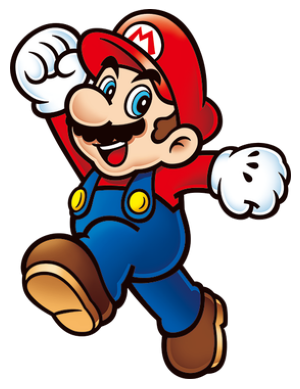

In [71]:
img_data = base64.b64decode(base64_image)
original = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [72]:
def convolve(img, kernel):


    kernel = np.flipud(np.fliplr(kernel))


    img_h, img_w = img.shape
    k_h, k_w = kernel.shape

    pad_h = k_h // 2
    pad_w = k_w // 2


    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    output = np.zeros_like(img)


    for i in range(img_h):
        for j in range(img_w):

            roi = padded_img[i : i + k_h, j : j + k_w]

            output[i, j] = np.sum(roi * kernel)

    return output

In [73]:

kernel = np.ones((3, 3)) / 9


kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

img_array = np.array(original)


if len(img_array.shape) == 3:
    img_array = np.mean(img_array, axis=2)

output_matrix = convolve(img_array,kernel)



print("Shape of output:", output_matrix.shape)
print("Data Type:", output_matrix.dtype)
print("Minimum Value:", output_matrix.min())
print("Maximum Value:", output_matrix.max())


print("\n--- Top Left 5x5 Sample ---")
print(output_matrix[0:5, 0:5])


print("\n--- Value at pixel (10, 20) ---")
print(output_matrix[10, 20])

Shape of output: (362, 275)
Data Type: float64
Minimum Value: 0.0
Maximum Value: 255.0

--- Top Left 5x5 Sample ---
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

--- Value at pixel (10, 20) ---
0.0


In [74]:
import cv2
def average_blur_gray(img, ksize):


    kernel = np.ones((ksize, ksize)) / (ksize * ksize)


    blurred_float = convolve(img, kernel)


    blurred_img = np.clip(blurred_float, 0, 255).astype(np.uint8)

    return blurred_img


def average_blur_rgb(img, ksize):

    b, g, r = cv2.split(img)

    b_blurred = average_blur_gray(b, ksize)
    g_blurred = average_blur_gray(g, ksize)
    r_blurred = average_blur_gray(r, ksize)


    merged = cv2.merge([b_blurred, g_blurred, r_blurred])


    return np.uint8(merged)

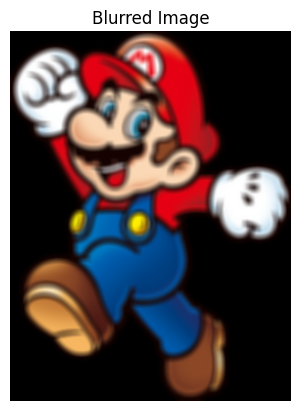

In [75]:
original = cv2.imread('mario.png')
original = original.astype(np.uint8)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)


Blur_img = average_blur_rgb(original,7)

plt.imshow(Blur_img)
plt.axis("off")
plt.title("Blurred Image")
plt.show()



In [76]:
def gaussian_kernel(ksize, sigma):

    kernel = np.zeros((ksize, ksize))
    center = ksize // 2

    for x in range(ksize):
        for y in range(ksize):

            dx = x - center
            dy = y - center


            exponent = -(dx**2 + dy**2) / (2 * sigma**2)
            kernel[x, y] = np.exp(exponent)


    return kernel / np.sum(kernel)

In [77]:
def gaussian_blur_gray(img, ksize, sigma):



    kernel = gaussian_kernel(ksize, sigma)


    blurred_float = convolve(img, kernel)


    blurred_img = np.clip(blurred_float, 0, 255).astype(np.uint8)

    return blurred_img

def gaussian_blur_rgb(img, ksize, sigma):
    b, g, r = cv2.split(img)


    kernel = gaussian_kernel(ksize, sigma)

    b_blur = convolve(b, kernel)
    g_blur = convolve(g, kernel)
    r_blur = convolve(r, kernel)

    return np.uint8(cv2.merge([b_blur, g_blur, r_blur]))

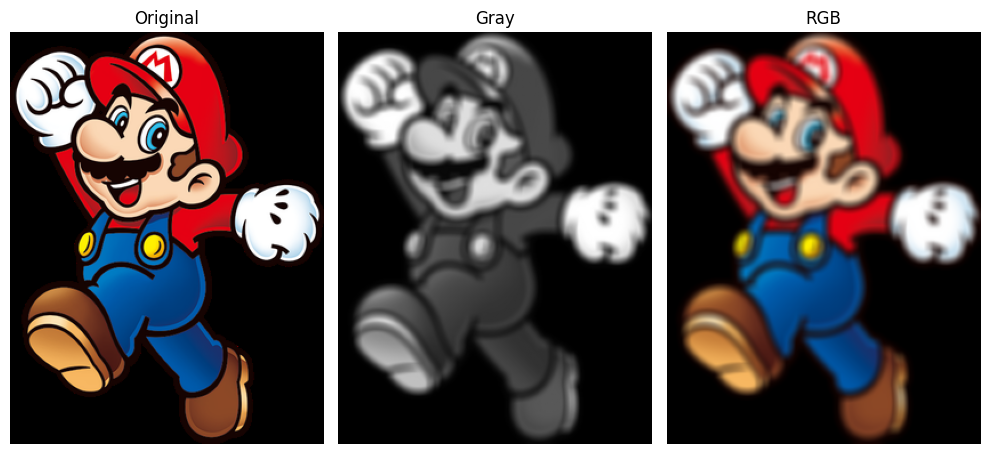

In [78]:
from matplotlib import axes
guassian_gray_img = gaussian_blur_gray(original_gray, 9, 5)

guassian_rgb_img = gaussian_blur_rgb(original, 9, 5)

fig , axes = plt.subplots(1,3, figsize=(10,5))

axes[0].imshow(original)
axes[0].axis("off")
axes[0].set_title("Original")

axes[1].imshow(guassian_gray_img, cmap='gray')
axes[1].axis("off")
axes[1].set_title("Gray")

axes[2].imshow(guassian_rgb_img)
axes[2].axis("off")
axes[2].set_title("RGB")

plt.tight_layout()
plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [79]:

sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])


sobel_y_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

def sobel_edge_detection(img):

    gx = convolve(img, sobel_x_kernel)
    gy = convolve(img, sobel_y_kernel)


    magnitude = np.sqrt(gx**2 + gy**2)


    scale_factor = 255.0 / magnitude.max()
    magnitude_normalized = (magnitude * scale_factor).astype(np.uint8)


    return gx, gy, magnitude_normalized



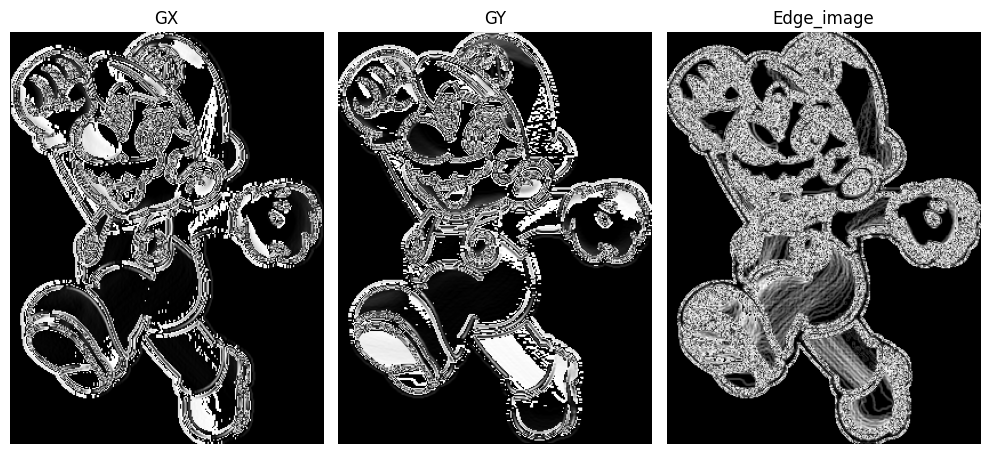

In [80]:

gx, gy, edges = sobel_edge_detection(original_gray)


fig , axes = plt.subplots(1,3, figsize=(10,5))

axes[0].imshow(gx, cmap ='gray')
axes[0].axis("off")
axes[0].set_title("GX")

axes[1].imshow(gy, cmap='gray')
axes[1].axis("off")
axes[1].set_title("GY")

axes[2].imshow(edges, cmap = 'gray')
axes[2].axis("off")
axes[2].set_title("Edge_image")

plt.tight_layout()
plt.show()





### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [81]:

def laplacian_sharpening(img, alpha=1.0):

    lap_kernel = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])


    lap = convolve(img, lap_kernel)


    img_float = img.astype(np.float32)
    sharpened = img_float - (alpha * lap)


    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened, lap

def verify_with_opencv(img):

    img_float = img.astype(np.float32)

    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])


    manual_lap = convolve(img, kernel)
    manual_result = np.clip(img_float - manual_lap, 0, 255).astype(np.uint8)


    cv_lap = cv2.filter2D(img_float, cv2.CV_32F, kernel, borderType=cv2.BORDER_REFLECT)
    cv_result = np.clip(img_float - cv_lap, 0, 255).astype(np.uint8)


    match = np.allclose(manual_result, cv_result, atol=1)

    diff_matrix = np.abs(manual_result.astype(int) - cv_result.astype(int))

    print(f"Match Verified? {match}")
    print(f"Max pixel difference: {diff_matrix.max()}")

    return manual_result, cv_result





--- Verifying Manual vs OpenCV ---
Match Verified? False
Max pixel difference: 255


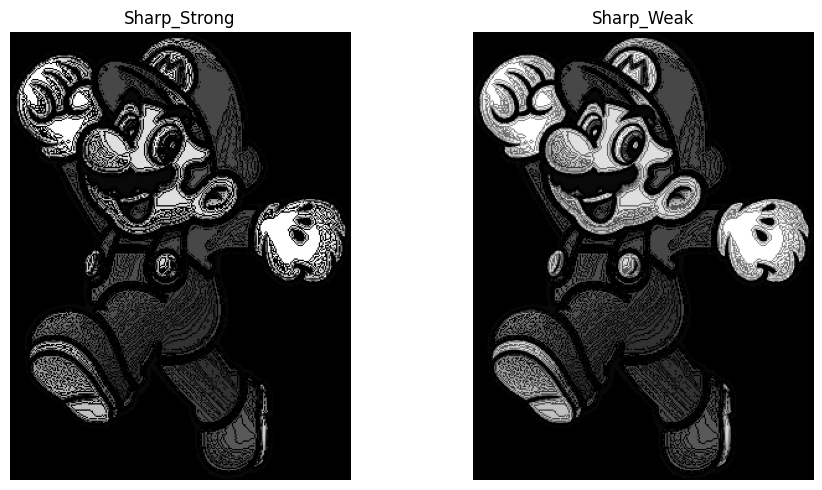

In [82]:

sharp_weak, _ = laplacian_sharpening(original_gray, alpha=0.5)


sharp_strong, lap_map = laplacian_sharpening(original_gray, alpha=1.0)


print("--- Verifying Manual vs OpenCV ---")
manual_res, cv_res = verify_with_opencv(gray)

fig , axes = plt.subplots(1,2, figsize=(10,5))

axes[0].imshow(sharp_strong, cmap ='gray')
axes[0].axis("off")
axes[0].set_title("Sharp_Strong")

axes[1].imshow(sharp_weak, cmap='gray')
axes[1].axis("off")
axes[1].set_title("Sharp_Weak")

plt.tight_layout()
plt.show()

In [83]:
def unsharp_masking(img, ksize=5, sigma=1.0, alpha=1.5):

    img_float = img.astype(np.float32)


    blurred = gaussian_blur_gray(img, ksize, sigma).astype(np.float32)


    mask = img_float - blurred


    sharpened = img_float + (alpha * mask)


    return np.clip(sharpened, 0, 255).astype(np.uint8), mask



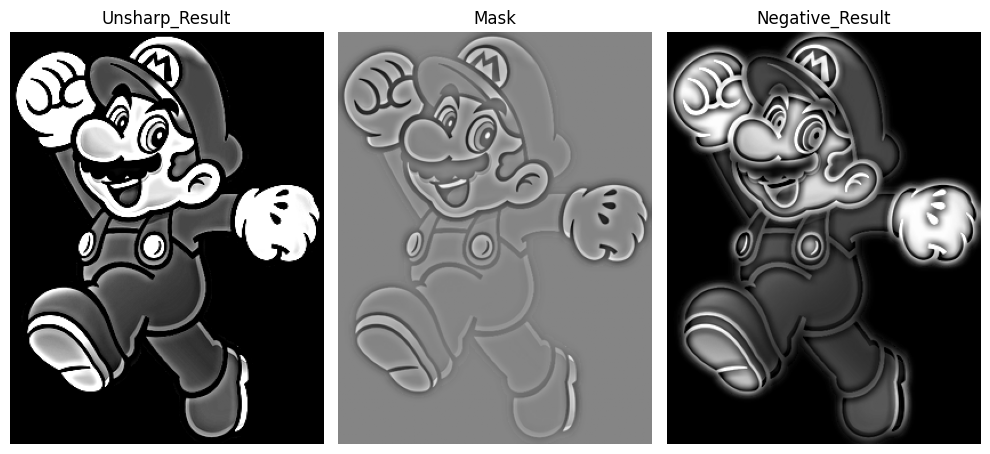

In [84]:

unsharp_result, mask_1 = unsharp_masking(original_gray, ksize=15, sigma=5, alpha=2.0)


negative_alpha_result, mask_2 = unsharp_masking(original_gray, ksize=15, sigma=5, alpha=-2.0)




fig , axes = plt.subplots(1,3, figsize=(10,5))

axes[0].imshow(unsharp_result, cmap ='gray')
axes[0].axis("off")
axes[0].set_title("Unsharp_Result")

axes[1].imshow(mask_1, cmap='gray')
axes[1].axis("off")
axes[1].set_title("Mask")

axes[2].imshow(negative_alpha_result, cmap='gray')
axes[2].axis("off")
axes[2].set_title("Negative_Result")

plt.tight_layout()
plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [85]:
def get_magnitude_spectrum(img):

    f = np.fft.fft2(img)

    fshift = np.fft.fftshift(f)


    magnitude = np.abs(fshift)


    spectrum = 20 * np.log(magnitude + 1)

    return spectrum

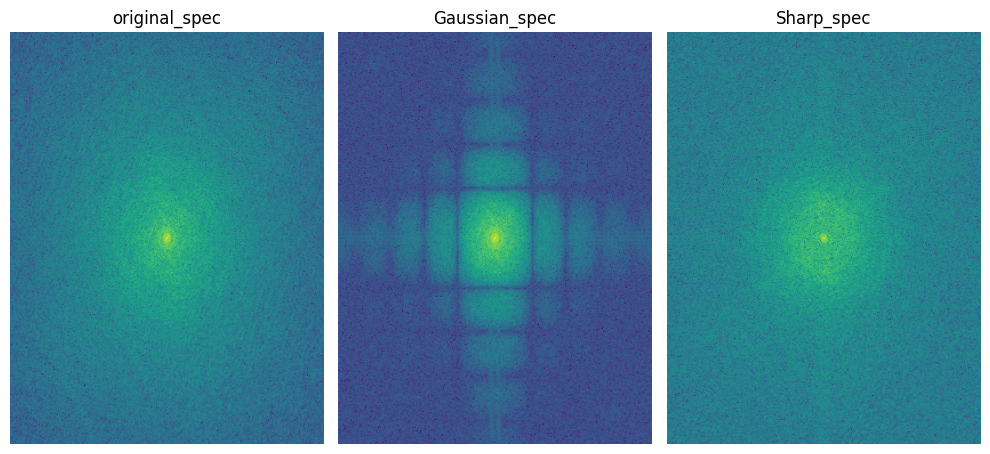

In [86]:
unsharp_result, mask_1 = unsharp_masking(original_gray, ksize=15, sigma=5, alpha=-10.0)
guassian_gray_img = gaussian_blur_gray(original_gray, 9, 5)

original_spec = get_magnitude_spectrum(original_gray)
gaussian_spec = get_magnitude_spectrum(guassian_gray_img)
sharp_spec = get_magnitude_spectrum(unsharp_result)

fig , axes = plt.subplots(1,3, figsize=(10,5))

axes[0].imshow(original_spec)
axes[0].axis("off")
axes[0].set_title("original_spec")

axes[1].imshow(gaussian_spec)
axes[1].axis("off")
axes[1].set_title("Gaussian_spec")

axes[2].imshow(sharp_spec)
axes[2].axis("off")
axes[2].set_title("Sharp_spec")

plt.tight_layout()
plt.show()

The Center (Bright Spot): Represents Low Frequencies. These are smooth areas, gradual color changes, and the general structure of the image

The Outer Region (Periphery): Represents High Frequencies. These are sharp edges, fine details, texture, and noise.

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

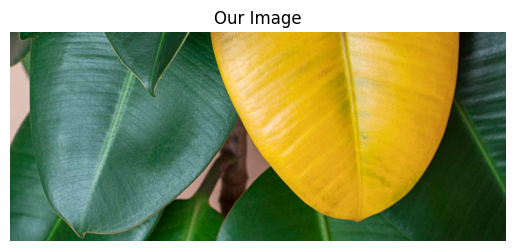

In [87]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

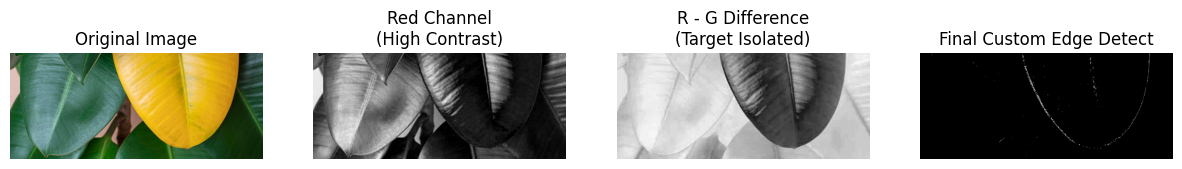

In [88]:



b, g, r = cv2.split(img_part5)


diff_map = r.astype(np.float32) - g.astype(np.float32)


custom_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])


edges = convolve(diff_map, custom_kernel)

edges_abs = np.abs(edges)
edges_norm = np.clip(edges_abs, 0, 255).astype(np.uint8)


_, binary_edges = cv2.threshold(edges_norm, 50, 255, cv2.THRESH_BINARY)

original_rgb = cv2.cvtColor(img_part5, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_part5)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(r, cmap='gray')
plt.title("Red Channel\n(High Contrast)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(diff_map, cmap='gray')
plt.title("R - G Difference\n(Target Isolated)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(binary_edges, cmap='gray')
plt.title("Final Custom Edge Detect")
plt.axis('off')

plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
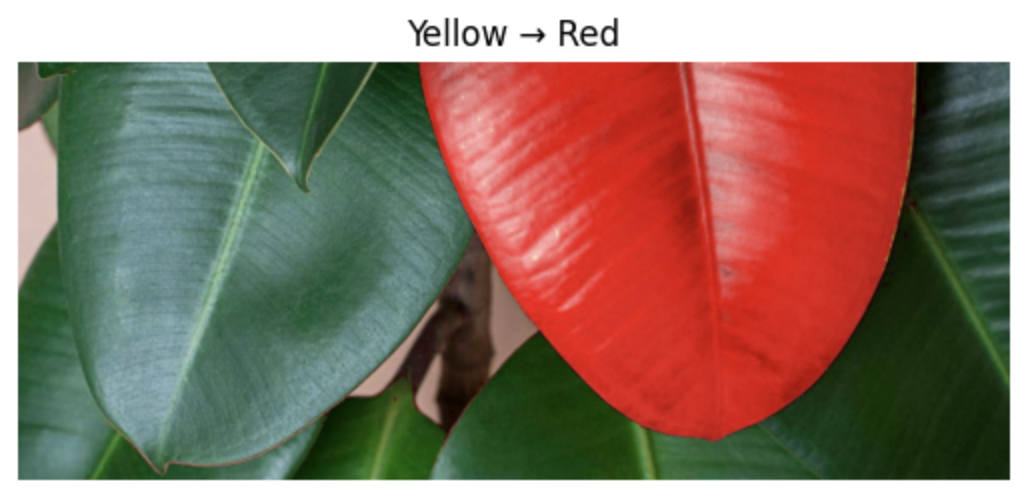

Also, we can change to a less brighter colour
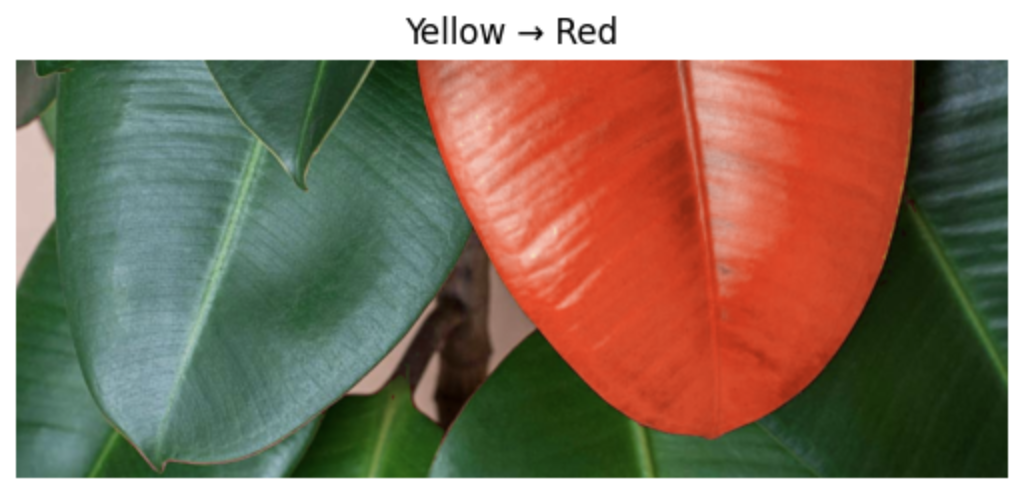

In [89]:
def rgb_to_hsv(rgb_img):


    img = rgb_img.astype('float32') / 255.0


    cmax = np.max(img, axis=2)
    cmin = np.min(img, axis=2)
    delta = cmax - cmin


    h = np.zeros_like(cmax)
    s = np.zeros_like(cmax)
    v = cmax


    s = np.where(cmax == 0, 0, delta / cmax)


    mask_delta = delta > 0


    r_mask = (img[..., 0] == cmax) & mask_delta
    h[r_mask] = (img[..., 1][r_mask] - img[..., 2][r_mask]) / delta[r_mask]


    g_mask = (img[..., 1] == cmax) & mask_delta
    h[g_mask] = 2.0 + (img[..., 2][g_mask] - img[..., 0][g_mask]) / delta[g_mask]


    b_mask = (img[..., 2] == cmax) & mask_delta
    h[b_mask] = 4.0 + (img[..., 0][b_mask] - img[..., 1][b_mask]) / delta[b_mask]


    h = h * 60.0
    h[h < 0] += 360.0


    h_cv = (h / 2).astype(np.uint8)
    s_cv = (s * 255).astype(np.uint8)
    v_cv = (v * 255).astype(np.uint8)

    return cv2.merge([h_cv, s_cv, v_cv])

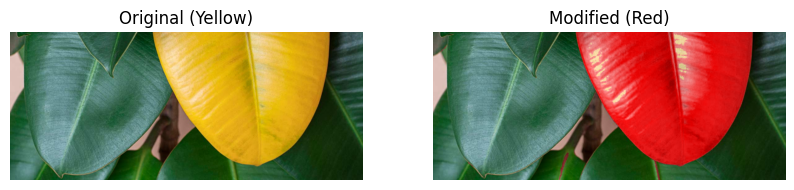

In [90]:



    hsv_img = rgb_to_hsv(img_part5)


    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([45, 255, 255])

    mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

    hsv_modified = hsv_img.copy()


    hsv_modified[mask > 0, 0] = 0


    final_result_bgr = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)
    final_result_rgb = cv2.cvtColor(final_result_bgr, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_part5)
    plt.title("Original (Yellow)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(final_result_rgb)
    plt.title("Modified (Red)")
    plt.axis('off')

    plt.show()
